In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import re
import gc
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.metrics import r2_score



colors = plt.cm.inferno(np.linspace(0, 1, 12))

cmap = plt.get_cmap('inferno')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=cmap(np.linspace(0, 1, 12)))
markers = ['o', 's', 'D', '^', 'v', 'P', 'X', '*', '+', 'H', 'h']

plt.rcParams['text.usetex'] = True
#plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20) ##tamanho do label
plt.rc('lines', markersize=6)
plt.rc('lines', linewidth=2)
plt.rc('legend', loc='best')
plt.rc('legend', fontsize=8)
plt.rc('xtick', labelsize=13) ##tamanho dos numeros nos eixos
plt.rc('ytick', labelsize=13)
plt.rc('font', family='serif')


In [36]:
wdir = '/home/robert/Datas/Collagen_fibril_ext_completo/'
#wdir = r'C:\Users\55859\Datas\Collagen_fibril_zurik_ext'
DFCS = {}

for fn in tqdm(os.listdir(wdir)):
    if not fn.endswith('.dat'):
        continue    
    
    file_path = os.path.join(wdir, fn)
    #print(file_path)

    # Define a regular expression pattern to match "ts_" followed by one or more digits
    pattern = r'ts_(\d+)'

    # Use re.findall() to find all matches in the file path
    numbers_after_ts = [match for match in re.findall(pattern, file_path)]

    ts = int(numbers_after_ts[0])

    df = pd.read_csv(file_path, sep = ' ')
    # Filtrar o DataFrame baseado nas condições especificadas
    df_core = df[(df['y'] >= -100) & (df['y'] <= 100)].copy()
    df_core['file_path'] = fn
    if ts in DFCS.keys():
        DFCS[ts].append(df_core)
    else:
        DFCS[ts] = [df_core]

    del df  # Descarte o DataFrame original
    gc.collect()  # Forçar a coleta de lixo



100%|██████████| 499/499 [01:43<00:00,  4.83it/s]


In [3]:
cs_s = np.linspace(-90,90,11)

In [13]:
cs_s

array([-90., -72., -54., -36., -18.,   0.,  18.,  36.,  54.,  72.,  90.])

In [4]:
def calculate_mr(xv, zv):
    
    Rs = []
    Ns = []
    coords = np.column_stack((xv, zv))
    cm = np.mean(coords, axis=0)

    # Calcular a distância máxima do centro de massa ao ponto mais distante
    max_distance = np.max(np.sqrt(np.sum((coords - cm)**2, axis=1)))

    # Definir as escalas usando a distância máxima
    raies = np.linspace(0, max_distance, num=40)
    #print(max_distance)

    for r in raies:
  
        # Filtrar pontos cuja distância ao centro de massa é menor ou igual a scale
        distances_to_cm = np.sqrt(np.sum((coords - cm)**2, axis=1))
        points_within_scale = coords[distances_to_cm <= r]

        if len(points_within_scale) > 0:

            Rs.append(r)
            Ns.append(len(points_within_scale))
    
    Rs = np.array(Rs)
    Ns = np.array(Ns)
    
    Rs0 = Rs[Ns!=0]
    Ns0 = Ns[Ns!=0]
    #print(Rs0)
    # Realizar o ajuste log-log
    log_Rs = np.log(Rs0)
    log_Ns = np.log(Ns0)
    
    return log_Rs, log_Ns

def power_law(x, a, b):
    return a * x + b
                                                                  
                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [7]:
Df_for_cross_med = {}
for i in sorted(Df_for_section.keys()):
    l = np.array(Df_for_section[i])
    lm = np.mean(l)
    st = np.std(l)
 
    Df_for_cross_med[i] = [lm,st]


In [8]:
Df_for_cross_med

{np.float64(-90.0): [np.float64(1.810482239787583),
  np.float64(0.1961375077114459)],
 np.float64(-72.0): [np.float64(1.7837195081169153),
  np.float64(0.19147721116801525)],
 np.float64(-54.0): [np.float64(1.7536395039790773),
  np.float64(0.14114595386568835)],
 np.float64(-36.0): [np.float64(1.6983733502776008),
  np.float64(0.16540384247805523)],
 np.float64(-18.0): [np.float64(1.6683087142370565),
  np.float64(0.15375765535279054)],
 np.float64(0.0): [np.float64(1.6500242018509126),
  np.float64(0.13238176864252)],
 np.float64(18.0): [np.float64(1.6804337026724354),
  np.float64(0.17281139578640256)],
 np.float64(36.0): [np.float64(1.7026344895792236),
  np.float64(0.1811826722703928)],
 np.float64(54.0): [np.float64(1.742585226370255),
  np.float64(0.1809358443845579)],
 np.float64(72.0): [np.float64(1.7989199642055433),
  np.float64(0.22769942904737797)],
 np.float64(90.0): [np.float64(1.764745776336319),
  np.float64(0.22644843643325238)]}

In [9]:
mean_of_first_values = np.mean([value[0] for value in Df_for_cross_med.values()])


In [10]:
mean_of_first_values

np.float64(1.732169697946629)

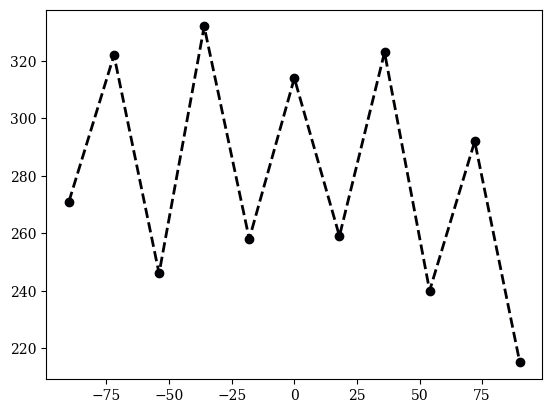

In [222]:
df = DFCS[8192][0]
m = []
for k in cs_s:
    xv = df['x'][df['y']==k].tolist()
    m.append(len(xv))
    
    
plt.plot(cs_s, m, 'o--')

plt.show()

Iniciando processamento (Base 10 + Filtro Físico)...
Processando tempo: 2
Processando tempo: 8
Processando tempo: 16
Processando tempo: 64
Processando tempo: 128
Processando tempo: 512
Processando tempo: 1024
Processando tempo: 4096
Processando tempo: 8192

=== ESTATÍSTICAS FINAIS ===
       Media_Df  Desvio_Padrao  N_Amostras  Erro_Padrao
Tempo                                                  
2      1.696970       0.174071         550     0.007422
8      1.659788       0.167420         550     0.007139
16     1.691210       0.161712         539     0.006965
64     1.883569       0.103646         550     0.004419
128    1.906580       0.092390         550     0.003940
512    1.925460       0.076176         550     0.003248
1024   1.930718       0.074130         550     0.003161
4096   1.932427       0.076723         550     0.003271
8192   1.927687       0.080029         539     0.003447

Arquivo salvo com sucesso: resultados_fractal_logts.dat
Colunas: [Log10(Ts)]  [Media_Df]  [Erro_P

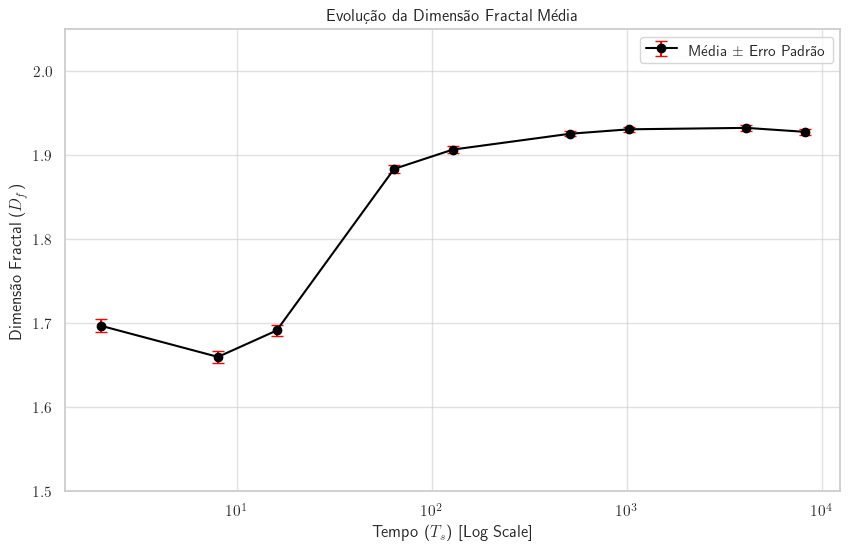

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# --- CONTROLE DE VISUALIZAÇÃO ---
MOSTRAR_GRAFICOS_INDIVIDUAIS = False  
QTD_PLOTS_POR_TEMPO = 2              

dados_brutos = []



print("Iniciando processamento (Base 10 + Filtro Físico)...")

for ts in sorted(DFCS.keys()):
    dn = './df_ts_'+str(ts)+'.dat'
    print(f"Processando tempo: {ts}")
    
    contador_plots = 0 
    
    sections = []
    for j_idx in range(0, len(DFCS[ts])): 
        df = DFCS[ts][j_idx]
        
        for k in cs_s:
            section= []
            xv = df['x'][df['y']==k].tolist()
            zv = df['z'][df['y']==k].tolist()
            if ts == 8192:
                for i in range(len(xv)):
                    section.append((xv[i], zv[i]))

            # --- 1. Obtém dados ---
            Rs_ln, Ns_ln = calculate_mr(xv, zv) 
            
            # --- 2. CONVERSÃO PARA BASE 10 ---
            Rs = Rs_ln / np.log(10)
            Ns = Ns_ln / np.log(10)
            
            LR = LinearRegression()
            
            # --- 3. OTIMIZAÇÃO ---
            cut_idx = 0       
            best_r2_valid = -9999  
            found_valid_fit = False
            
            for i in range(0, 15): 
                if len(Rs) - 1 - i < 3: break 
                
                if i == 0: 
                    X_test = Rs[1:].reshape(-1, 1); Y_test = Ns[1:]
                else:      
                    X_test = Rs[1:-i].reshape(-1, 1); Y_test = Ns[1:-i]

                LR.fit(X_test, Y_test)
                slope = LR.coef_[0] 
                pred_test = LR.predict(X_test)
                r2 = r2_score(Y_test, pred_test)

                # --- 4. TRAVA FÍSICA ---
                if 0.0 <= slope <= 2.01:
                    if r2 > best_r2_valid:
                        best_r2_valid = r2
                        cut_idx = i
                        found_valid_fit = True

            # --- 5. FIT FINAL ---
            if found_valid_fit:
                if cut_idx == 0: 
                    X_final = Rs[1:].reshape(-1, 1); Y_final = Ns[1:]
                else:            
                    X_final = Rs[1:-cut_idx].reshape(-1, 1); Y_final = Ns[1:-cut_idx]
                
                LR.fit(X_final, Y_final)
                Dimensao_Fractal = LR.coef_[0]
                
                if Dimensao_Fractal > 2.0: Dimensao_Fractal = 2.0
                if Dimensao_Fractal < 0.0: Dimensao_Fractal = 0.0 

            else:
                Dimensao_Fractal = 2.0 
                X_final = Rs[1:].reshape(-1, 1); Y_final = Ns[1:]
                LR.fit(X_final, Y_final)

            # --- 6. PLOT INDIVIDUAL ---
            if MOSTRAR_GRAFICOS_INDIVIDUAIS and contador_plots < QTD_PLOTS_POR_TEMPO:
                plt.figure(figsize=(6, 4))
                plt.plot(Rs, Ns, 'o', color='lightgray', label='Ignorados')
                plt.plot(X_final, Y_final, 'bo', label='Dados do Fit')
                plt.plot(X_final, LR.predict(X_final), 'r-', label=f'D={Dimensao_Fractal:.3f}')
                plt.title(f'Fit Base 10 | TS={ts} | Y={k}')
                plt.xlabel('log10(R)'); plt.ylabel('log10(N)')
                plt.legend()
                plt.show()
                contador_plots += 1

            # Armazena
            dados_brutos.append({
                'Tempo': ts,
                'Df': Dimensao_Fractal
            })

            if ts == 8192:
                #Save each element in sections how a line in a file .csv
                path_sections = f'cross_section_ts_{ts}.csv'
                with open(path_sections, 'a') as f:
                    f.write(f"{section}")
    
                    f.write("\n") 

    if ts == 8192:
        break    



# --- FIM DO LOOP ---

# ==========================================
# ESTATÍSTICA E SALVAMENTO CORRIGIDO
# ==========================================

df_raw = pd.DataFrame(dados_brutos)

# Calcula estatísticas (Index é o Tempo em valor original: 2, 8, 16...)
stats = df_raw.groupby('Tempo')['Df'].agg(['mean', 'std', 'count', 'sem'])
stats.columns = ['Media_Df', 'Desvio_Padrao', 'N_Amostras', 'Erro_Padrao']

print("\n=== ESTATÍSTICAS FINAIS ===")
print(stats)

# --- PREPARAÇÃO PARA SALVAR (CONVERTER TS PARA LOG10) ---
df_export = stats[['Media_Df', 'Erro_Padrao']].copy()
df_export.reset_index(inplace=True) # Transforma o Index 'Tempo' em coluna normal

# Aplica Log10 na coluna Tempo
df_export['Tempo'] = np.log10(df_export['Tempo'])

# --- SALVAR ARQUIVO .DAT ---
nome_arquivo = 'resultados_fractal_logts.dat'

# Salva: [Log10(Tempo)] [Media] [Erro]
df_export.to_csv(nome_arquivo, sep='\t', header=False, index=False)

print(f"\nArquivo salvo com sucesso: {nome_arquivo}")
print("Colunas: [Log10(Ts)]  [Media_Df]  [Erro_Padrao]")
print("Exemplo da primeira linha salva:", df_export.iloc[0].values)


# --- PLOTAGEM (Mantemos o plot visualmente igual ao anterior) ---
plt.figure(figsize=(10, 6))
plt.errorbar(
    x=stats.index,  # Usamos o index original para o plot (Matplotlib faz a escala log)
    y=stats['Media_Df'], 
    yerr=stats['Erro_Padrao'], 
    fmt='-o', color='black', ecolor='red', elinewidth=1.5, capsize=4,
    label='Média ± Erro Padrão'
)
plt.title('Evolução da Dimensão Fractal Média')
plt.xlabel('Tempo ($T_s$) [Log Scale]')
plt.ylabel('Dimensão Fractal ($D_f$)')
plt.xscale('log') 
plt.ylim(1.5, 2.05) 
plt.grid(True, which="major", ls="-", alpha=0.6)
plt.legend()
plt.show()

/tmp/ipykernel_81868/2276681695.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


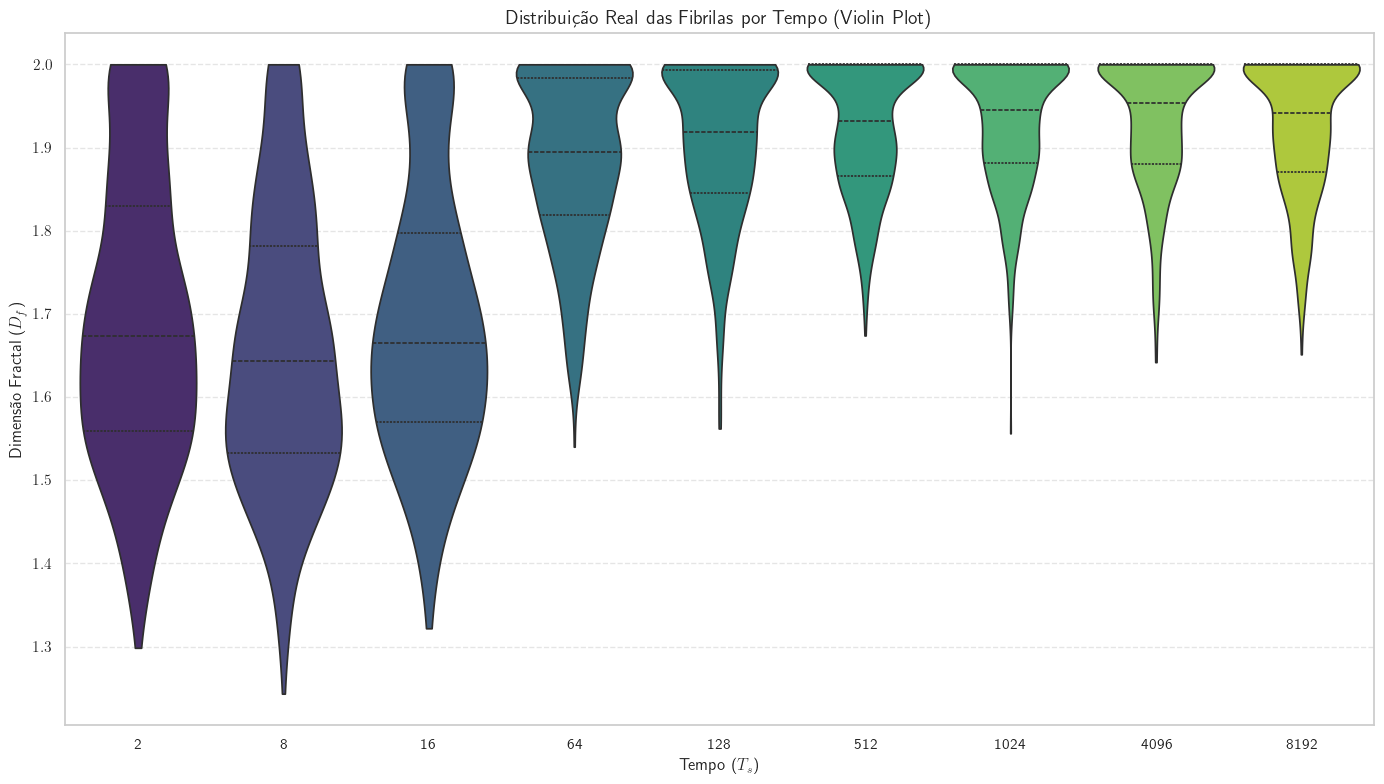


--- Análise de Variabilidade Relativa (CV) ---
           mean       std     CV (%)
Tempo                               
2      1.693114  0.173202  10.229811
8      1.658070  0.167133  10.079992
16     1.688464  0.161423   9.560335
64     1.881465  0.102887   5.468430
128    1.904256  0.091411   4.800356
512    1.922239  0.075491   3.927231
1024   1.927666  0.073886   3.832949
4096   1.930741  0.076777   3.976535
8192   1.923603  0.079249   4.119827


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Certifique-se de ter o 'df_raw' na memória (do código anterior)
# Se não tiver, rode o bloco de coleta de dados novamente.

plt.figure(figsize=(14, 8))

# --- GRÁFICO DE VIOLINO ---
# x='Tempo': Seus tempos (ts)
# y='Df': Seus valores de dimensão fractal
# cut=0: Corta o violino no limite dos dados (não extrapola)
# inner='quartile': Desenha as linhas dos quartis (25%, 50%, 75%) dentro do violino
sns.violinplot(
    data=df_raw, 
    x='Tempo', 
    y='Df', 
    palette="viridis", 
    inner="quartile",
    cut=0 
)

plt.title('Distribuição Real das Fibrilas por Tempo (Violin Plot)', fontsize=14)
plt.xlabel('Tempo ($T_s$)', fontsize=12)
plt.ylabel('Dimensão Fractal ($D_f$)', fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Dica: Como o eixo X é categórico no Seaborn, ele vai mostrar 2, 8, 16... espaçados igualmente.
# Isso é BOM para ver a distribuição de cada um individualmente.

plt.tight_layout()
plt.show()

# --- CÁLCULO DO COEFICIENTE DE VARIAÇÃO (CV) ---
stats_cv = df_raw.groupby('Tempo')['Df'].agg(['mean', 'std'])
stats_cv['CV (%)'] = (stats_cv['std'] / stats_cv['mean']) * 100

print("\n--- Análise de Variabilidade Relativa (CV) ---")
print(stats_cv)

Iniciando processamento (SEM TRAVAS, INICIANDO DE R > 1)...
Processando tempo: 2


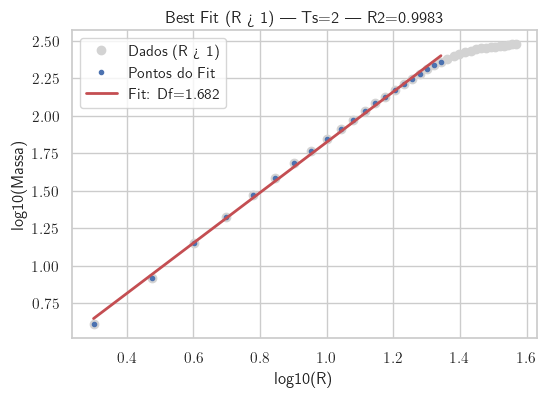

Processando tempo: 8


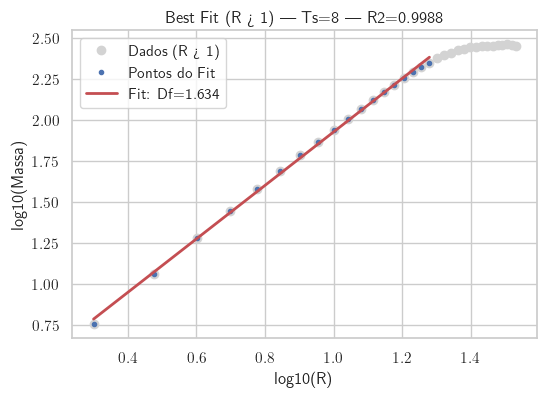

Processando tempo: 16


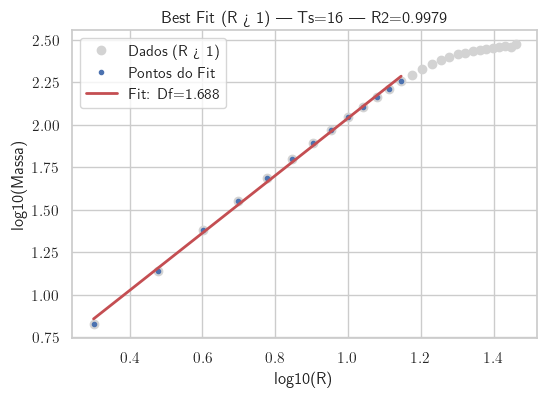

Processando tempo: 32


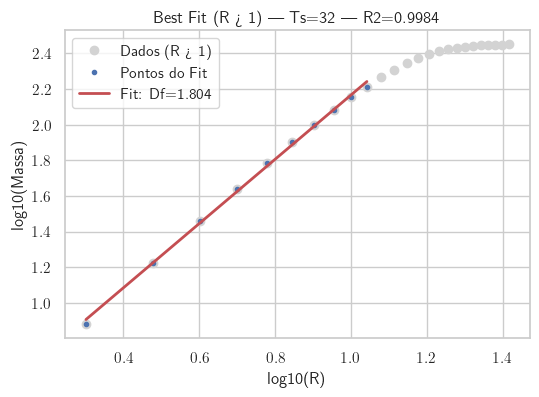

Processando tempo: 64


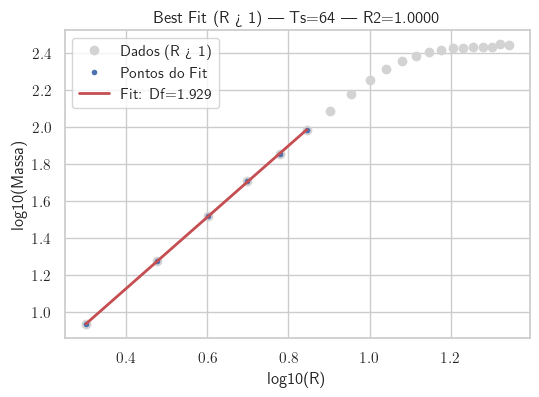

Processando tempo: 128


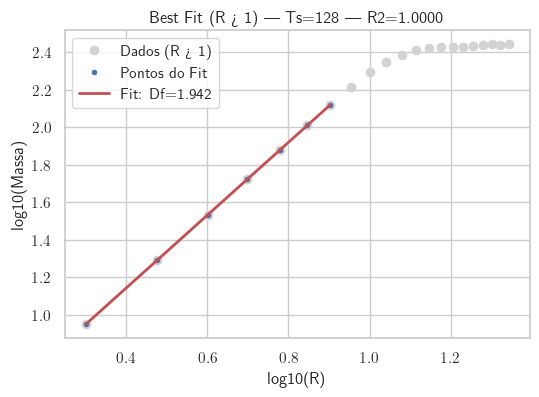

Processando tempo: 512


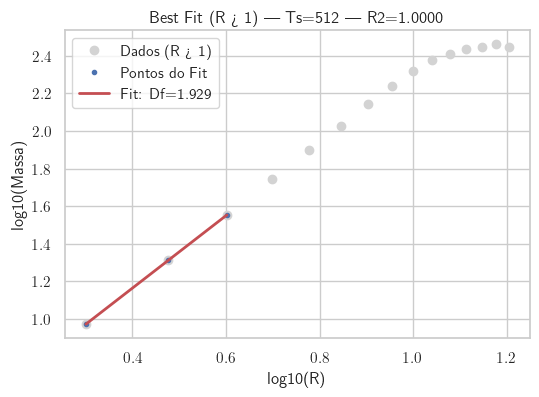

Processando tempo: 1024


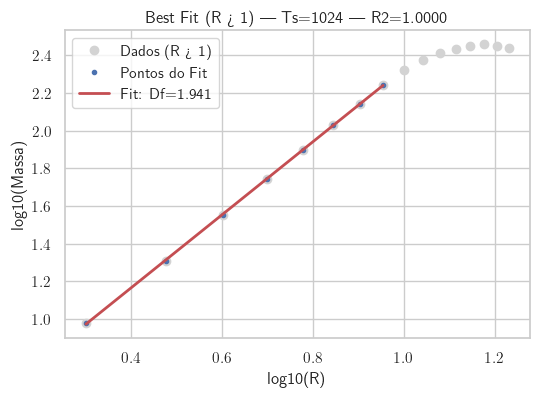

Processando tempo: 4096


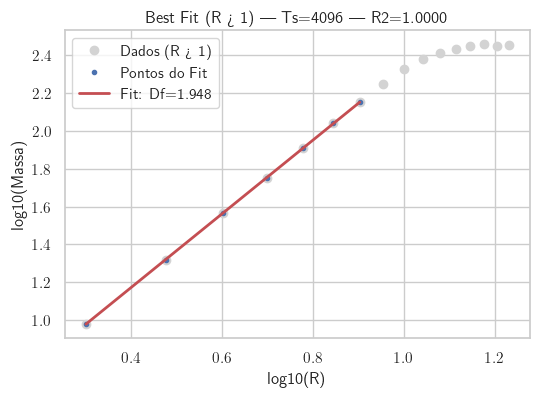

Processando tempo: 8192


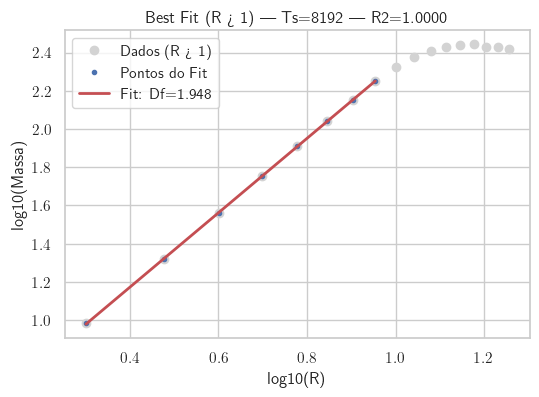


=== RESULTADOS SEM TRAVAS (R > 1) ===
   Tempo  Media_Df  Erro_Padrao
0      2  1.682221     0.016092
1      8  1.634463     0.014452
2     16  1.687750     0.023097
3     32  1.804235     0.025429
4     64  1.929199     0.006511
5    128  1.942157     0.003494
6    512  1.929229     0.005910
7   1024  1.940663     0.005105
8   4096  1.947958     0.002780
9   8192  1.948039     0.004666


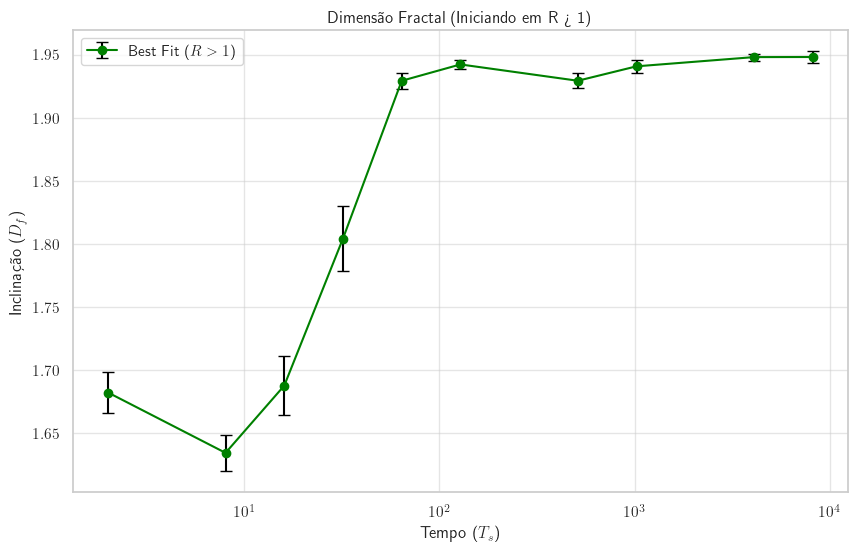

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from collections import defaultdict
import scipy.stats as stats

# --- CONTROLE DE VISUALIZAÇÃO ---
MOSTRAR_CURVA_MESTRA = True  
dados_finais = []

print("Iniciando processamento (SEM TRAVAS, INCLUINDO PONTO 0)...")

for ts in sorted(DFCS.keys()):
    print(f"Processando tempo: {ts}")
    
    # --- ACUMULAÇÃO DE DADOS (ENSEMBLE) ---
    agregador_massas = defaultdict(list)
    total_slices = 0

    for j_idx in range(0, len(DFCS[ts])): 
        df = DFCS[ts][j_idx]
        
        for k in cs_s:
            xv = df['x'][df['y']==k].tolist()
            zv = df['z'][df['y']==k].tolist()
            
            if len(xv) == 0: continue

            # Calcula MR (espera-se retorno em Log Natural)
            Rs_ln, Ns_ln = calculate_mr(xv, zv)
            
            # Converte para Linear para fazer a média correta
            rs_linear = np.exp(Rs_ln)
            ns_linear = np.exp(Ns_ln)
            
            for r, n in zip(rs_linear, ns_linear):
                r_int = int(round(r))
                if r_int > 0: 
                    agregador_massas[r_int].append(n)
            
            total_slices += 1

    if total_slices == 0: continue

    # --- CÁLCULO DA MÉDIA ---
    lista_r_medio = []
    lista_n_medio = []
    
    for r_key in sorted(agregador_massas.keys()):
        massas = agregador_massas[r_key]
        # Mantive um filtro mínimo de 5% de presença para evitar ruído extremo na cauda
        if len(massas) > (total_slices * 0.05): 
            lista_r_medio.append(r_key)
            lista_n_medio.append(np.mean(massas))
            
    # Converte para LOG10 para o Fit
    Rs_final_arr = np.log10(lista_r_medio).reshape(-1, 1)
    Ns_final_arr = np.log10(lista_n_medio) # Array 1D para o y
    
    # --- OTIMIZAÇÃO (BEST FIT PURO) ---
    LR = LinearRegression()
    
    best_r2 = -9999 
    best_slope = 0
    best_std_err = 0
    best_X = []
    best_Y = []
    best_intercept = 0
    
    # Loop para encontrar onde cortar a CAUDA (raios grandes) para maximizar R2
    # Não cortamos o começo (start=0)
    
    # Tentamos cortar até os últimos 15 pontos, mantendo no mínimo 3 pontos
    max_cuts = min(15, len(Rs_final_arr) - 3)
    
    found_any = False
    
    for i in range(0, max_cuts + 1): 
        
        if i == 0:
            # Pega TODOS os pontos (incluindo o índice 0)
            X_test = Rs_final_arr
            Y_test = Ns_final_arr
        else:
            # Corta os últimos 'i' pontos
            X_test = Rs_final_arr[:-i]
            Y_test = Ns_final_arr[:-i]

        # Fit simples
        LR.fit(X_test, Y_test)
        pred_test = LR.predict(X_test)
        r2 = r2_score(Y_test, pred_test)

        # Critério: Apenas o melhor R2 importa. Sem limites para Slope.
        if r2 > best_r2:
            best_r2 = r2
            
            # Recalcula estatísticas completas com scipy para pegar o erro
            slope, intercept, r_value, p_value, std_err = stats.linregress(X_test.flatten(), Y_test)
            
            best_slope = slope
            best_std_err = std_err
            best_intercept = intercept
            best_X = X_test
            best_Y = Y_test
            found_any = True

    # --- ARMAZENAMENTO ---
    if found_any:
        Df_final = best_slope
        Erro_final = best_std_err
        
        # Guardar para plot
        X_plot = best_X
        Y_plot = best_Y
        Y_pred = best_intercept + best_slope * best_X.flatten()
    else:
        Df_final = 0
        Erro_final = 0
        X_plot = Rs_final_arr
        Y_plot = Ns_final_arr
        Y_pred = Ns_final_arr

    # --- VISUALIZAÇÃO ---
    if MOSTRAR_CURVA_MESTRA:
        plt.figure(figsize=(6, 4))
        # Pontos Originais (Média Ensemble)
        plt.plot(Rs_final_arr, Ns_final_arr, 'o', color='lightgray', label='Dados (Ensemble)')
        # Pontos usados no Fit (Melhor R2)
        plt.plot(X_plot, Y_plot, 'b.', label='Pontos do Fit')
        # Reta
        plt.plot(X_plot, Y_pred, 'r-', linewidth=2, label=f'Fit: Df={Df_final:.3f}')
        
        plt.title(f'Best Fit Puro | Ts={ts} | R2={best_r2:.4f}')
        plt.xlabel('log10(R)'); plt.ylabel('log10(Massa)')
        plt.legend()
        plt.show()

    dados_finais.append({
        'Tempo': ts,
        'Media_Df': Df_final,
        'Erro_Padrao': Erro_final
    })
    
    if ts == 8192: break

# --- EXPORTAÇÃO ---
df_results = pd.DataFrame(dados_finais)
print("\n=== RESULTADOS SEM TRAVAS ===")
print(df_results)

# Salvar
df_export = df_results[['Tempo', 'Media_Df', 'Erro_Padrao']].copy()
df_export['Tempo_Log'] = np.log10(df_export['Tempo'])
nome_arquivo = 'resultados_fractal_puro.dat'
df_export[['Tempo_Log', 'Media_Df', 'Erro_Padrao']].to_csv(nome_arquivo, sep='\t', header=False, index=False)

# Plot Final
plt.figure(figsize=(10, 6))
plt.errorbar(
    x=df_results['Tempo'], y=df_results['Media_Df'], yerr=df_results['Erro_Padrao'], 
    fmt='-o', color='green', ecolor='black', capsize=4, label='Best Fit ($R^2$ Maximo)'
)
plt.xscale('log')
plt.title('Dimensão Fractal (Sem travas físicas)')
plt.xlabel('Tempo ($T_s$)')
plt.ylabel('Inclinação ($D_f$)')
plt.grid(True, alpha=0.5)
plt.legend()
plt.show()

Iniciando Análise de Colapso de Escala (Finite Size Scaling)...

Gerando gráficos para Tempo TS = 512


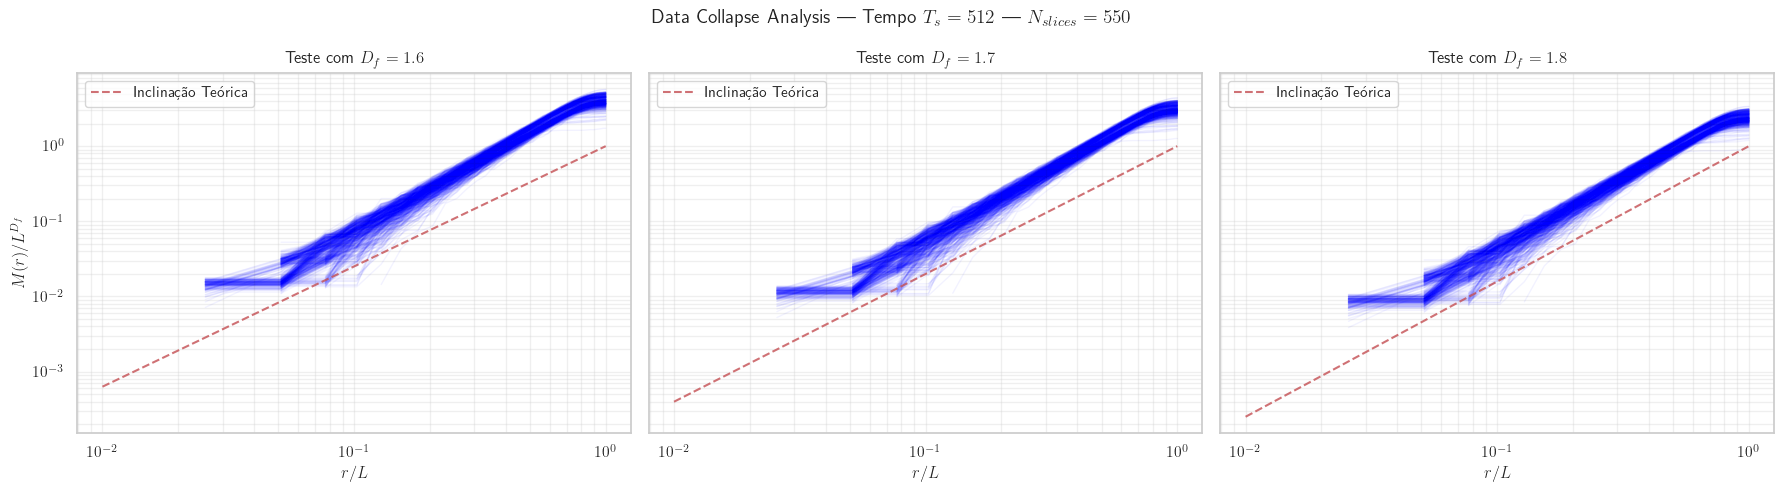


Gerando gráficos para Tempo TS = 8192


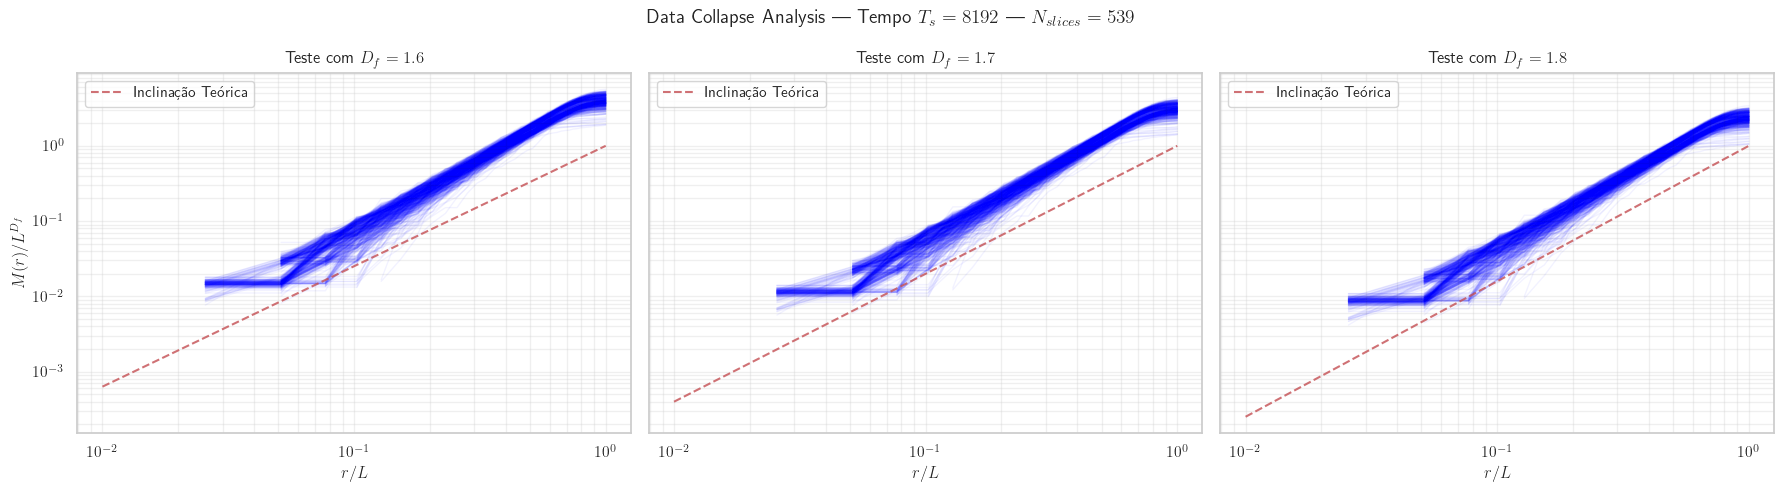

Concluído. O melhor gráfico é aquele onde as curvas azuis formam um fio único e estreito.


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- CONFIGURAÇÕES ---
# Coloque aqui valores de Df para testar. 
# O ideal é testar valores próximos do que você achou no método anterior.
# Ex: Se achou 1.7, teste [1.6, 1.7, 1.8] para ver qual colapsa melhor.
D_TESTES = [1.6, 1.7, 1.8] 

# Filtro: Ignorar slices muito pequenos que só causam sujeira no gráfico (ruído de pixel)
RAIO_MINIMO_SLICE = 10 

print("Iniciando Análise de Colapso de Escala (Finite Size Scaling)...")

for ts in sorted(DFCS.keys()):
    if ts not in [512, 8192]: # Vamos focar nos tempos maiores para ver melhor, ou remova esse if
         continue
         
    print(f"\nGerando gráficos para Tempo TS = {ts}")
    
    # Armazena os dados pré-processados para não recalcular a cada D_TESTE
    slices_data = [] # Lista de dicionários: {'r': array, 'm': array, 'L': float}
    
    # 1. COLETA DE DADOS
    for j_idx in range(0, len(DFCS[ts])): 
        df = DFCS[ts][j_idx]
        
        for k in cs_s:
            xv = df['x'][df['y']==k].tolist()
            zv = df['z'][df['y']==k].tolist()
            
            if len(xv) == 0: continue

            # Calcula MR (Massa vs Raio)
            # ATENÇÃO: calculate_mr no seu código original retorna LOG. 
            # Para o colapso, precisamos dos valores REAIS (LINEARES).
            Rs_ln, Ns_ln = calculate_mr(xv, zv)
            
            # Converter de volta para linear (assumindo que sua função retorna log neperiano)
            # Se sua função retorna log10, use 10**...
            r_vec = np.exp(Rs_ln)
            m_vec = np.exp(Ns_ln)
            
            # Define o Tamanho Característico do Sistema (L)
            # Pode ser o último raio válido ou o raio de giração. 
            # O mais simples é o raio máximo atingido por esse slice.
            if len(r_vec) == 0: continue
            L = np.max(r_vec) 
            
            # Só aceita slices que tenham um tamanho mínimo decente
            if L > RAIO_MINIMO_SLICE:
                slices_data.append({
                    'r': r_vec,
                    'm': m_vec,
                    'L': L
                })

    if not slices_data:
        print(f"Sem dados suficientes para Ts={ts}")
        continue

    # 2. GERAÇÃO DOS GRÁFICOS DE COLAPSO
    # Criamos uma figura com subplots para comparar os diferentes Df
    fig, axes = plt.subplots(1, len(D_TESTES), figsize=(6 * len(D_TESTES), 5), sharey=True)
    if len(D_TESTES) == 1: axes = [axes] # Garante que seja lista se for só 1 plot
    
    for i, D_tentativa in enumerate(D_TESTES):
        ax = axes[i]
        
        # Plota cada slice individualmente normalizado
        for s in slices_data:
            r = s['r']
            m = s['m']
            L = s['L']
            
            # --- A FÓRMULA MÁGICA DO COLAPSO ---
            # Eixo X: r / L  (Posição relativa dentro do slice)
            # Eixo Y: m / L^D (Massa normalizada pela dimensão esperada)
            
            x_norm = r / L
            y_norm = m / (L ** D_tentativa)
            
            # Plotamos com alta transparência (alpha) para ver onde as curvas se sobrepõem
            ax.plot(x_norm, y_norm, color='blue', alpha=0.05, linewidth=1)
            
        ax.set_title(f'Teste com $D_f = {D_tentativa}$')
        ax.set_xlabel(r'$r / L$')
        if i == 0: ax.set_ylabel(r'$M(r) / L^{D_f}$')
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.grid(True, which='both', alpha=0.3)
        
        # Adiciona uma linha de referência com inclinação D (teórica)
        # Se o colapso for perfeito, os dados devem seguir uma tendência parecida
        # (Isso é apenas visual)
        xx = np.linspace(0.01, 1, 100)
        yy = xx ** D_tentativa
        ax.plot(xx, yy, 'r--', label='Inclinação Teórica', alpha=0.8)
        ax.legend()

    plt.suptitle(f'Data Collapse Analysis | Tempo $T_s = {ts}$ | $N_{{slices}}={len(slices_data)}$', fontsize=14)
    plt.tight_layout()
    plt.show()

print("Concluído. O melhor gráfico é aquele onde as curvas azuis formam um fio único e estreito.")

In [27]:
x = np.loadtxt('./dfs.dat')

In [28]:
x

array([[3.01029996e-01, 1.73200000e+00, 8.00000000e-03],
       [9.03089987e-01, 1.69500000e+00, 6.00000000e-03],
       [1.20411998e+00, 1.72900000e+00, 5.00000000e-03],
       [1.80617997e+00, 1.88000000e+00, 2.00000000e-03],
       [2.10720997e+00, 1.90700000e+00, 4.00000000e-03],
       [2.70926996e+00, 1.91900000e+00, 2.00000000e-03],
       [3.01029996e+00, 1.93000000e+00, 3.00000000e-03],
       [3.61235995e+00, 1.94100000e+00, 5.00000000e-03],
       [3.91338994e+00, 1.92800000e+00, 3.00000000e-03]])

In [ ]:
array([1.73, 1.69, 1.73, 1.79, 1.88, 1.91, 1.92, 1.93, 1.94, 1.93, 1.95])

In [9]:
x[-1]

array([1.00000000e+04, 1.95058616e+00, 3.23931962e-03])

In [25]:
np.delete(x,-1)

array([2.00000000e+00, 1.60205225e+00, 6.77369438e-03, 8.00000000e+00,
       1.55296005e+00, 5.60829619e-03, 1.60000000e+01, 1.53733321e+00,
       6.20492649e-03, 3.20000000e+01, 1.57333849e+00, 2.74986419e-03,
       6.40000000e+01, 1.75442029e+00, 2.90980987e-03, 1.28000000e+02,
       1.84818935e+00, 3.14999209e-03, 5.12000000e+02, 1.93694931e+00,
       2.10261413e-03, 1.02400000e+03, 1.94450513e+00, 1.91993102e-03,
       4.09600000e+03, 1.93754152e+00, 2.45100318e-03, 8.19200000e+03,
       1.93337402e+00, 3.87660544e-03, 1.00000000e+04, 1.94032244e+00])

In [5]:
dfm = np.round(x.T[1],2)

In [27]:
dfm

array([1.73, 1.69, 1.73, 1.79, 1.88, 1.91, 1.92, 1.93, 1.94, 1.93, 1.95])

In [32]:
x.T[0]

array([2.000e+00, 8.000e+00, 1.600e+01, 3.200e+01, 6.400e+01, 1.280e+02,
       5.120e+02, 1.024e+03, 4.096e+03, 8.192e+03, 1.000e+04])

In [6]:
y1 = np.mean(x.T[1][0:2])*np.ones(len(x.T[1]))
x1 = np.linspace(-300,10300,len(x.T[0]))
y2 = np.mean(dfm[-4:-1])*np.ones(len(x.T[0]))

In [12]:
# FUNÇÃO MODIFICADA
def calculate_mr(xv, zv):
    Rs = []
    Ns = []
    coords = np.column_stack((xv, zv))
    cm = np.mean(coords, axis=0)
    # Calcular a distância máxima do centro de massa ao ponto mais distante
    max_distance = np.max(np.sqrt(np.sum((coords - cm)**2, axis=1)))
    # Definir as escalas usando a distância máxima
    raies = np.linspace(0, max_distance, num=30)
    
    for r in raies:
        # Filtrar pontos cuja distância ao centro de massa é menor ou igual a scale
        distances_to_cm = np.sqrt(np.sum((coords - cm)**2, axis=1))
        points_within_scale = coords[distances_to_cm <= r]
        if len(points_within_scale) > 0:
            Rs.append(r)
            Ns.append(len(points_within_scale))
    
    Rs = np.array(Rs)
    Ns = np.array(Ns)
    Rs0 = Rs[Ns!=0]
    Ns0 = Ns[Ns!=0]
    
    # Realizar o ajuste log-log
    log_Rs = np.log(Rs0)
    log_Ns = np.log(Ns0)
    
    return log_Rs, log_Ns, max_distance

def power_law(x, a, b):
    return a * x + b

# LOOP PRINCIPAL MODIFICADO
for ts in sorted(DFCS.keys()):
    R_for_section = {}
    
    for j in range(0, len(DFCS[ts])):
        df = DFCS[ts][j]
        for k in cs_s:
            xv = df['x'][df['y']==k].tolist()
            zv = df['z'][df['y']==k].tolist()
            Rs, Ns, raio = calculate_mr(xv, zv)
            
            # ARMAZENA RAIO
            if k in R_for_section.keys():
                R_for_section[k].append(raio)
            else:
                R_for_section[k] = [raio]
    
    ### PROCESSA RAIOS (50 amostras)
    R_for_cross_med = {}
    for i in sorted(R_for_section.keys()):
        l = np.array(R_for_section[i])
        lm = np.mean(l)
        st = np.std(l)
        R_for_cross_med[i] = [lm, st/np.sqrt(50)]
    
    # CALCULA MÉDIA GLOBAL DOS RAIOS
    mean_of_first_values_r = np.mean([value[0] for value in R_for_cross_med.values()])
    std_dev_r = np.std([value[0] for value in R_for_cross_med.values()], ddof=1)
    error_r = std_dev_r / np.sqrt(50)
    
    # IMPRIME NA TELA
    print(f'\n=== Timestep: {ts} (log10={np.log10(ts):.3f}) ===')
    print(f'Raio médio: {mean_of_first_values_r:.3f} ± {error_r:.3f}')
    print(f'\nRaios por seção:')
    for key, value in sorted(R_for_cross_med.items()):
        print(f'  Seção {key}: {value[0]:.3f} ± {value[1]:.3f}')



=== Timestep: 2 (log10=0.301) ===
Raio médio: 32.404 ± 0.043

Raios por seção:
  Seção -90.0: 31.951 ± 0.342
  Seção -72.0: 32.080 ± 0.348
  Seção -54.0: 32.186 ± 0.369
  Seção -36.0: 32.283 ± 0.363
  Seção -18.0: 32.442 ± 0.433
  Seção 0.0: 32.982 ± 0.442
  Seção 18.0: 32.543 ± 0.421
  Seção 36.0: 32.494 ± 0.375
  Seção 54.0: 32.161 ± 0.427
  Seção 72.0: 32.607 ± 0.465
  Seção 90.0: 32.713 ± 0.437

=== Timestep: 8 (log10=0.903) ===
Raio médio: 28.675 ± 0.087

Raios por seção:
  Seção -90.0: 27.782 ± 0.390
  Seção -72.0: 28.059 ± 0.371
  Seção -54.0: 27.932 ± 0.358
  Seção -36.0: 28.251 ± 0.342
  Seção -18.0: 28.254 ± 0.366
  Seção 0.0: 29.179 ± 0.333
  Seção 18.0: 28.990 ± 0.385
  Seção 36.0: 29.237 ± 0.419
  Seção 54.0: 29.410 ± 0.389
  Seção 72.0: 29.322 ± 0.364
  Seção 90.0: 29.009 ± 0.364

=== Timestep: 16 (log10=1.204) ===
Raio médio: 24.626 ± 0.040

Raios por seção:
  Seção -90.0: 24.084 ± 0.310
  Seção -72.0: 24.455 ± 0.307
  Seção -54.0: 24.382 ± 0.323
  Seção -36.0: 24.636 ±

(-300.0, 10300.0)

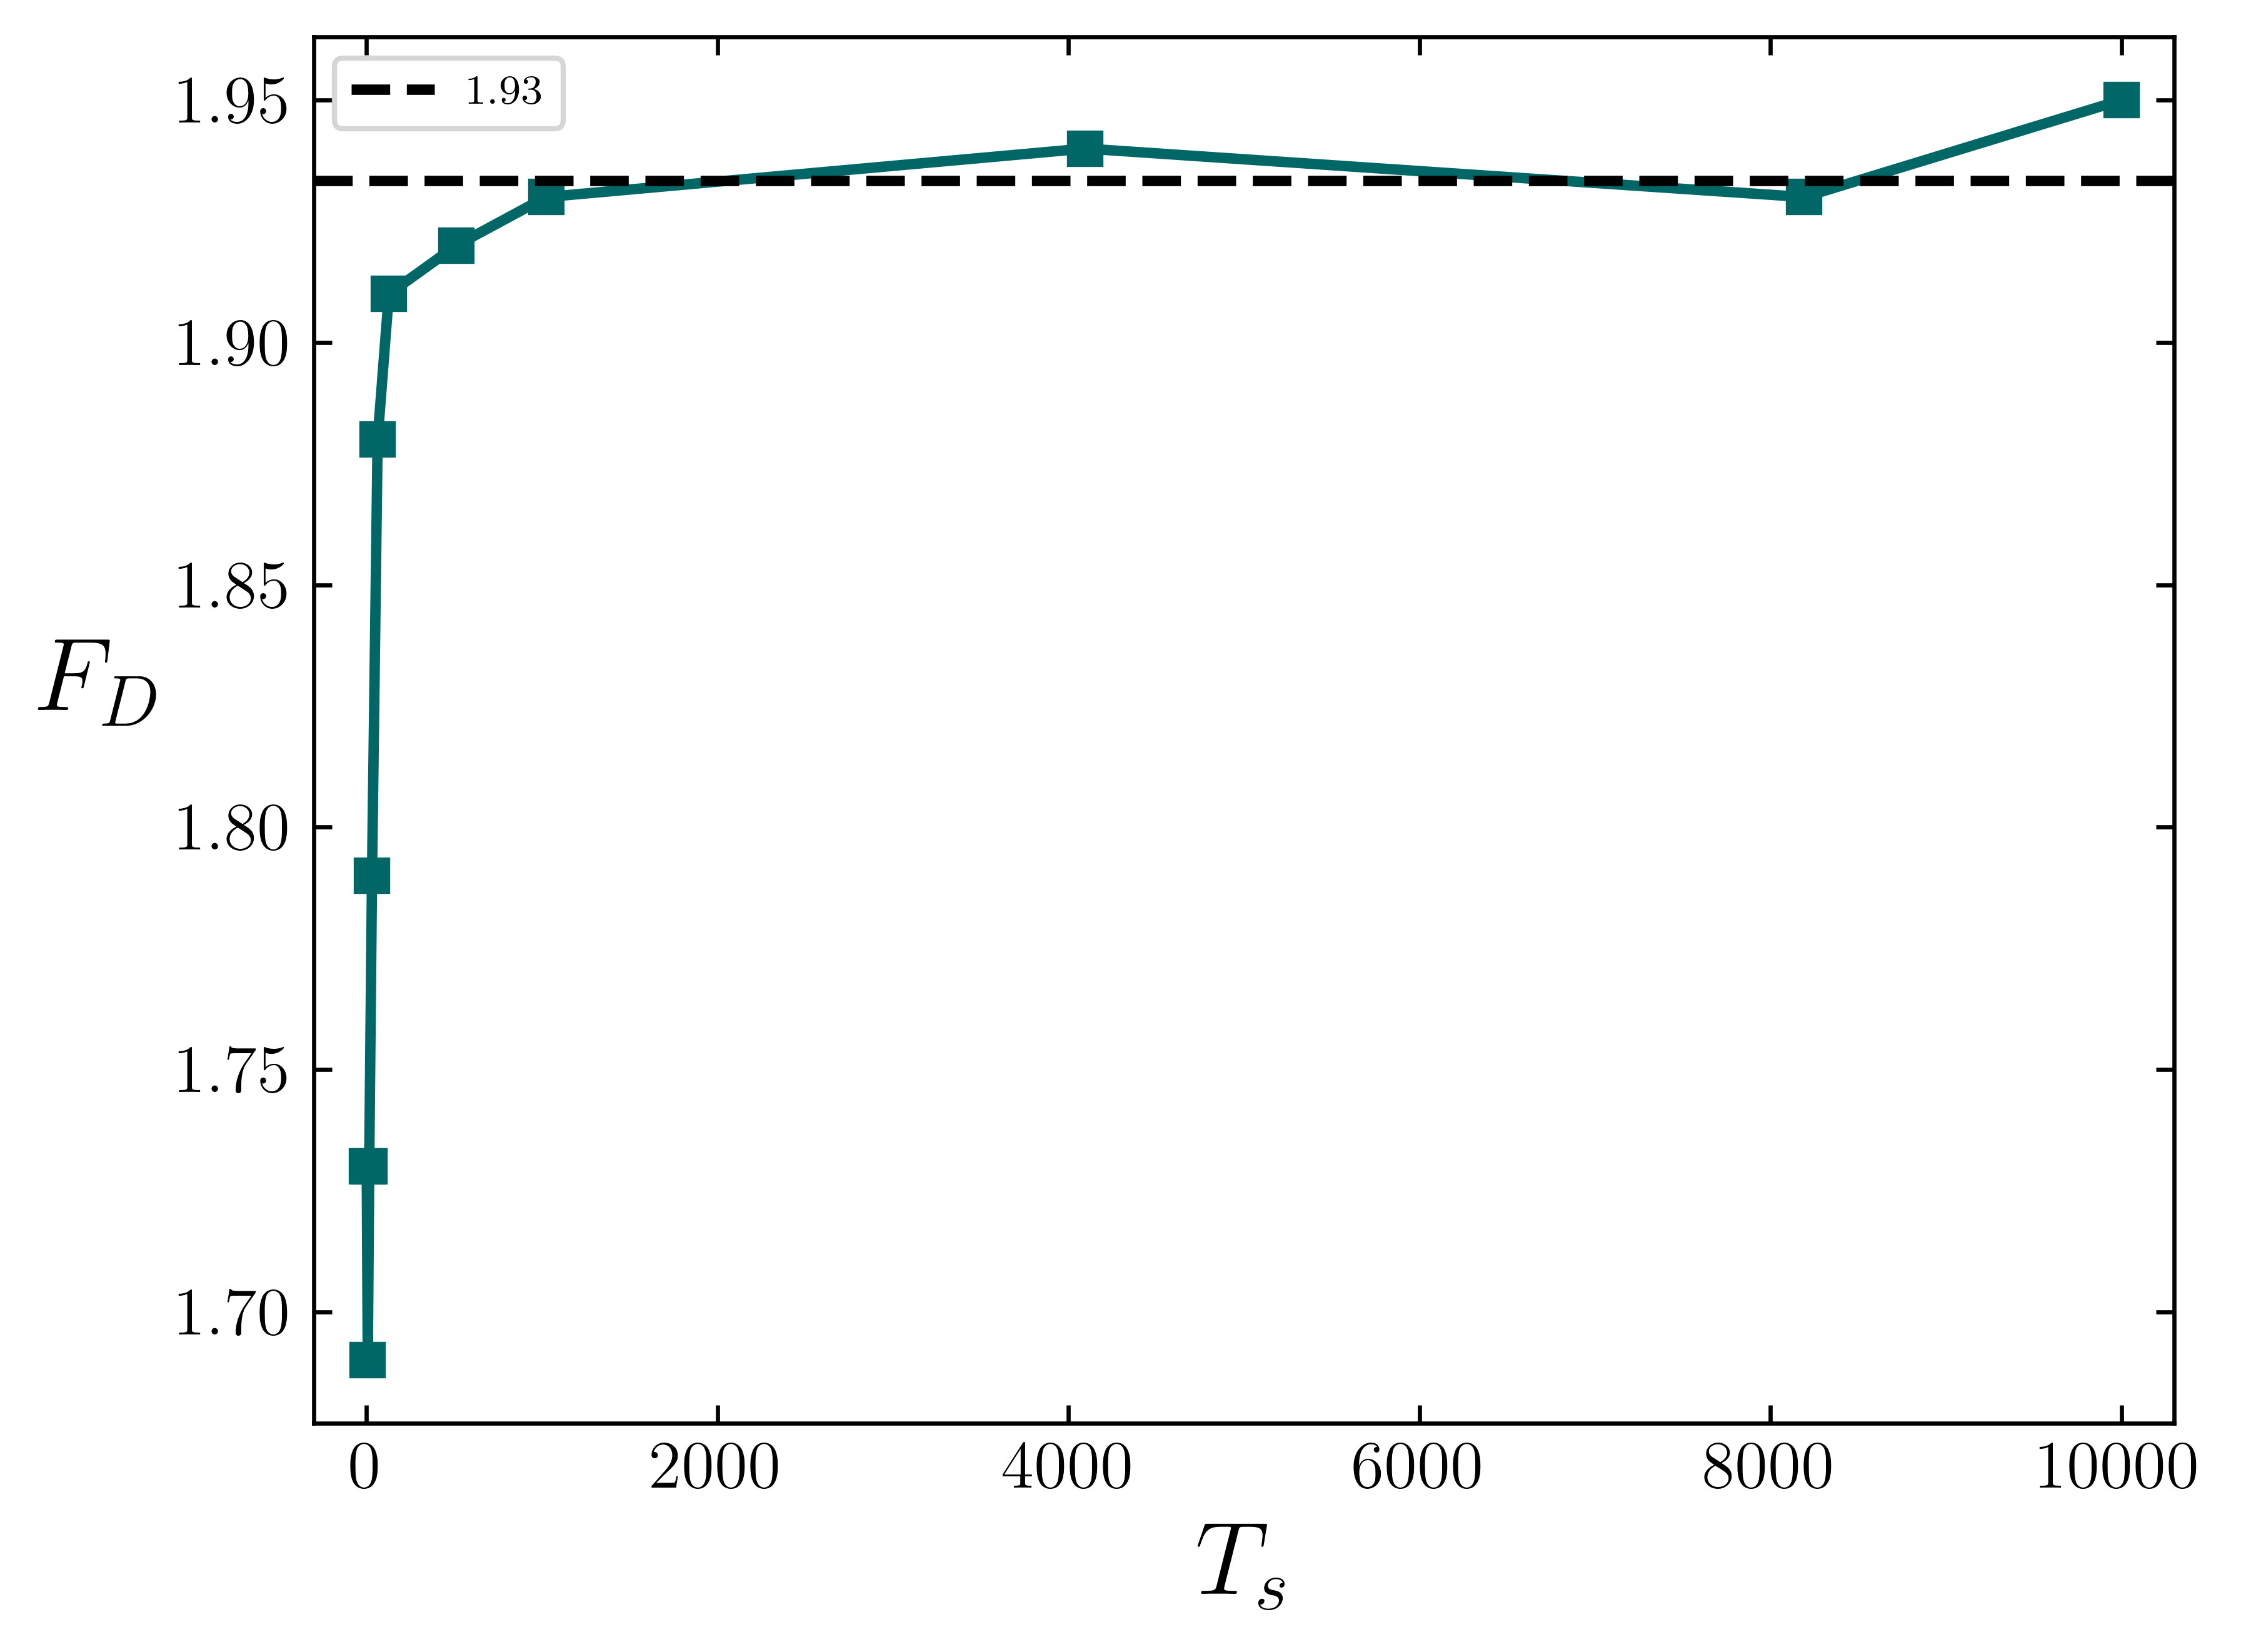

In [ ]:
plt.figure(dpi = 600)
plt.plot(x.T[0], dfm, 's-', c ='#006666')
plt.plot(x1,y2,'--',c = 'black', label = f'{np.round(np.mean(dfm[-4:-1]),2)}')
plt.xlabel(r"$T_{s}$")

plt.ylabel(r"$F_{D}$", rotation = 0, labelpad=15)
plt.legend(loc = 'best') 
# Configurar os tracinhos para dentro e desativar os labels superior e direito
plt.tick_params(direction='in', top=True, right=True, labeltop=False, labelright=False)
plt.xlim(-300,10300)

(0.0, 10.0)

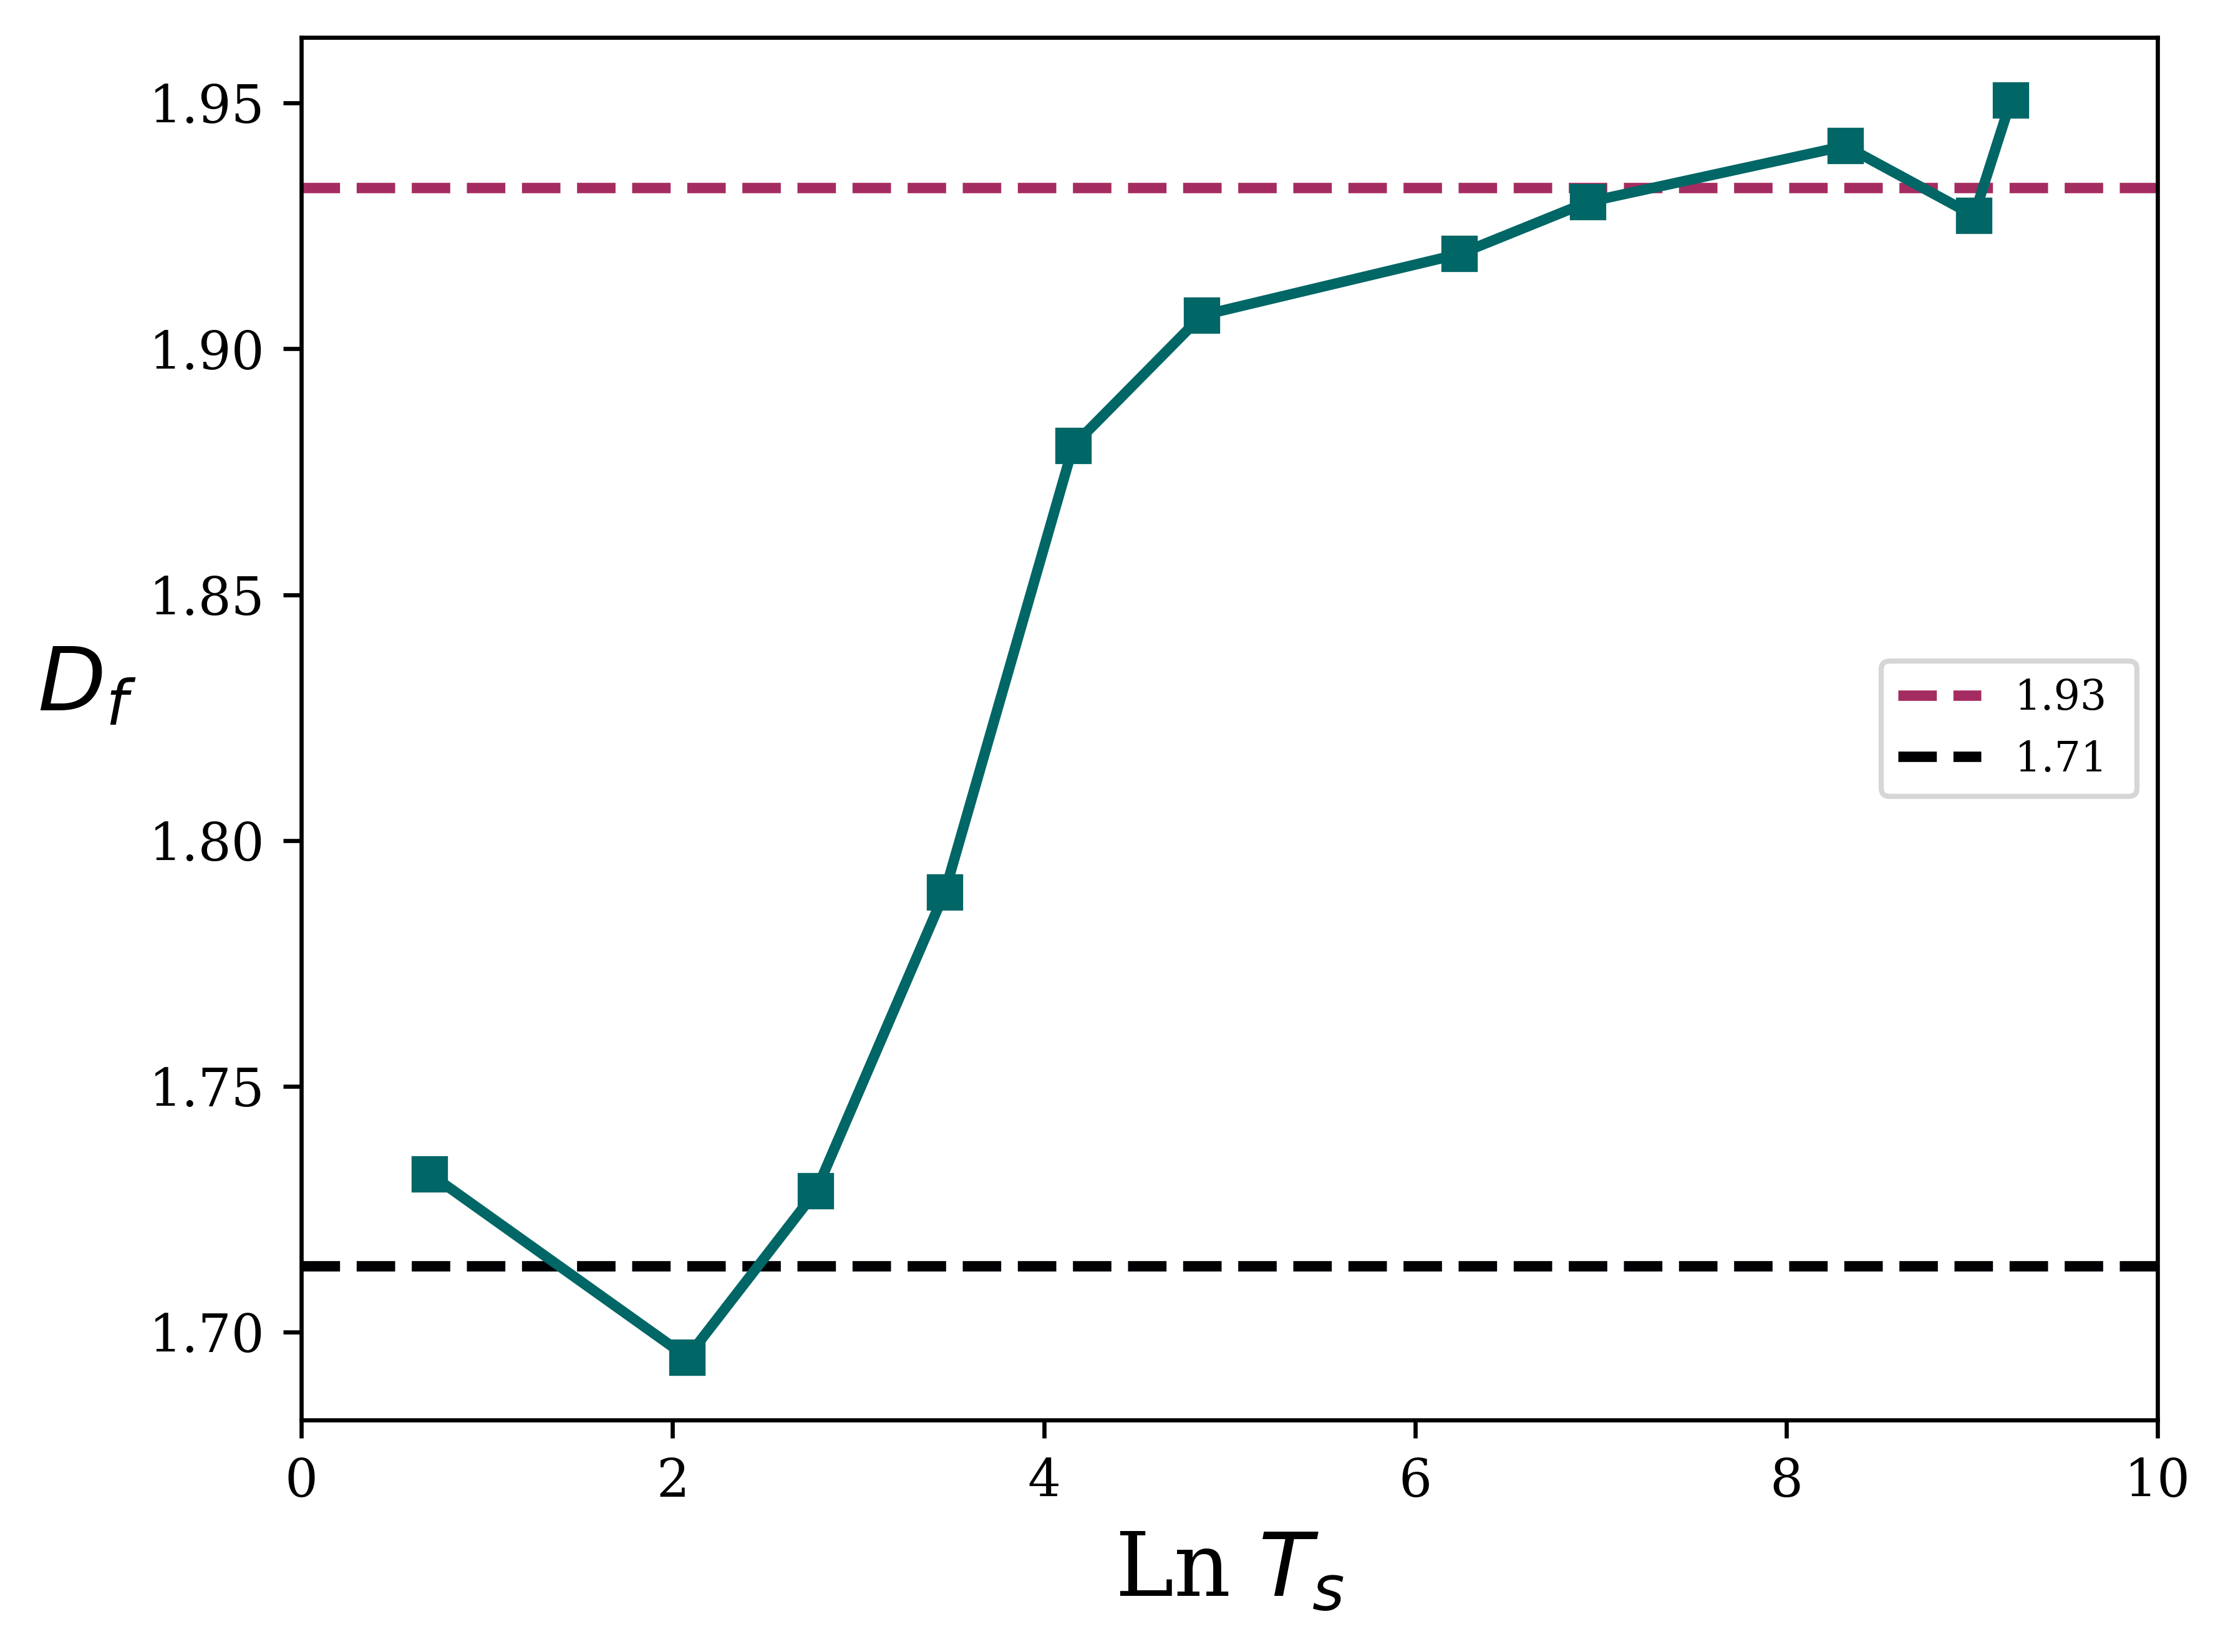

In [21]:
plt.figure(dpi = 600)
plt.plot(x1,y2,'--',c = colors[4], label = f'{np.round(np.mean(dfm[-4:-1]),2)}')
plt.plot(x1,y1,'--',c = colors[0], label = f'{np.round(np.mean(dfm[0:2]),2)} ')
plt.plot(np.log(x.T[0]), x.T[1], 's-',c = '#006666')
plt.xlabel(r"Ln $T_{s}$")
plt.ylabel(r"$D_{f}$", rotation = 0, labelpad=12)
plt.legend(loc = 'center right')
# Adicionando a legenda preta
plt.xlim(0,10)

In [32]:
import os
import fnmatch

def listar_arquivos_dat(diretorio):
    # Lista todos os arquivos no diretório
    arquivos = os.listdir(diretorio)

    # Filtra apenas os arquivos que terminam com ".dat"
    arquivos_dat = fnmatch.filter(arquivos, '*.dat')

    return arquivos_dat

# Substitua 'caminho/do/seu/diretorio' pelo caminho do diretório que você deseja listar
diretorio_alvo = './'

# Lista os arquivos .dat no diretório especificado
arquivos_dat = listar_arquivos_dat(diretorio_alvo)

# Imprime a lista de arquivos .dat
for arquivo in arquivos_dat:
    print(arquivo)


dfs.dat
df_ts_10000.dat
df_ts_1024.dat
df_ts_128.dat
df_ts_16.dat
df_ts_16384.dat
df_ts_2.dat
df_ts_32.dat
df_ts_4096.dat
df_ts_512.dat
df_ts_64.dat
df_ts_8.dat
df_ts_8192.dat


In [33]:
sorted(arquivos_dat)

['df_ts_10000.dat',
 'df_ts_1024.dat',
 'df_ts_128.dat',
 'df_ts_16.dat',
 'df_ts_16384.dat',
 'df_ts_2.dat',
 'df_ts_32.dat',
 'df_ts_4096.dat',
 'df_ts_512.dat',
 'df_ts_64.dat',
 'df_ts_8.dat',
 'df_ts_8192.dat',
 'dfs.dat']

In [186]:
lts = [10000,1024, 128, 16,2, 4096, 512, 64, 8, 8192,32]

In [187]:
l = sorted(lts)

In [77]:
l

[2, 8, 16, 32, 64, 128, 512, 1024, 4096, 8192, 10000]

In [91]:
arquivos_dat

['df_ts_1024.dat',
 'df_ts_128.dat',
 'df_ts_16.dat',
 'df_ts_2.dat',
 'df_ts_4096.dat',
 'df_ts_512.dat',
 'df_ts_64.dat',
 'df_ts_8.dat',
 'df_ts_8192.dat']

In [88]:
del arquivos_dat[0]

In [184]:
arq = ['df_ts_2.dat','df_ts_8.dat','df_ts_16.dat','df_ts_32.dat', 'df_ts_64.dat','df_ts_128.dat','df_ts_512.dat','df_ts_1024.dat','df_ts_4096.dat','df_ts_8192.dat','df_ts_10000.dat']

./df_ts_2.dat
./df_ts_8.dat
./df_ts_16.dat
./df_ts_32.dat
./df_ts_64.dat
./df_ts_128.dat
./df_ts_512.dat
./df_ts_1024.dat
./df_ts_4096.dat
./df_ts_8192.dat
./df_ts_10000.dat


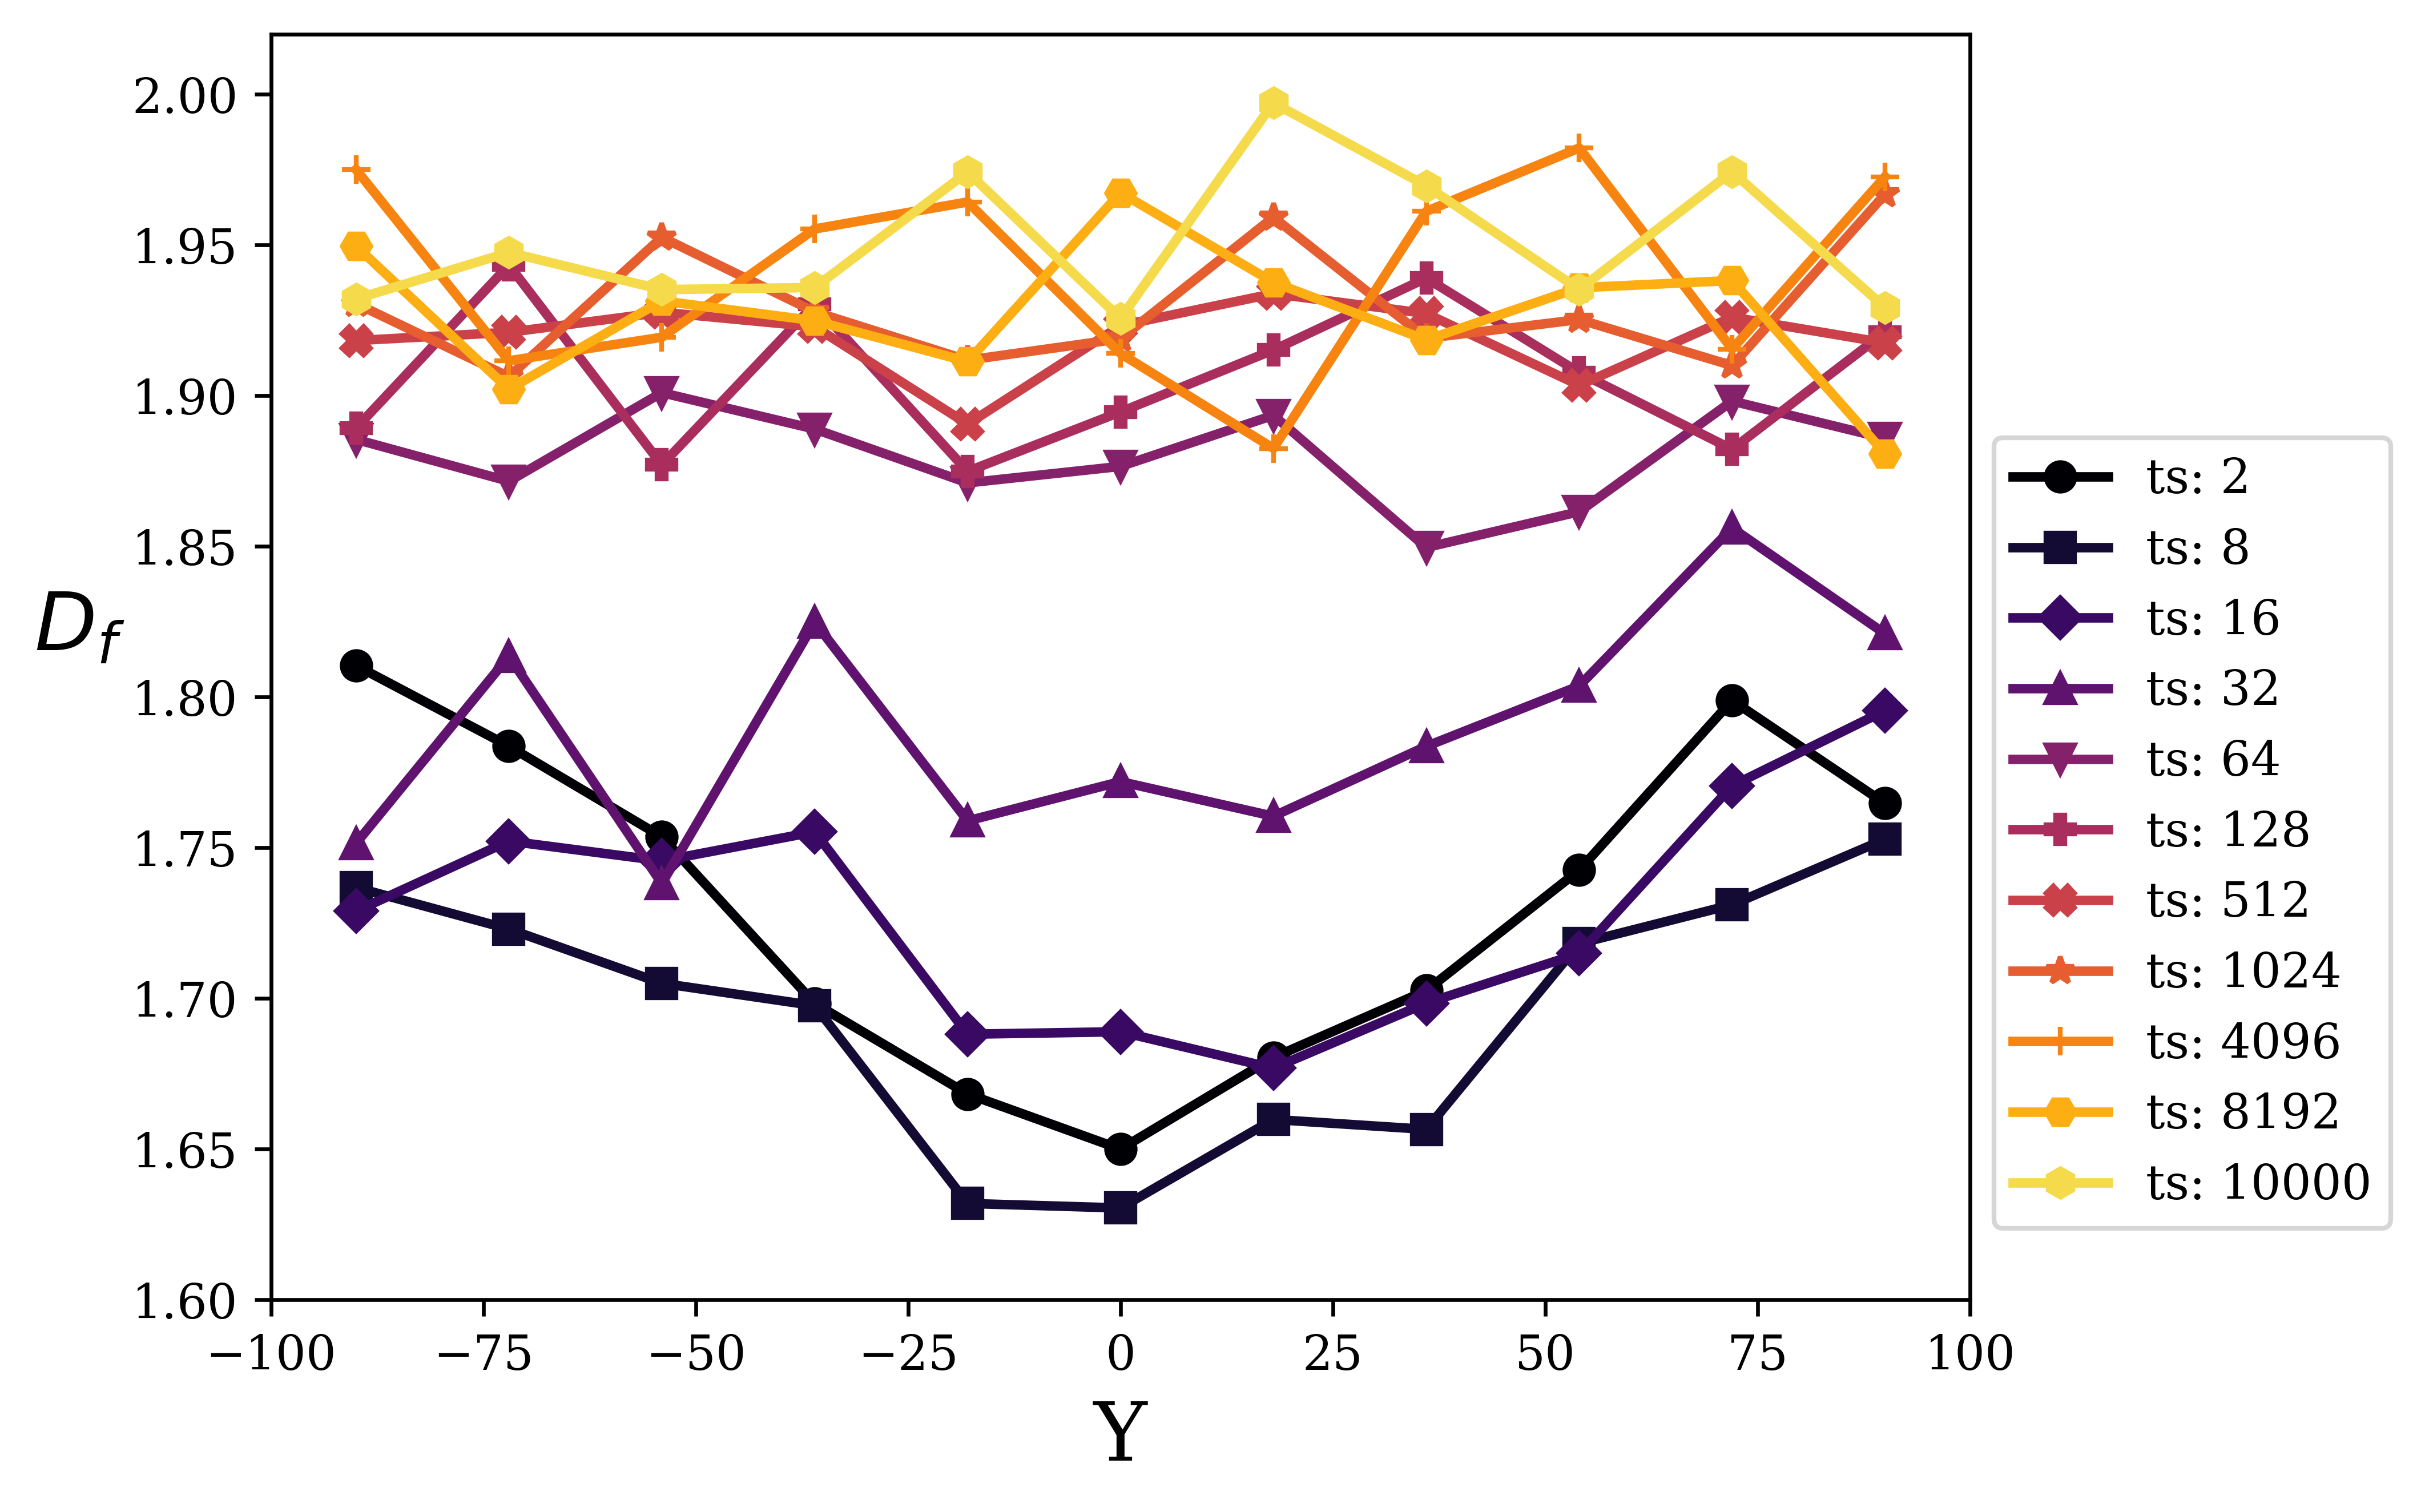

In [193]:
j = 0
stds = []
plt.figure(dpi = 600)
#plt.figure(figsize= (10,10))
for i in arq:

    fn = './' + i
    print(fn)
    dt = np.loadtxt(fn)
    plt.plot(cs_s, dt.T[1], marker = markers[j], label = f'ts: {round(l[j],2)}')
    stds.append(np.std(dt.T[1]))
    j+=1

plt.xlabel(r"Y")
plt.ylabel(r"$D_{f}$", rotation = 0,  labelpad=11)
plt.legend(loc = 'best', bbox_to_anchor=(1, 0.7))
plt.rc('legend', fontsize=10)

plt.xlim(-100,100)
plt.ylim(1.6,2.02)
plt.show()

In [207]:
stds

[0.05256486425510535,
 0.041206719267134706,
 0.03665608891579649,
 0.015147921600445492,
 0.02367906009488569,
 0.011690810624996927,
 0.01973026450000063,
 0.03183033546160232,
 0.022471088722168794]

In [41]:
dt.T[1]

array([1.81048224, 1.78371951, 1.7536395 , 1.69837335, 1.66830871,
       1.6500242 , 1.6804337 , 1.70263449, 1.74258523, 1.79891996,
       1.76474578])

In [40]:
np.std(dt.T[1])

0.05256486425510535

In [193]:
0.2/np.sqrt(50)

0.0282842712474619

In [223]:
print(df)

         id    uid   x   y  z              file_path
0       uid      0   0  -9  0  ts_8192_seed_6385.dat
1       uid      0   0  -8  0  ts_8192_seed_6385.dat
2       uid      0   0  -7  0  ts_8192_seed_6385.dat
3       uid      0   0  -6  0  ts_8192_seed_6385.dat
4       uid      0   0  -5  0  ts_8192_seed_6385.dat
...     ...    ...  ..  .. ..                    ...
538987  uid  29943 -10  28 -5  ts_8192_seed_6385.dat
538988  uid  29943 -10  29 -5  ts_8192_seed_6385.dat
538989  uid  29943 -10  30 -5  ts_8192_seed_6385.dat
538990  uid  29943 -10  31 -5  ts_8192_seed_6385.dat
538991  uid  29943 -10  32 -5  ts_8192_seed_6385.dat

[56545 rows x 6 columns]


In [112]:
import plotly.graph_objs as go
import plotly.offline as pyo

# Suponha que estas são suas listas de coordenadas
x_list = df['x'].tolist()
y_list = df['y'].tolist()
z_list = df['z'].tolist()
# Criar uma instância de Scatter3d
trace = go.Scatter3d(
    x=x_list,
    y=y_list,
    z=z_list,
    mode='markers',
    marker=dict(
        size=5,  # Tamanho dos marcadores
        color=z_list,  # Cor baseada nos valores de z_list
        colorscale='Viridis',  # Escolha uma paleta de cores
        opacity=0.8  # Transparência dos marcadores
    )
)

# Definindo o layout do gráfico
layout = go.Layout(
    title='Gráfico 3D de dispersão com suas listas',
    scene=dict(
        xaxis=dict(title='Eixo X'),
        yaxis=dict(title='Eixo Y'),
        zaxis=dict(title='Eixo Z')
    )
)

# Criar figura e adicionar o trace
fig = go.Figure(data=[trace], layout=layout)
fig.show()

In [107]:
ys, counts = np.unique(DFCS[8192][0]['y'].tolist(), return_counts=True)
ys = sorted(ys)

In [30]:
counts[1:-2]

array([259, 259, 332, 332, 263, 263, 329, 329, 271, 271, 330, 330, 267,
       267, 324, 324, 255, 255, 332, 332, 259, 259, 318, 318, 252, 252,
       322, 322, 263, 263, 329, 329, 272, 272, 327, 327, 250, 250, 317,
       317, 258, 258, 316, 316, 246, 246, 323, 323, 257, 257, 329, 329,
       274, 274, 340, 340, 273, 273, 327, 327, 269, 269, 332, 332, 255,
       255, 317, 317, 245, 245, 302, 302, 236, 236, 302, 302, 248, 248,
       321, 321, 258, 258, 326, 326, 264, 264, 324, 324, 267, 267, 335,
       335, 269, 269, 325, 325, 252, 252, 314, 314, 246, 246, 326, 326,
       266, 266, 323, 323, 255, 255, 307, 307, 251, 251, 321, 321, 259,
       259, 327, 327, 247, 247, 303, 303, 246, 246, 316, 316, 264, 264,
       318, 318, 248, 248, 323, 323, 255, 255, 312, 312, 256, 256, 320,
       320, 250, 250, 311, 311, 257, 257, 315, 315, 240, 240, 302, 302,
       245, 245, 305, 305, 241, 241, 296, 296, 235, 235, 295, 295, 237,
       237, 292, 292, 230, 230, 285, 285, 225, 225, 287, 287, 23

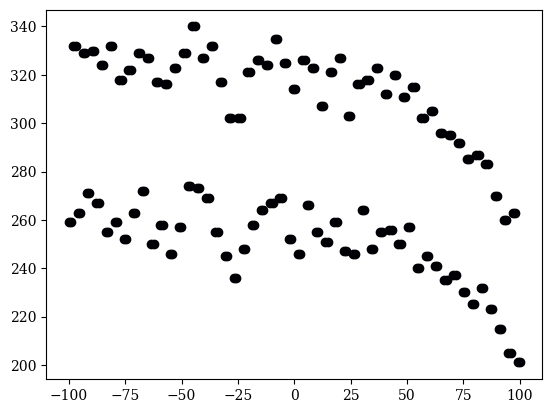

In [31]:
plt.scatter(np.linspace(-100,100,len(counts[1:-2])), counts[1:-2])

In [107]:
counts

array([307, 259, 259, 332, 332, 263, 263, 329, 329, 271, 271, 330, 330,
       267, 267, 324, 324, 255, 255, 332, 332, 259, 259, 318, 318, 252,
       252, 322, 322, 263, 263, 329, 329, 272, 272, 327, 327, 250, 250,
       317, 317, 258, 258, 316, 316, 246, 246, 323, 323, 257, 257, 329,
       329, 274, 274, 340, 340, 273, 273, 327, 327, 269, 269, 332, 332,
       255, 255, 317, 317, 245, 245, 302, 302, 236, 236, 302, 302, 248,
       248, 321, 321, 258, 258, 326, 326, 264, 264, 324, 324, 267, 267,
       335, 335, 269, 269, 325, 325, 252, 252, 314, 314, 246, 246, 326,
       326, 266, 266, 323, 323, 255, 255, 307, 307, 251, 251, 321, 321,
       259, 259, 327, 327, 247, 247, 303, 303, 246, 246, 316, 316, 264,
       264, 318, 318, 248, 248, 323, 323, 255, 255, 312, 312, 256, 256,
       320, 320, 250, 250, 311, 311, 257, 257, 315, 315, 240, 240, 302,
       302, 245, 245, 305, 305, 241, 241, 296, 296, 235, 235, 295, 295,
       237, 237, 292, 292, 230, 230, 285, 285, 225, 225, 287, 28

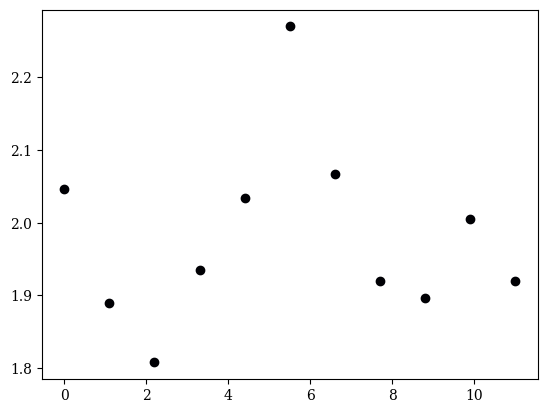

In [113]:
plt.scatter(np.linspace(0,len(Dfs),len(Dfs)),Dfs)

In [114]:
import statistics

In [116]:
type(Dfs)

list

In [120]:
np.std(Dfs())

0.1181601099351682

In [9]:
ys

[-100,
 -99,
 -98,
 -97,
 -96,
 -95,
 -94,
 -93,
 -92,
 -91,
 -90,
 -89,
 -88,
 -87,
 -86,
 -85,
 -84,
 -83,
 -82,
 -81,
 -80,
 -79,
 -78,
 -77,
 -76,
 -75,
 -74,
 -73,
 -72,
 -71,
 -70,
 -69,
 -68,
 -67,
 -66,
 -65,
 -64,
 -63,
 -62,
 -61,
 -60,
 -59,
 -58,
 -57,
 -56,
 -55,
 -54,
 -53,
 -52,
 -51,
 -50,
 -49,
 -48,
 -47,
 -46,
 -45,
 -44,
 -43,
 -42,
 -41,
 -40,
 -39,
 -38,
 -37,
 -36,
 -35,
 -34,
 -33,
 -32,
 -31,
 -30,
 -29,
 -28,
 -27,
 -26,
 -25,
 -24,
 -23,
 -22,
 -21,
 -20,
 -19,
 -18,
 -17,
 -16,
 -15,
 -14,
 -13,
 -12,
 -11,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83

In [140]:
ys, counts = np.unique(DFCS[2][0]['y'].tolist(), return_counts=True)
ys = sorted(ys)
x = DFCS[2][0]['x'][DFCS[2][0]['y'] == ys[0]].tolist()
z = DFCS[2][0]['z'][DFCS[2][0]['y'] == ys[0]].tolist()

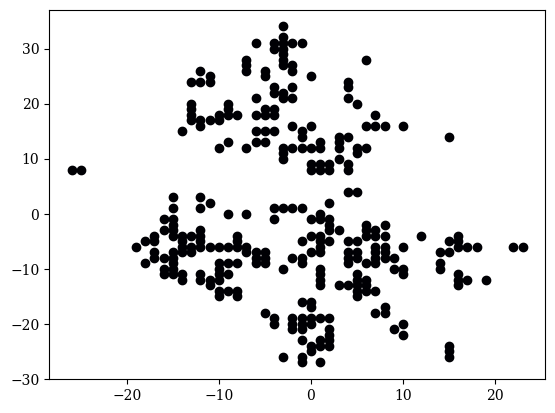

In [17]:
plt.scatter(x,z)

In [110]:
x

[1,
 2,
 0,
 3,
 1,
 -1,
 0,
 2,
 3,
 0,
 4,
 1,
 0,
 2,
 -2,
 -1,
 2,
 -3,
 -2,
 2,
 1,
 -4,
 3,
 5,
 -4,
 7,
 3,
 6,
 8,
 7,
 3,
 3,
 3,
 -3,
 -1,
 7,
 1,
 8,
 -3,
 -2,
 9,
 9,
 9,
 1,
 -4,
 7,
 3,
 -4,
 -4,
 -4,
 10,
 -1,
 -4,
 -2,
 -3,
 6,
 -5,
 4,
 -5,
 10,
 0,
 6,
 8,
 4,
 -9,
 -2,
 10,
 9,
 -10,
 12,
 11,
 -7,
 -2,
 9,
 9,
 11,
 10,
 -3,
 8,
 0,
 13,
 -9,
 12,
 10,
 4,
 -1,
 4,
 8,
 8,
 3,
 10,
 8,
 -3,
 -4,
 -6,
 -11,
 14,
 -11,
 11,
 15,
 10,
 14,
 0,
 5,
 -5,
 21,
 0,
 -8,
 8,
 -8,
 11,
 -2,
 -11,
 12,
 17,
 -2,
 -11,
 -11,
 13,
 10,
 11,
 12,
 22,
 20,
 15,
 -5,
 19,
 -8,
 -6,
 -5,
 -12,
 11,
 -12,
 6,
 15,
 23,
 -15,
 15,
 -9,
 16,
 13,
 -4,
 -16,
 17,
 19,
 10,
 10,
 -6,
 11,
 -3,
 20,
 -12,
 -6,
 -8,
 -2,
 -6,
 11,
 4,
 24,
 12,
 27,
 18,
 13,
 16,
 19,
 0,
 21,
 28,
 9,
 -11,
 11,
 -1,
 14,
 -9,
 -11,
 22,
 28,
 -13,
 20,
 10,
 8,
 14,
 -1,
 29,
 -6,
 -3,
 29,
 30,
 24,
 21,
 -4,
 -4,
 25,
 10,
 -16,
 -9,
 -16,
 11,
 1,
 -3,
 19,
 -17,
 -6,
 -16,
 8,
 27,
 31,
 10,
 -2,


Caixas sobrepostas
Cross section for ts = 2


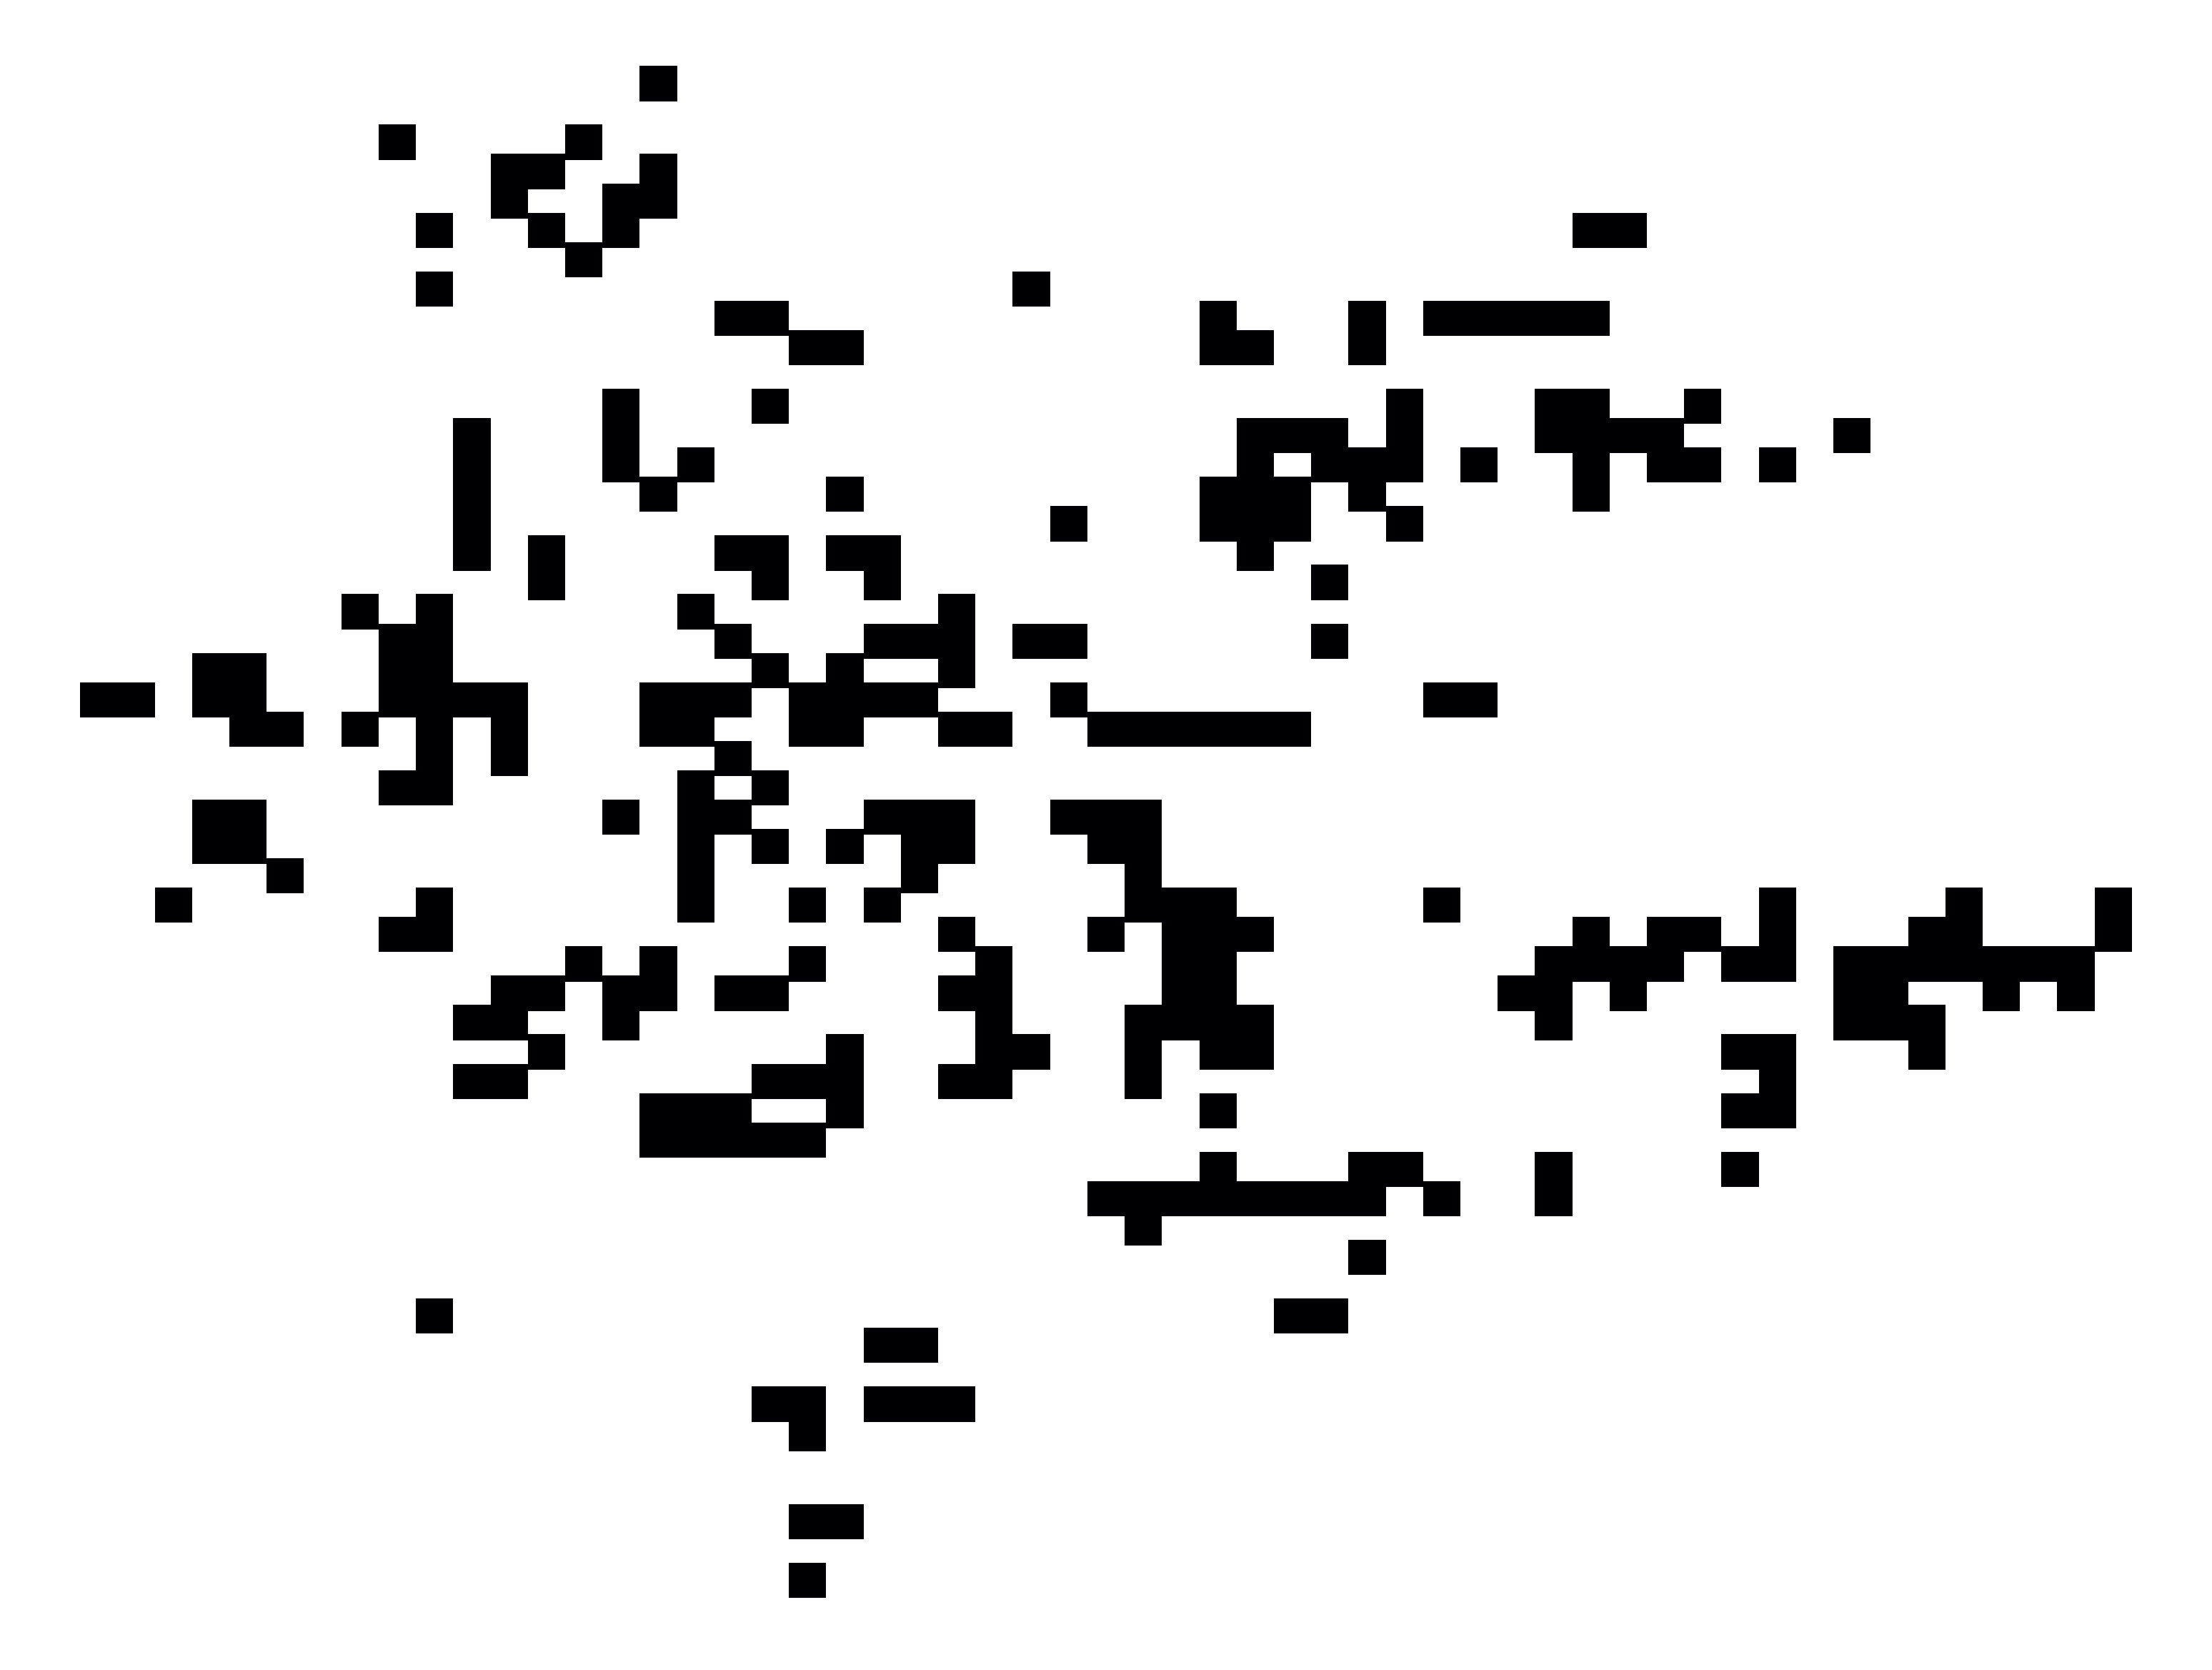

Caixas sobrepostas
Cross section for ts = 8


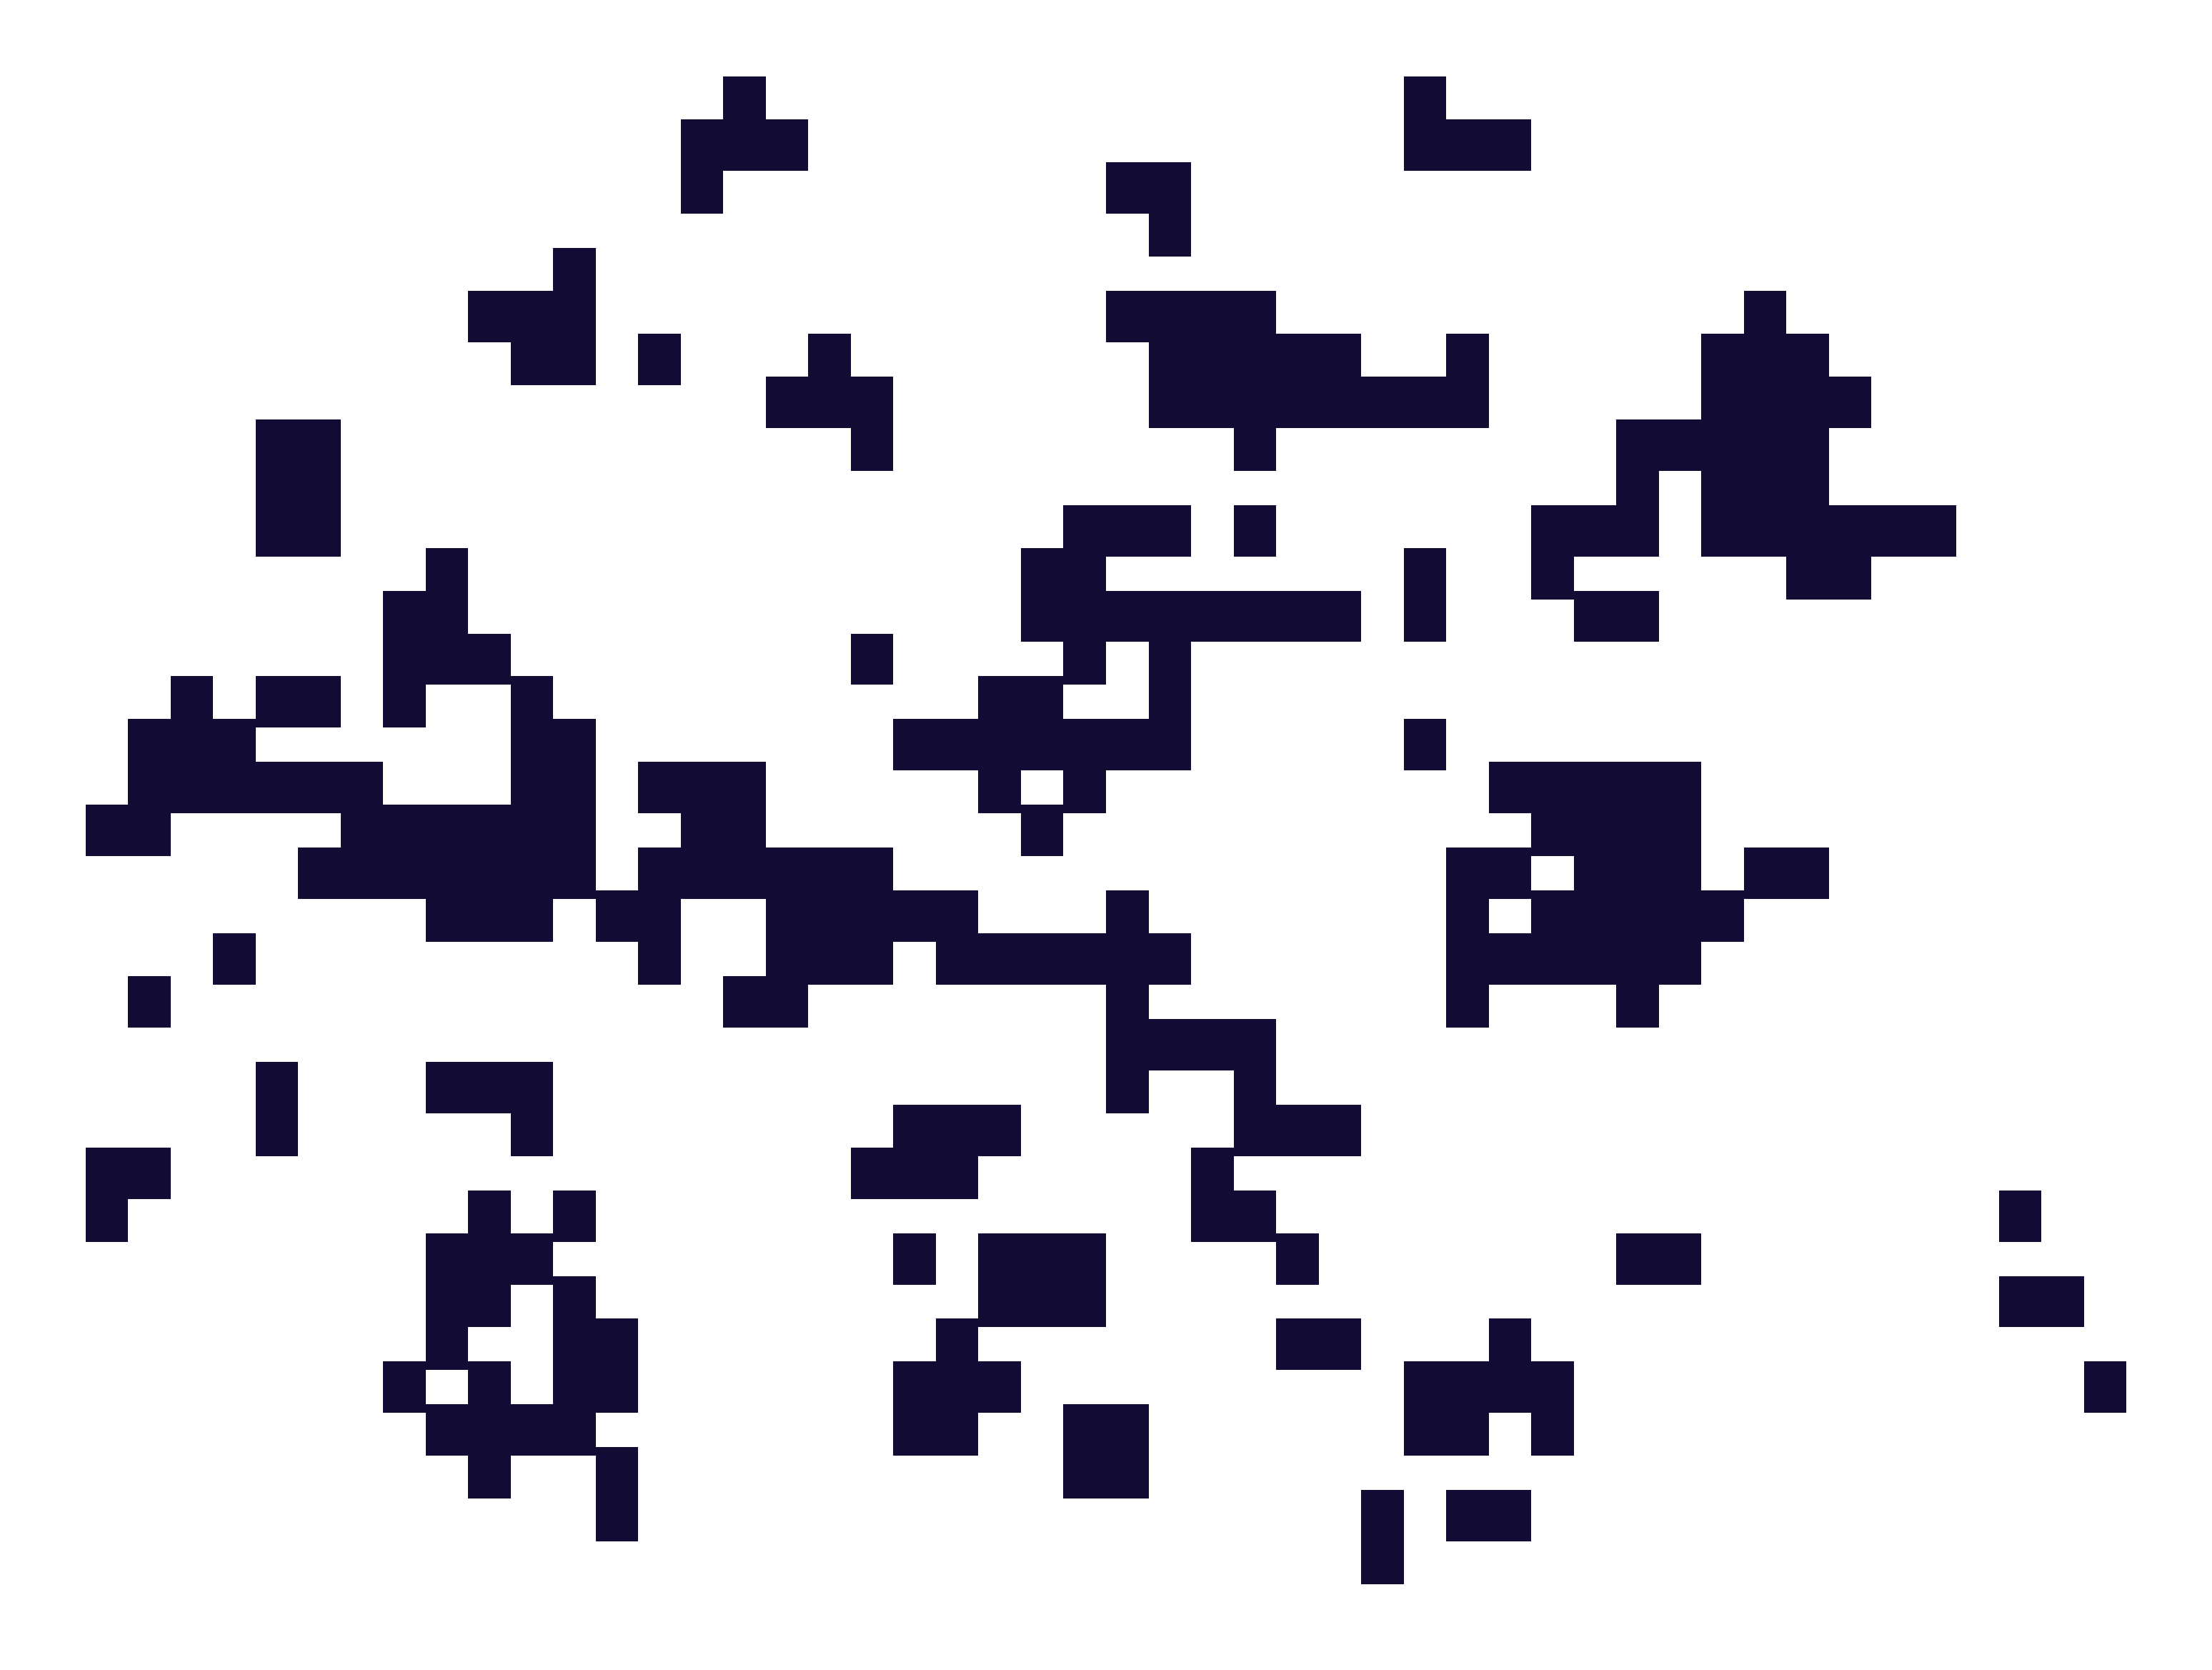

Caixas sobrepostas
Cross section for ts = 16


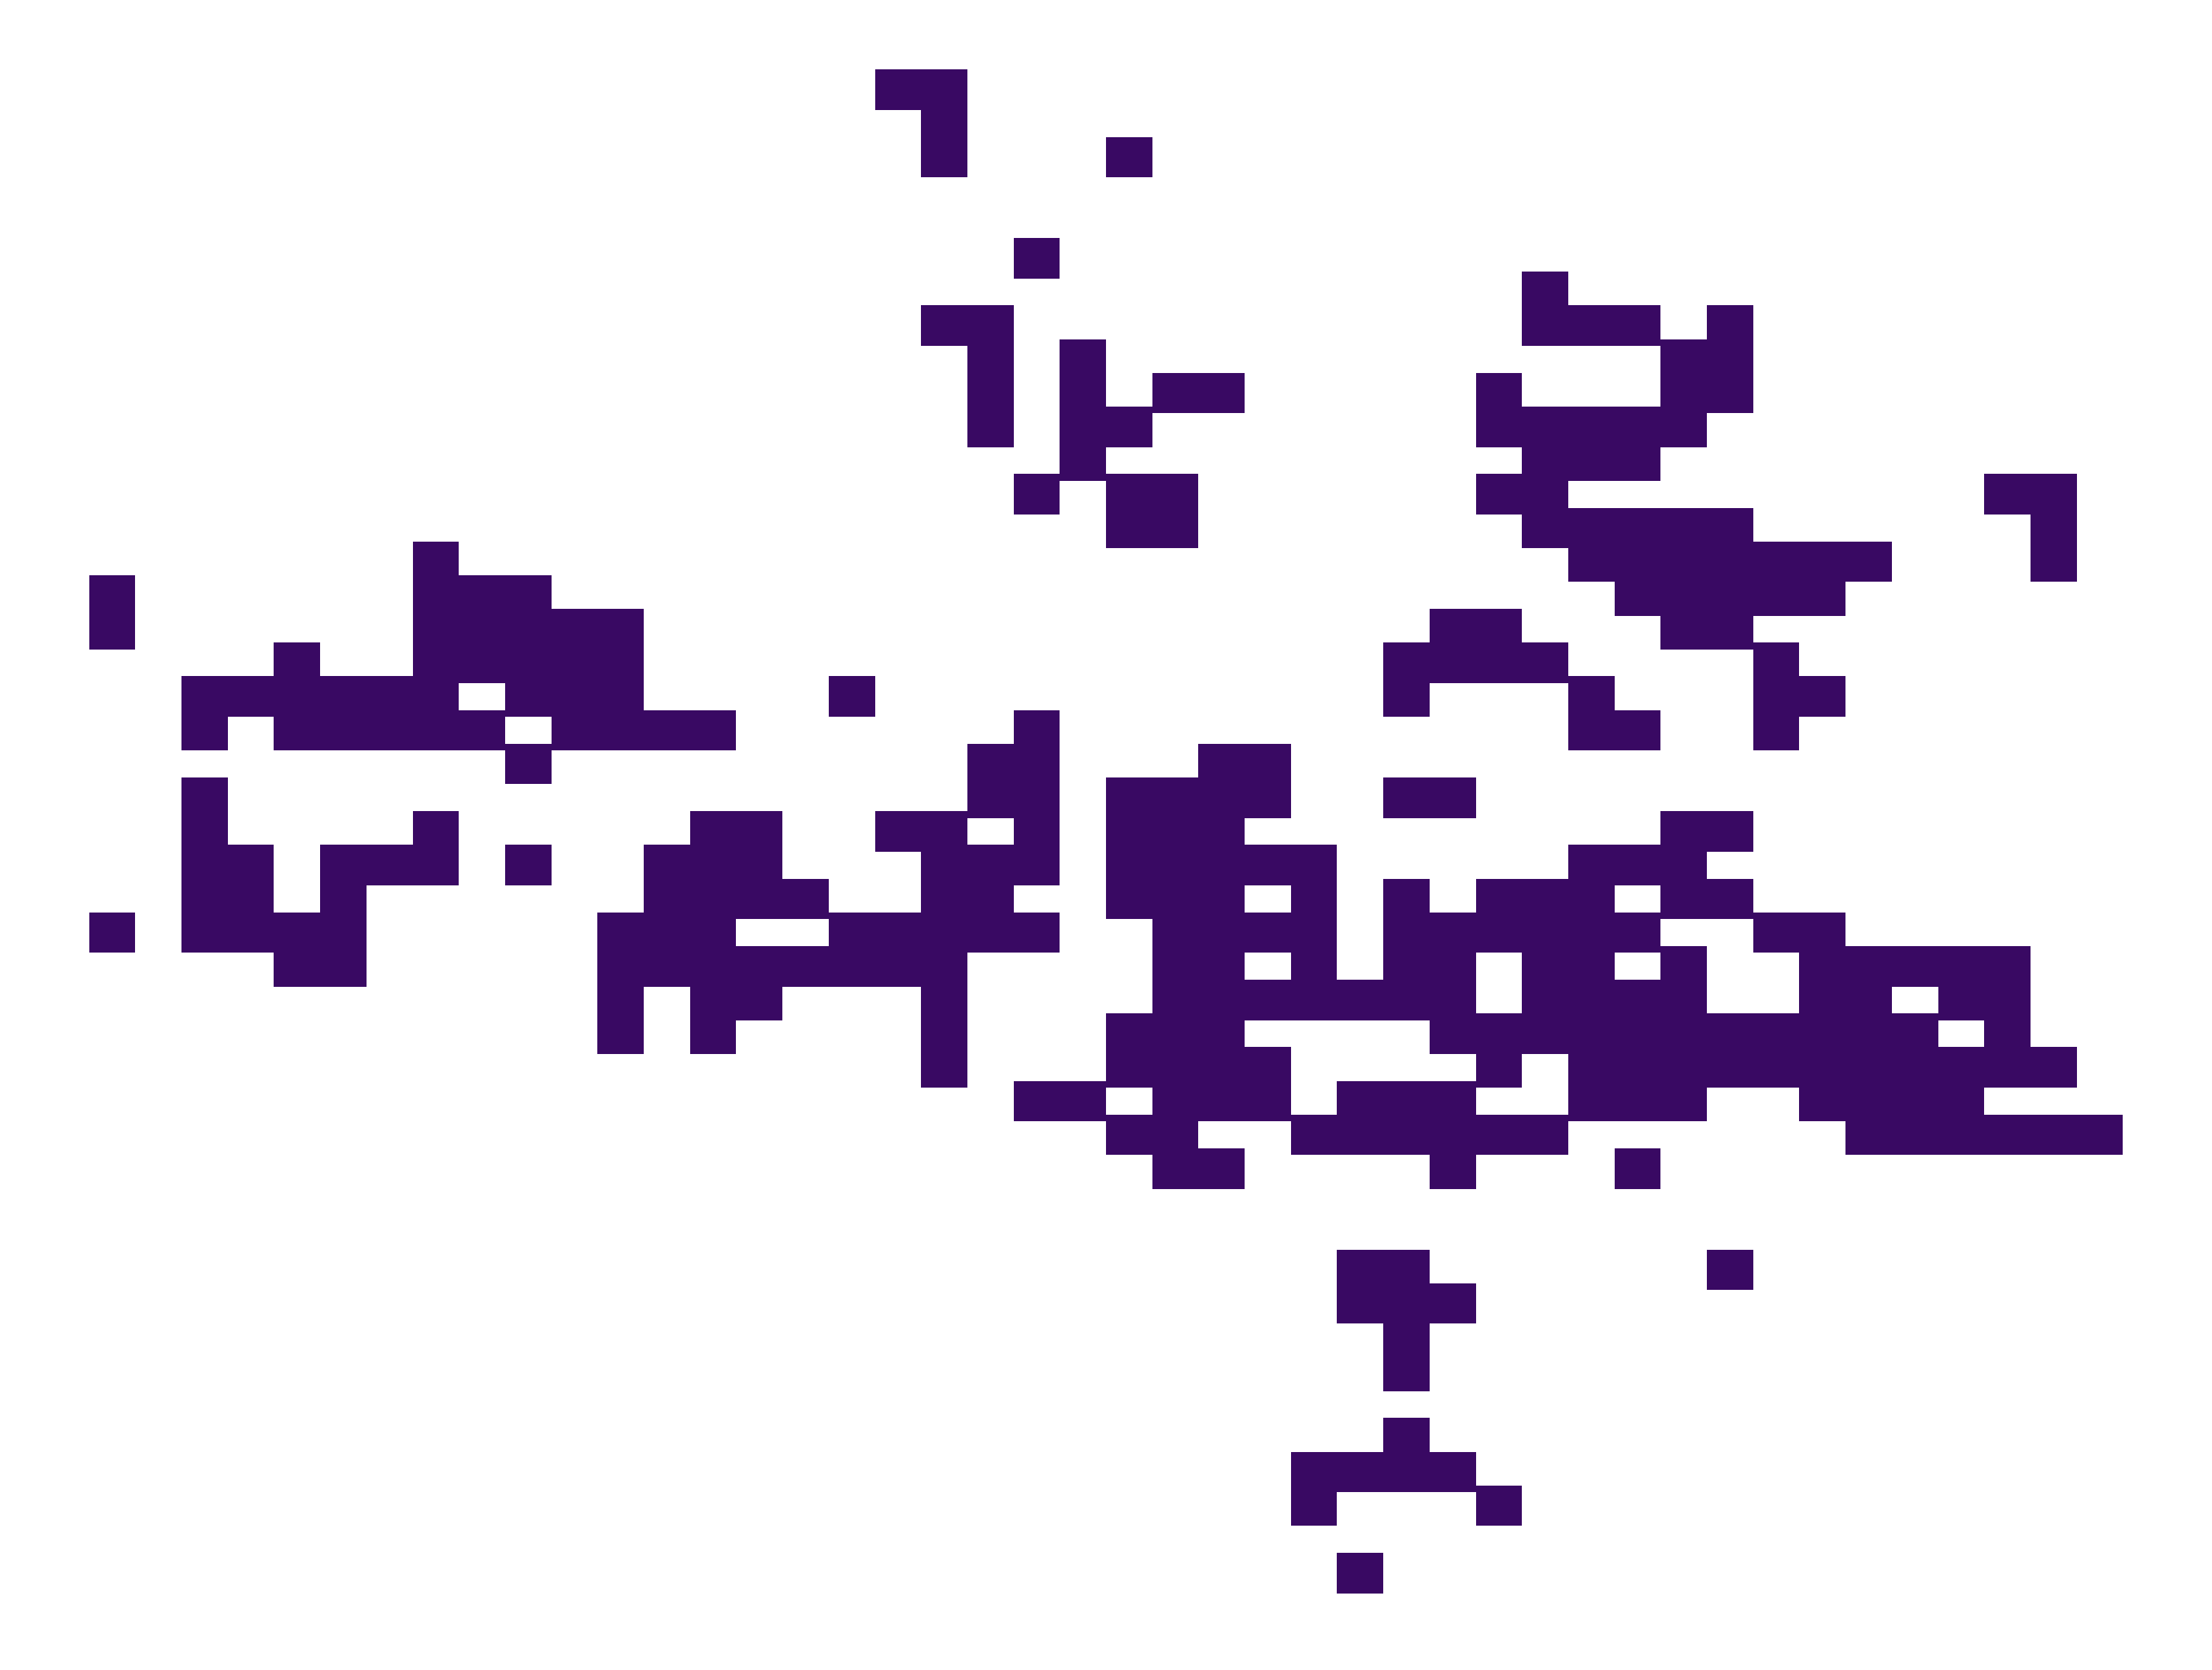

Caixas sobrepostas
Cross section for ts = 32


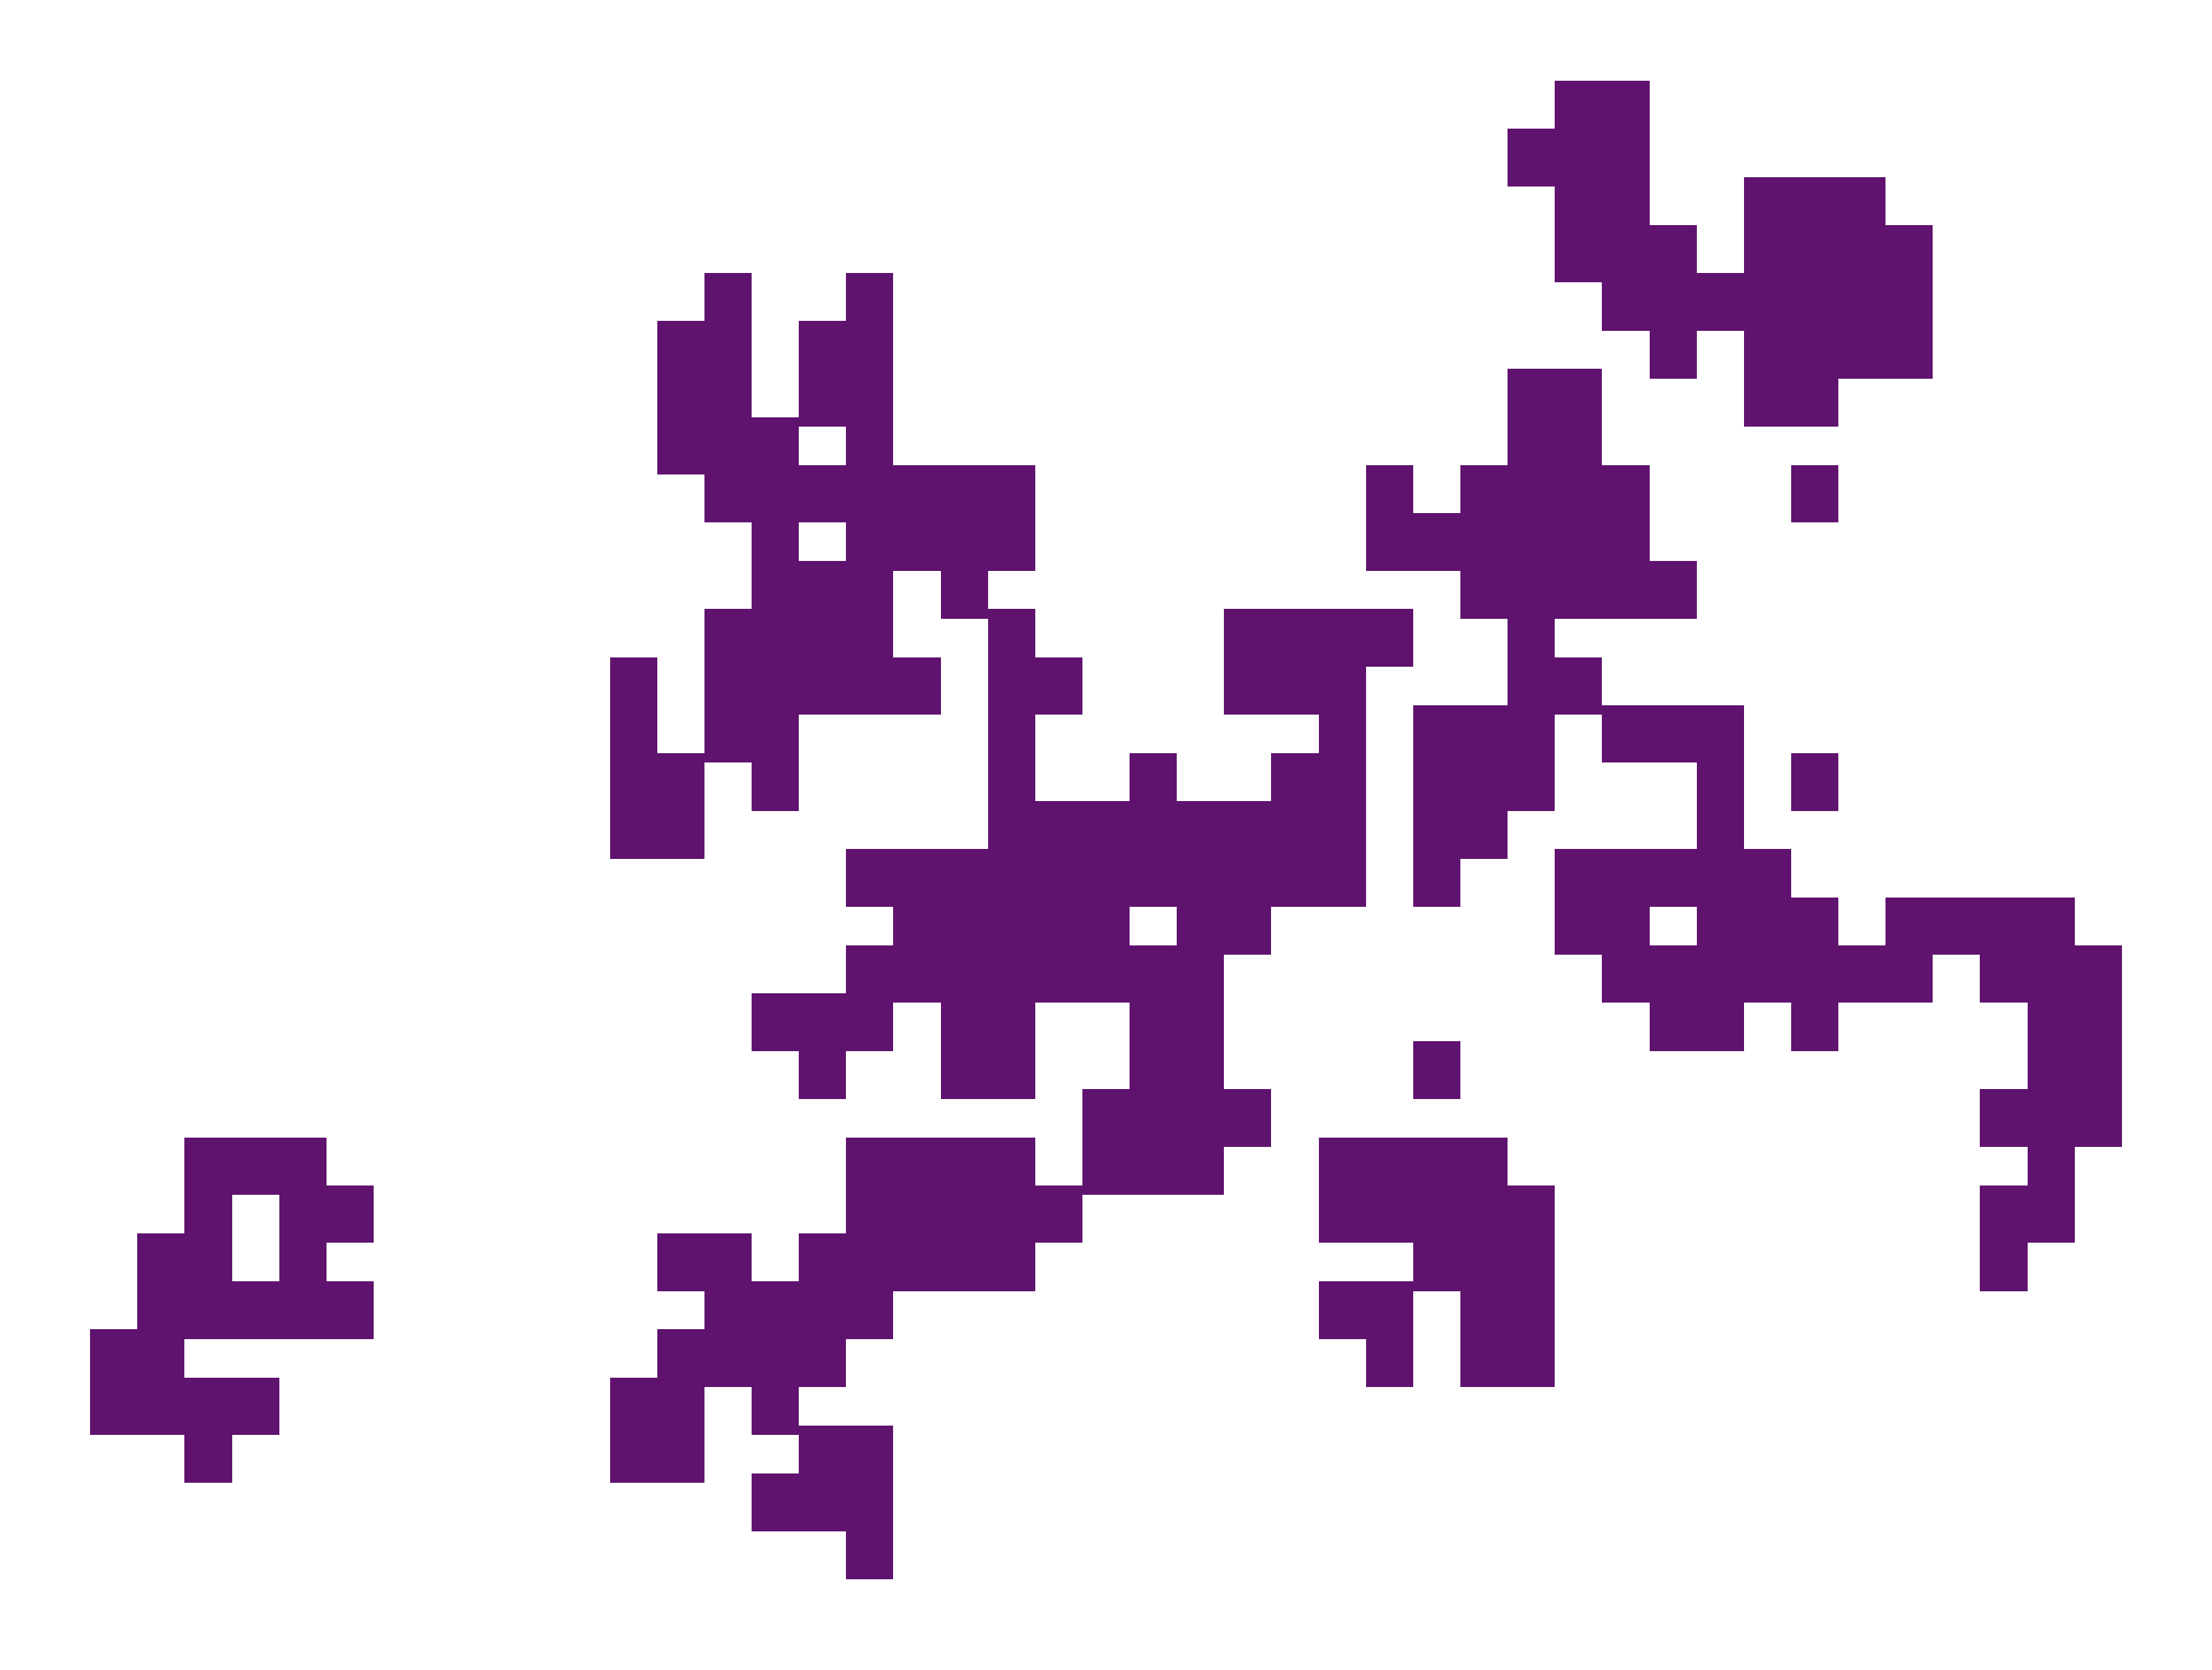

Caixas sobrepostas
Cross section for ts = 64


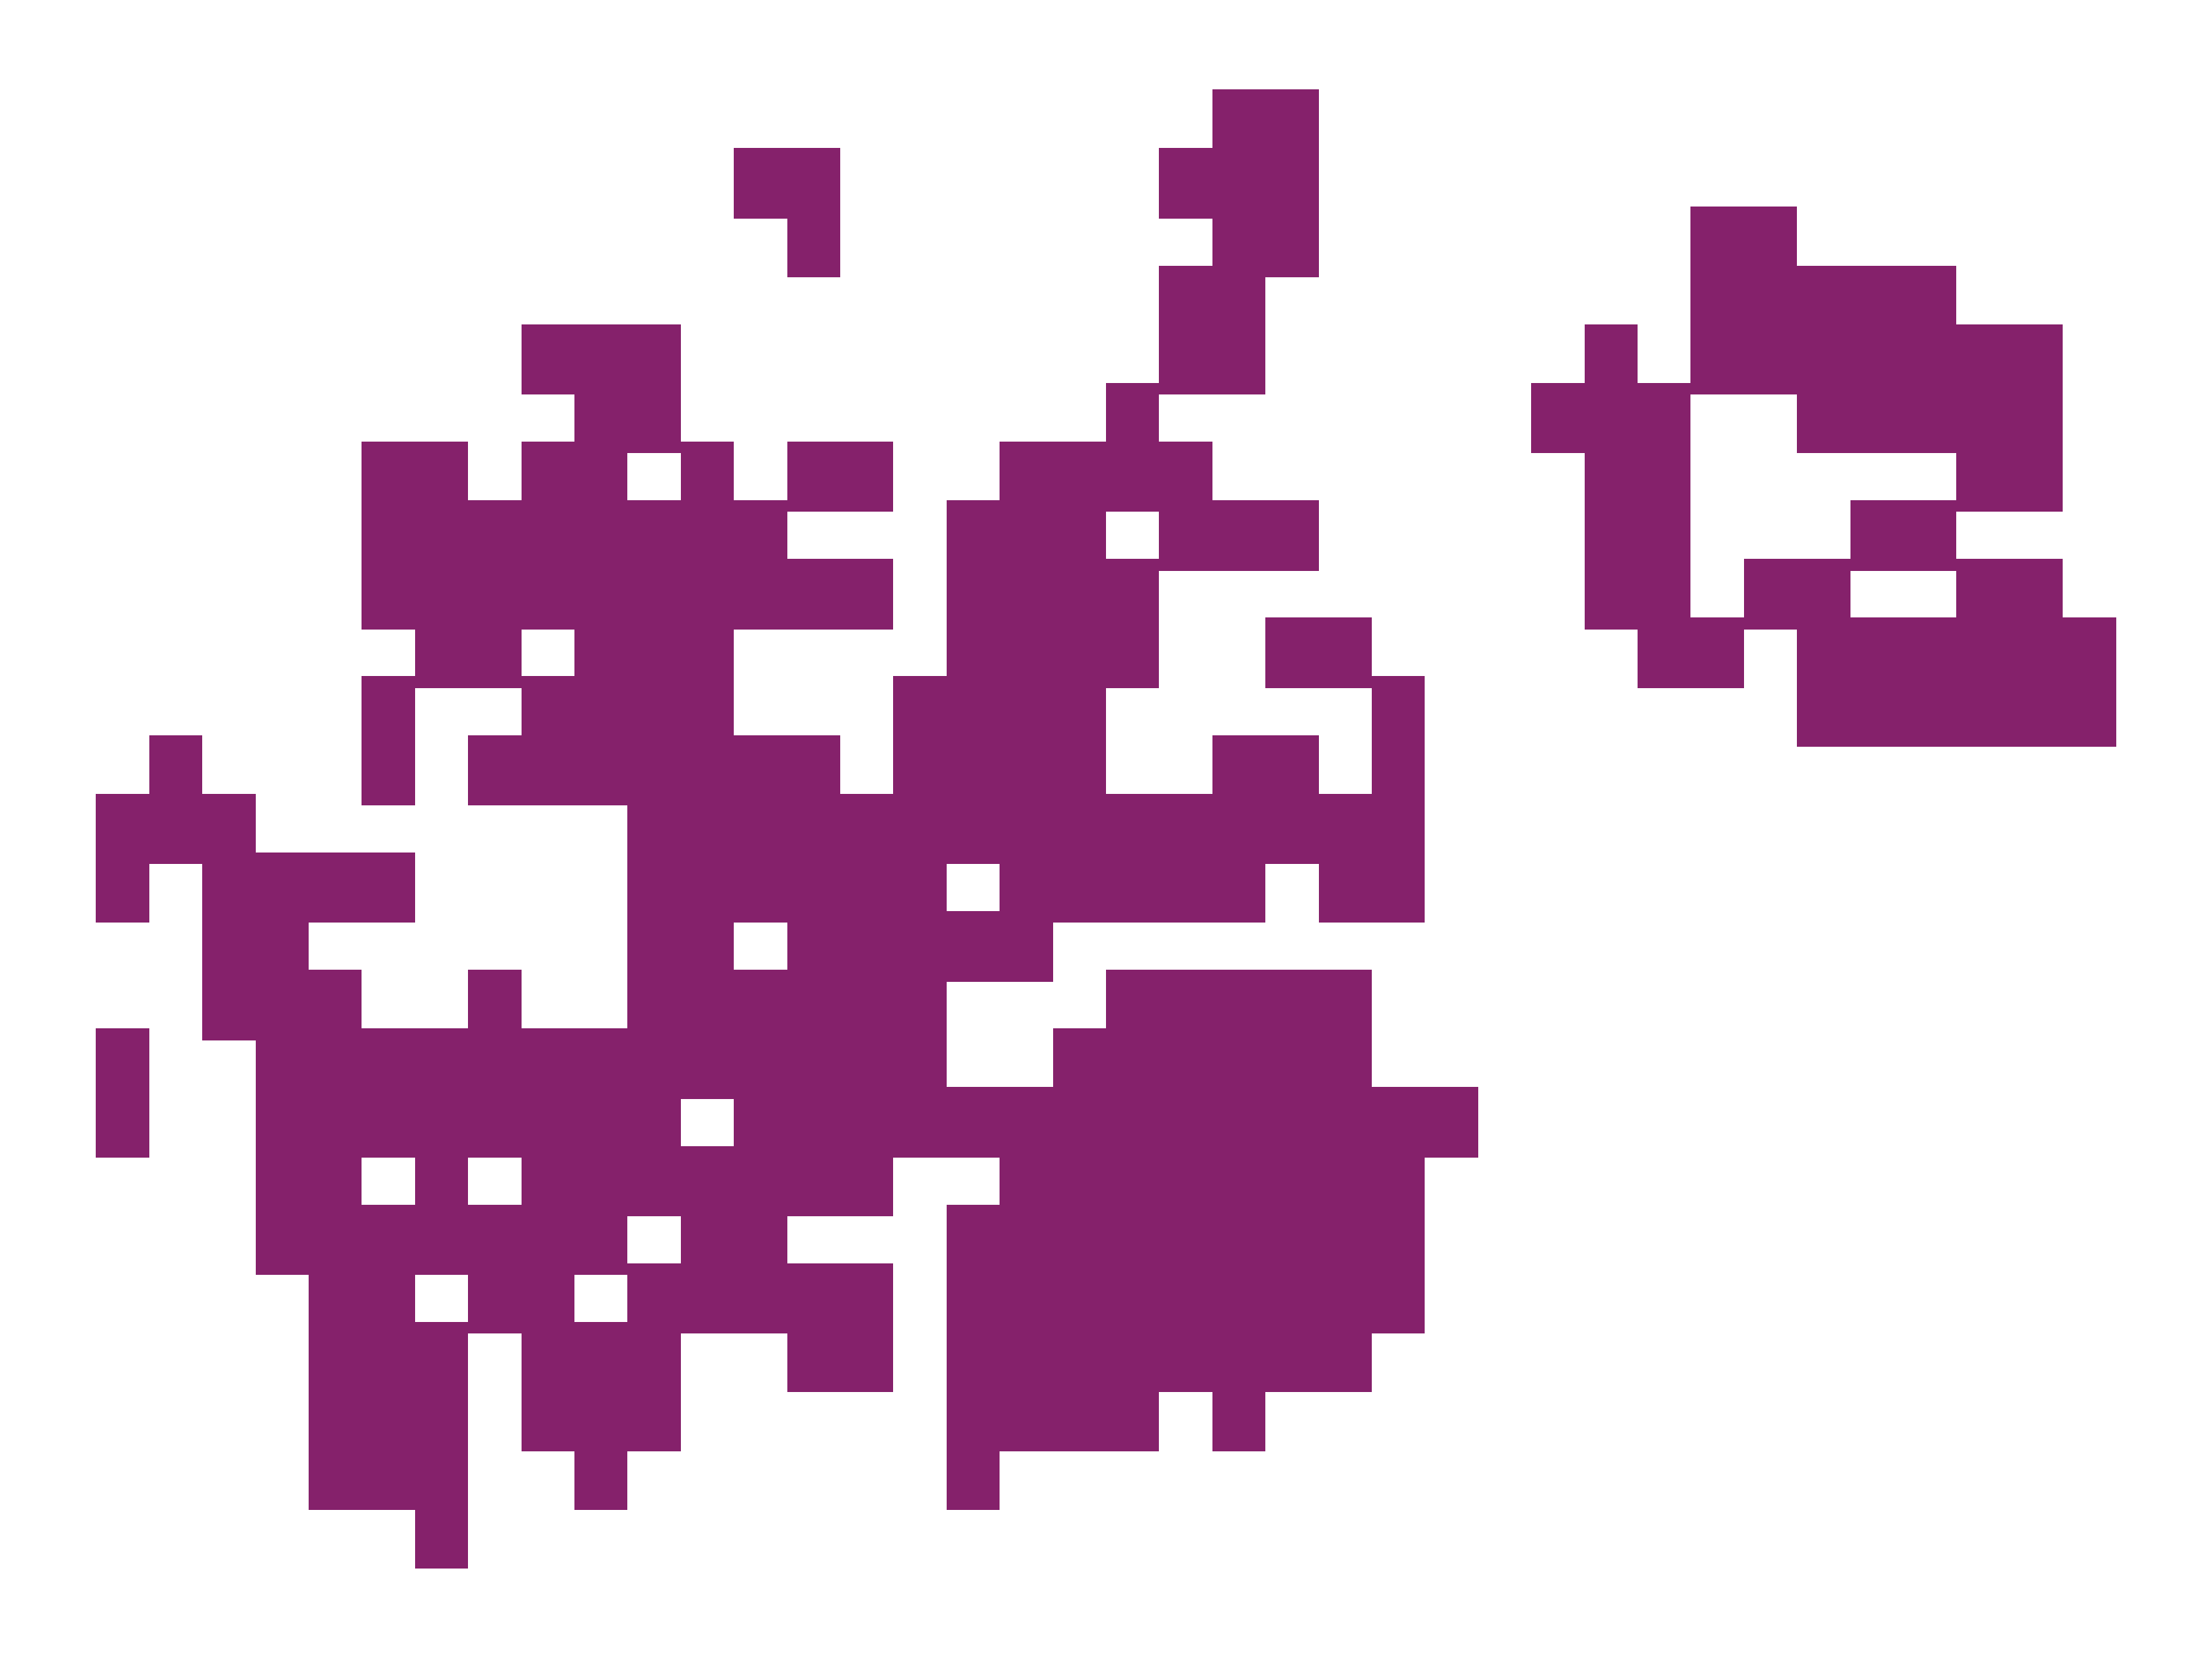

Caixas sobrepostas
Cross section for ts = 128


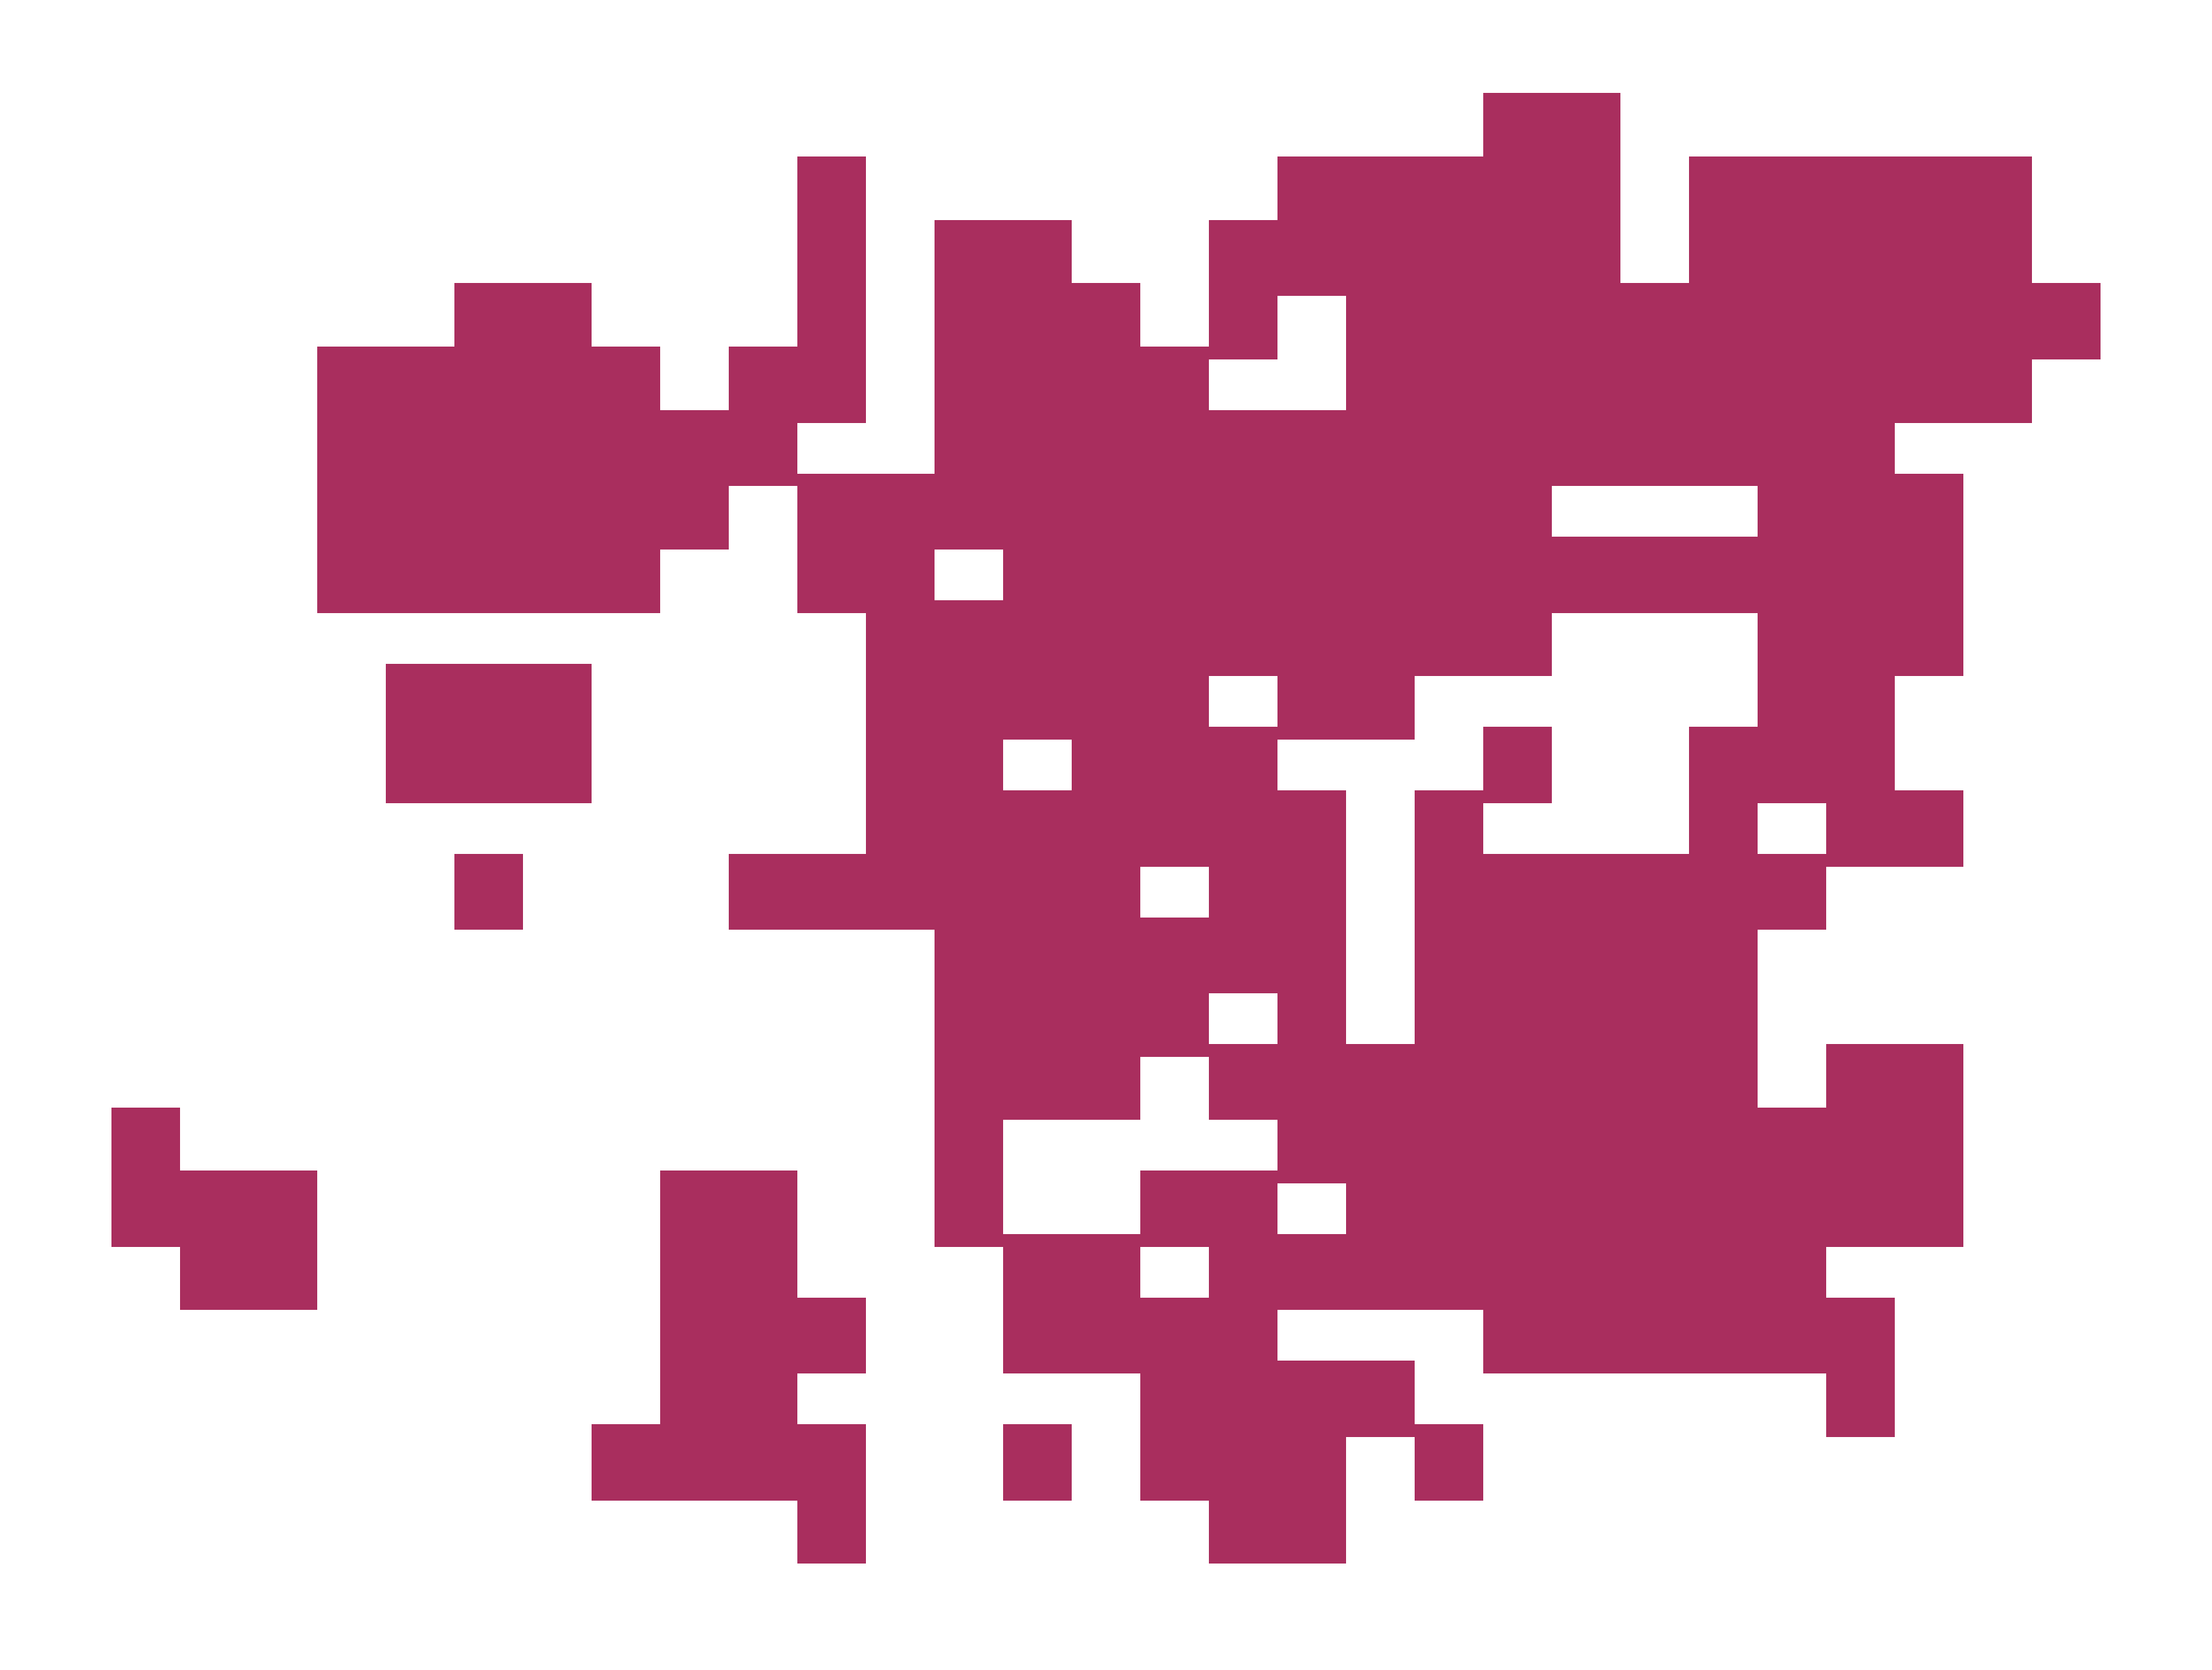

Caixas sobrepostas
Cross section for ts = 512


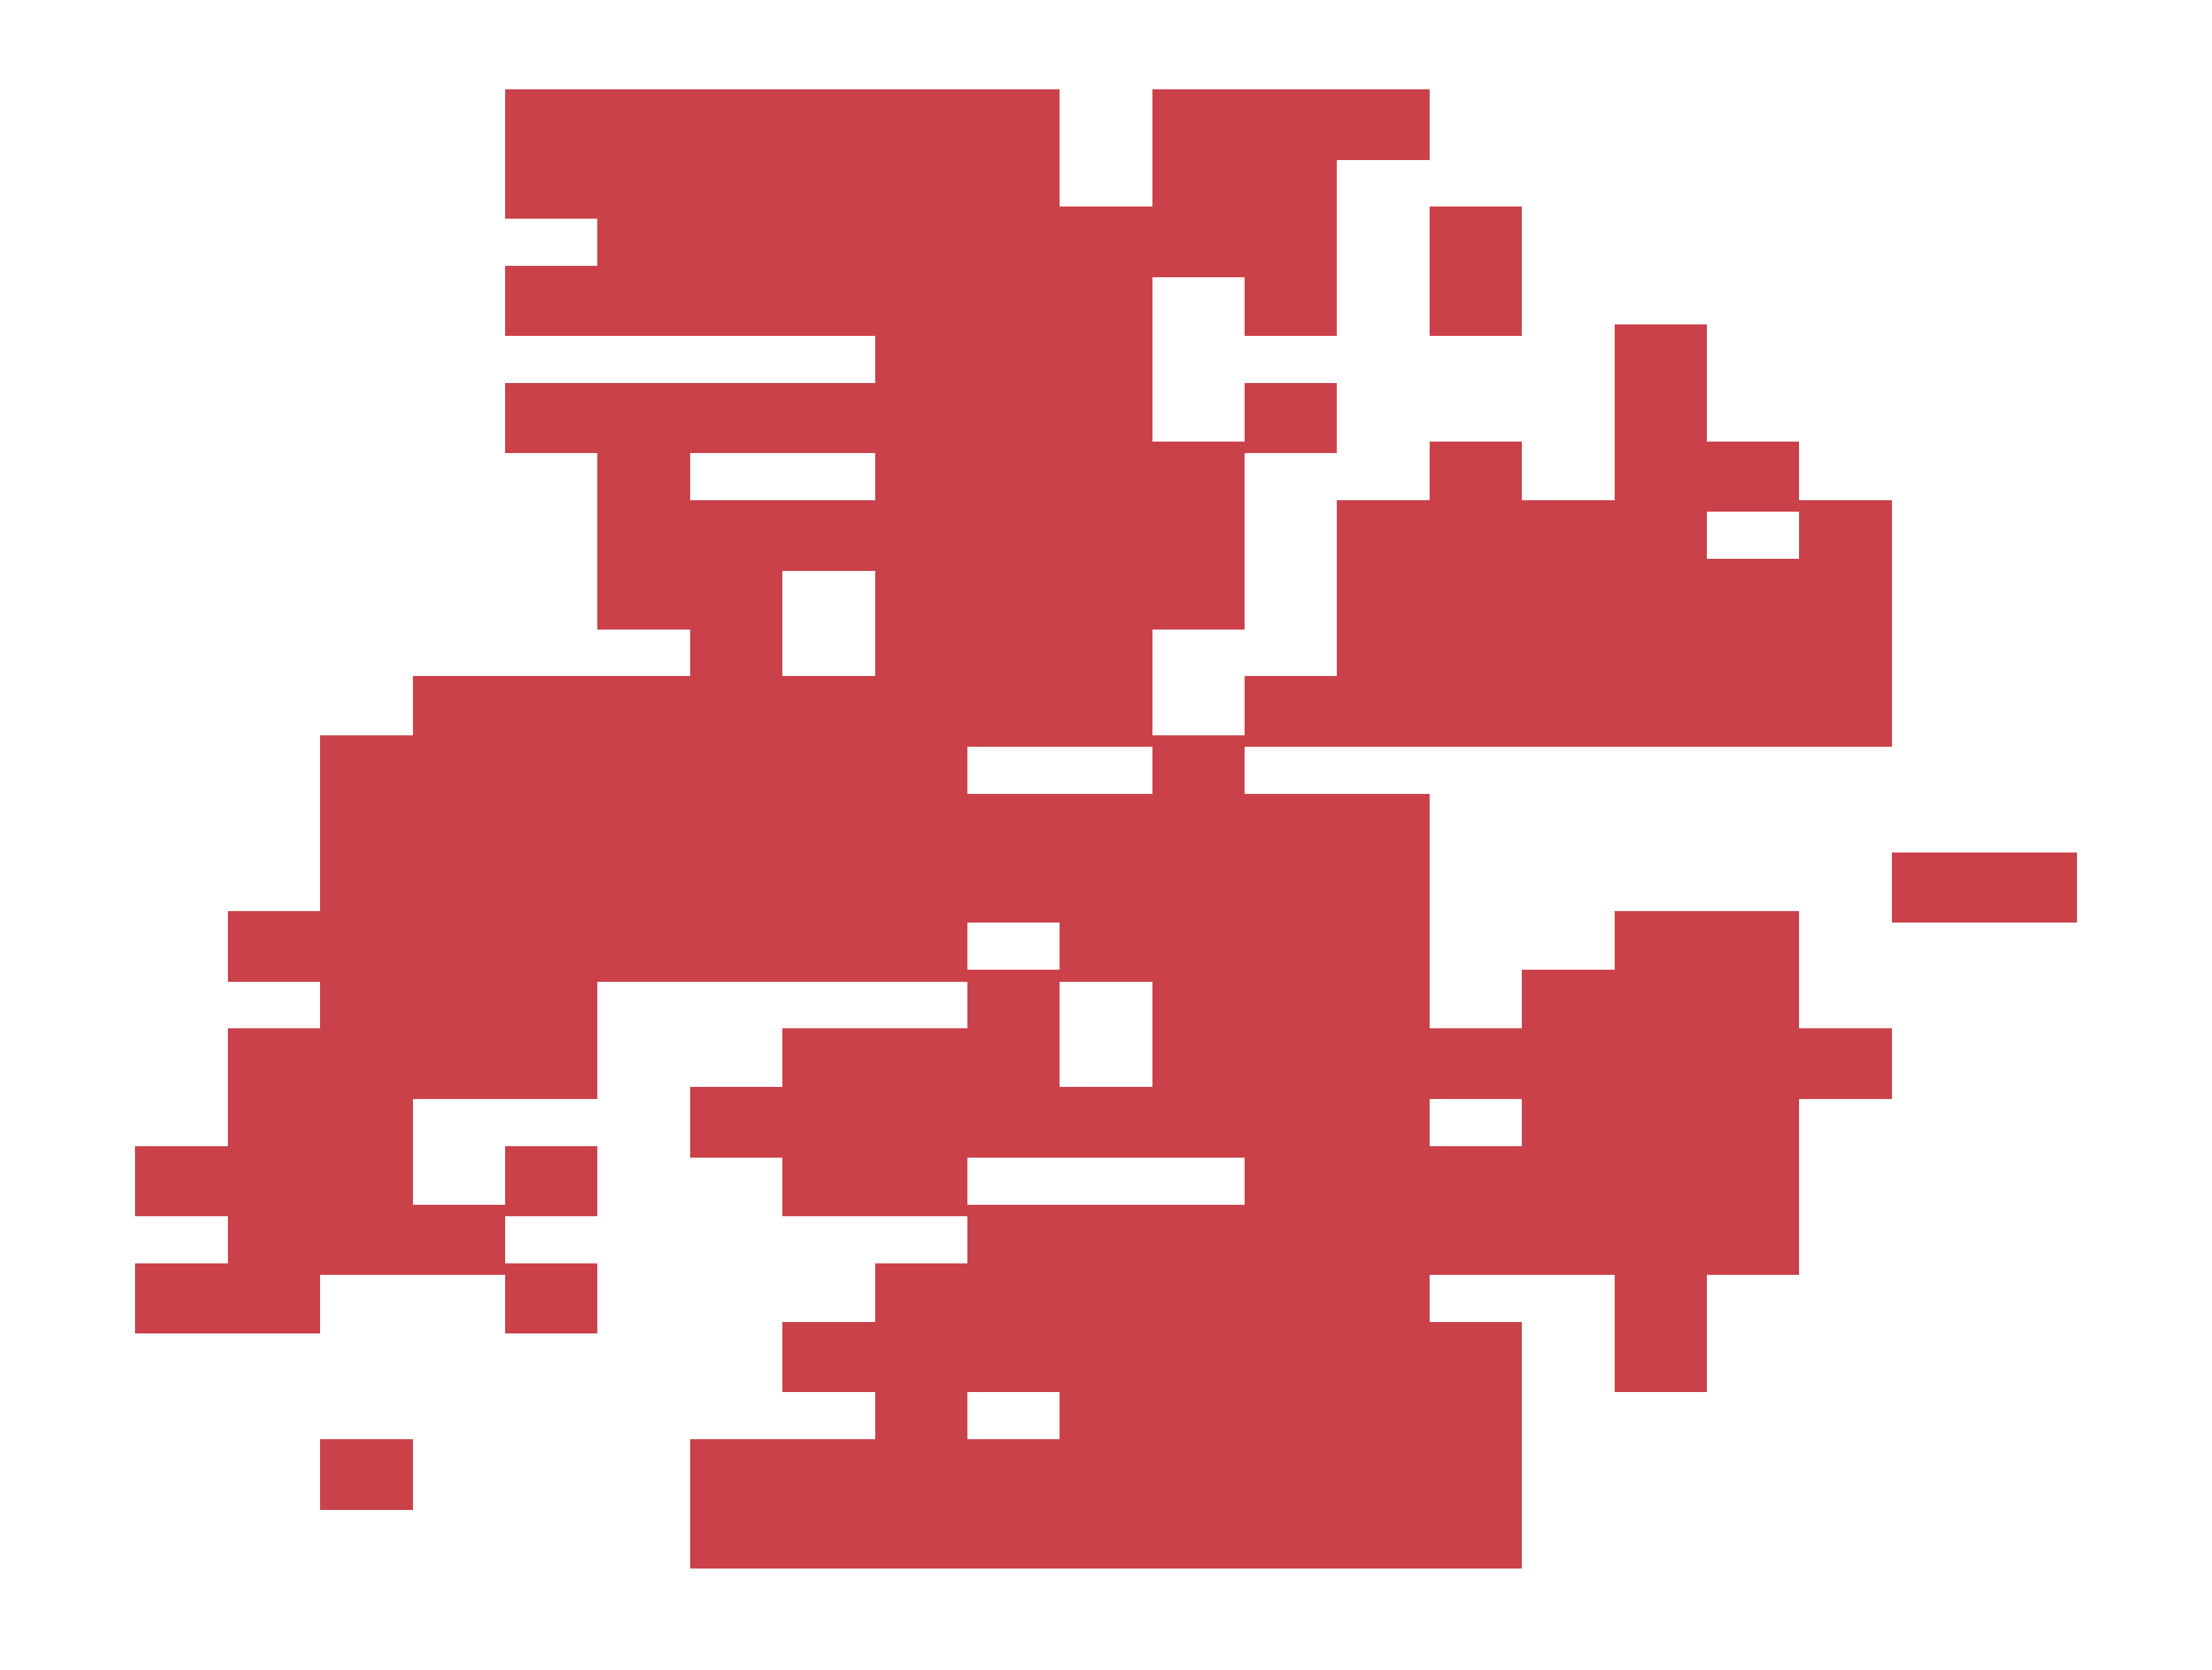

Caixas sobrepostas
Cross section for ts = 1024


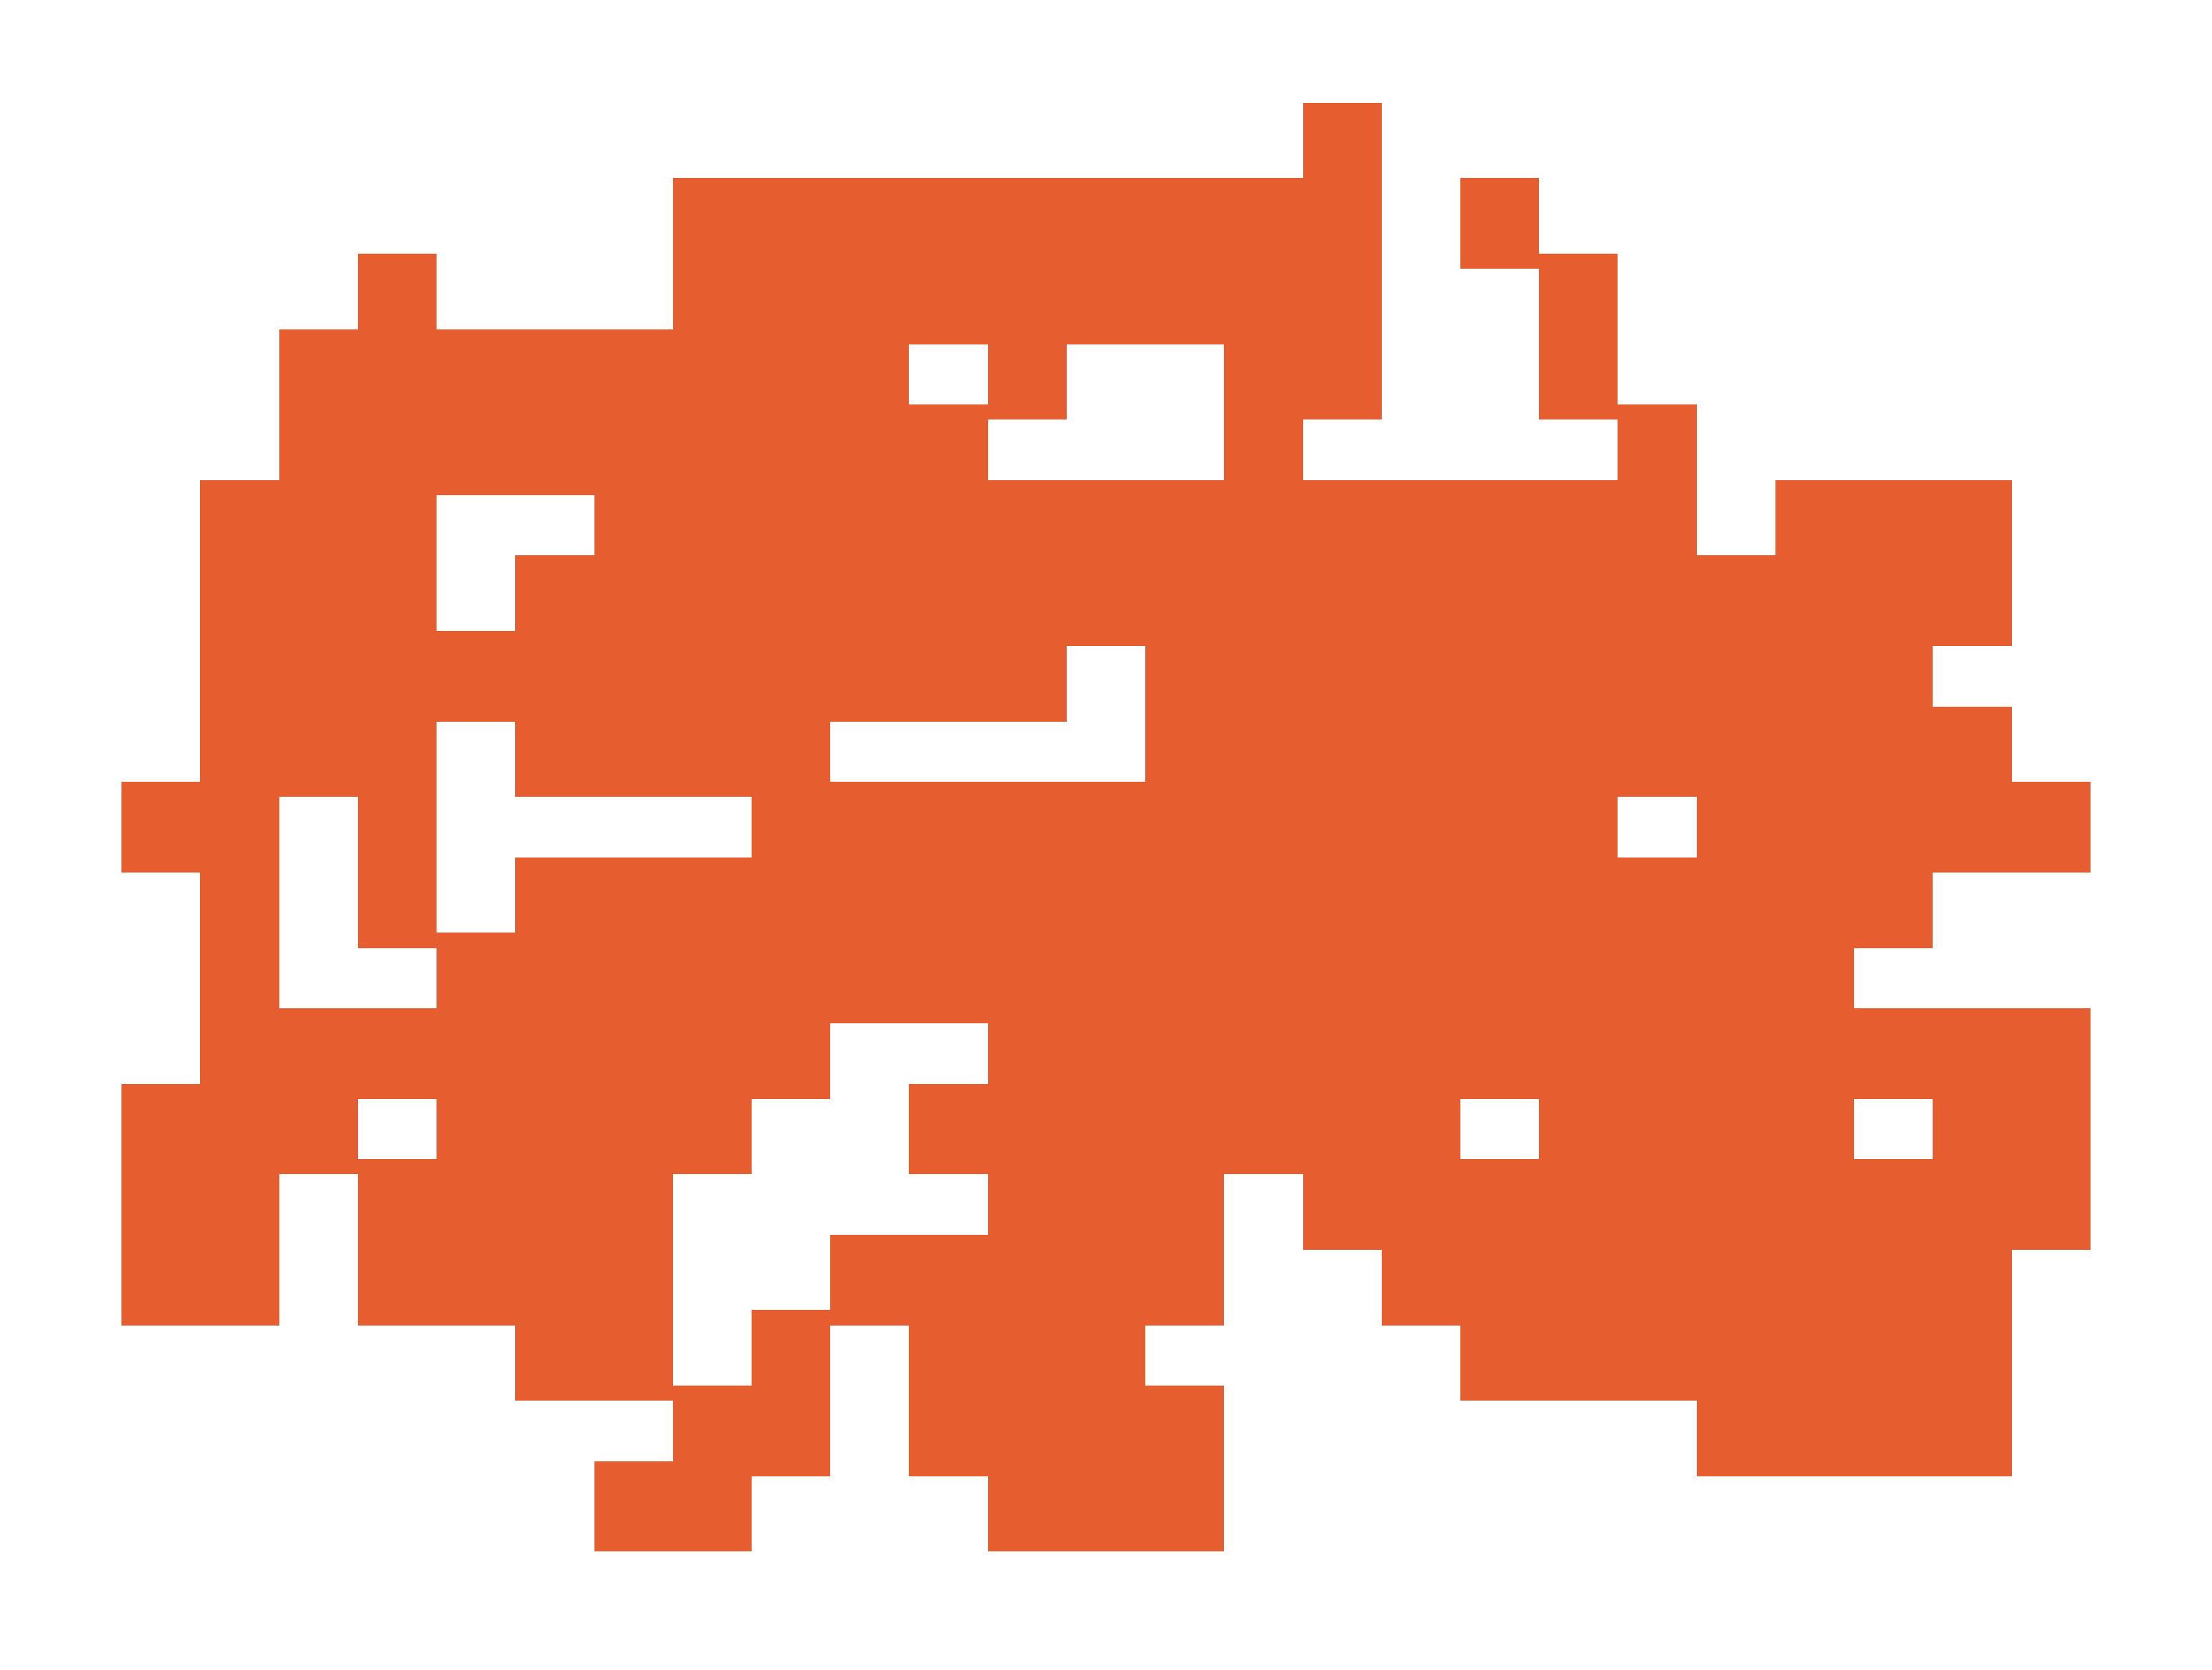

Caixas sobrepostas
Cross section for ts = 4096


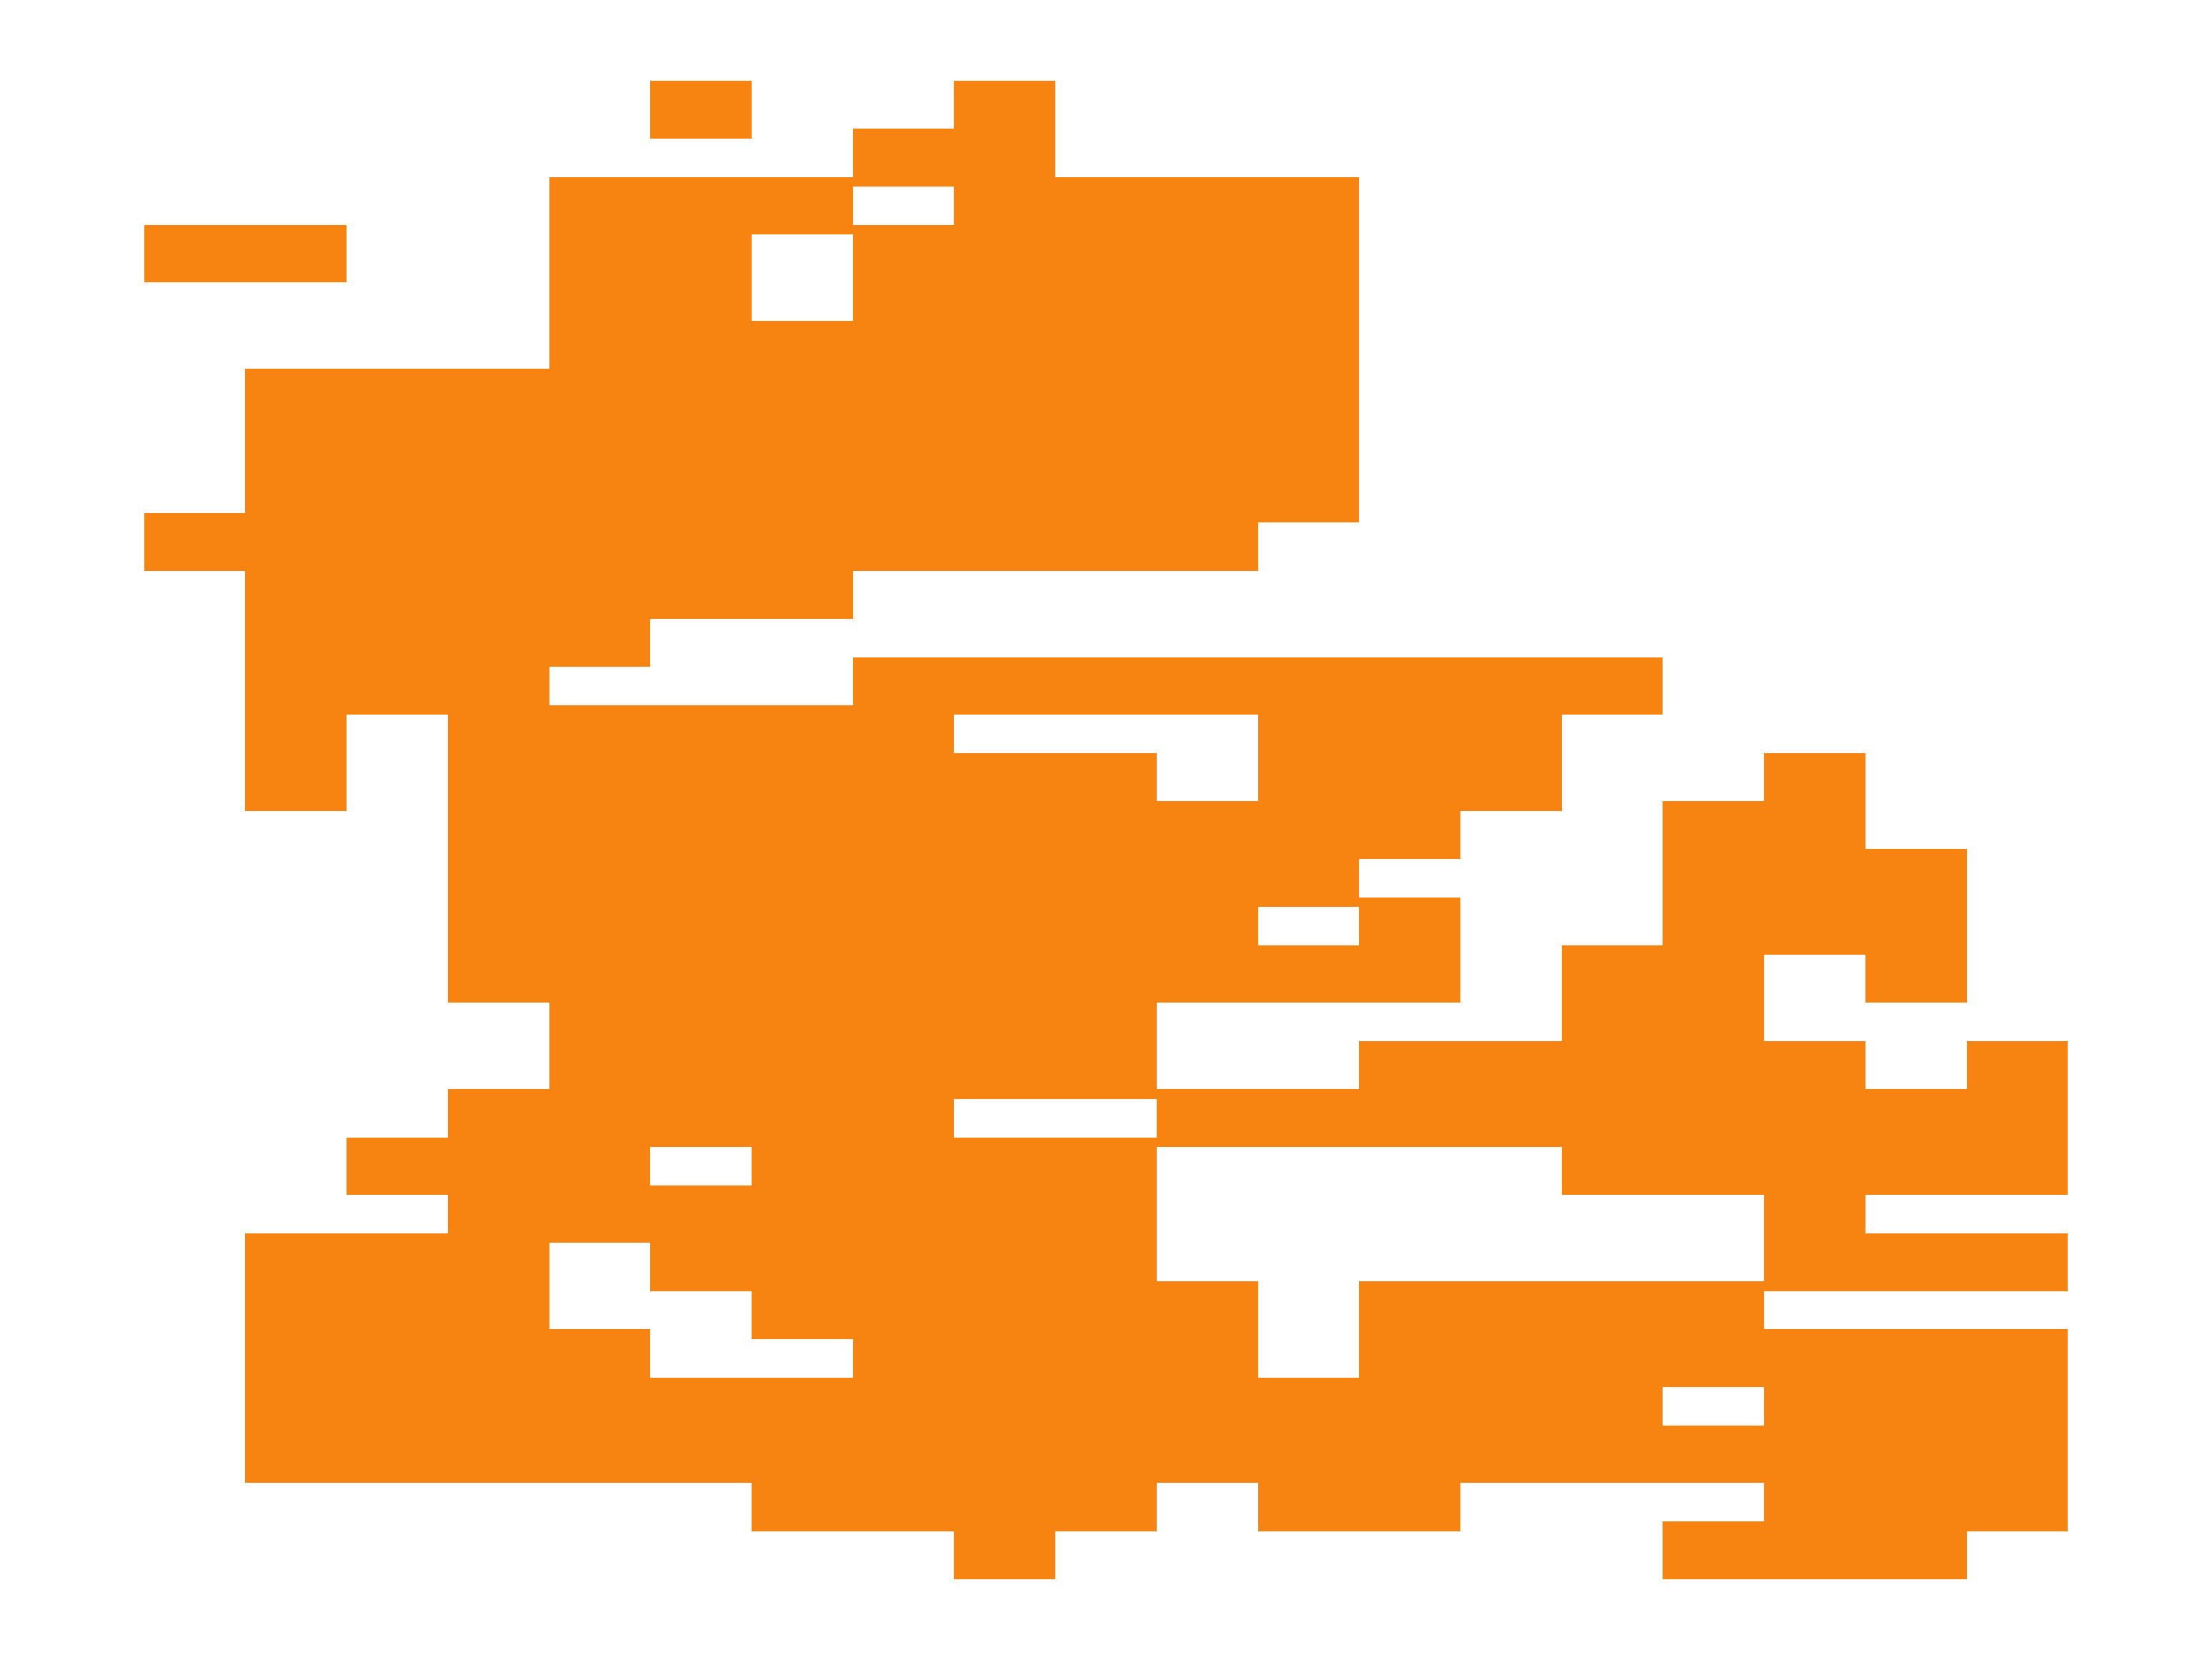

Caixas sobrepostas
Cross section for ts = 8192


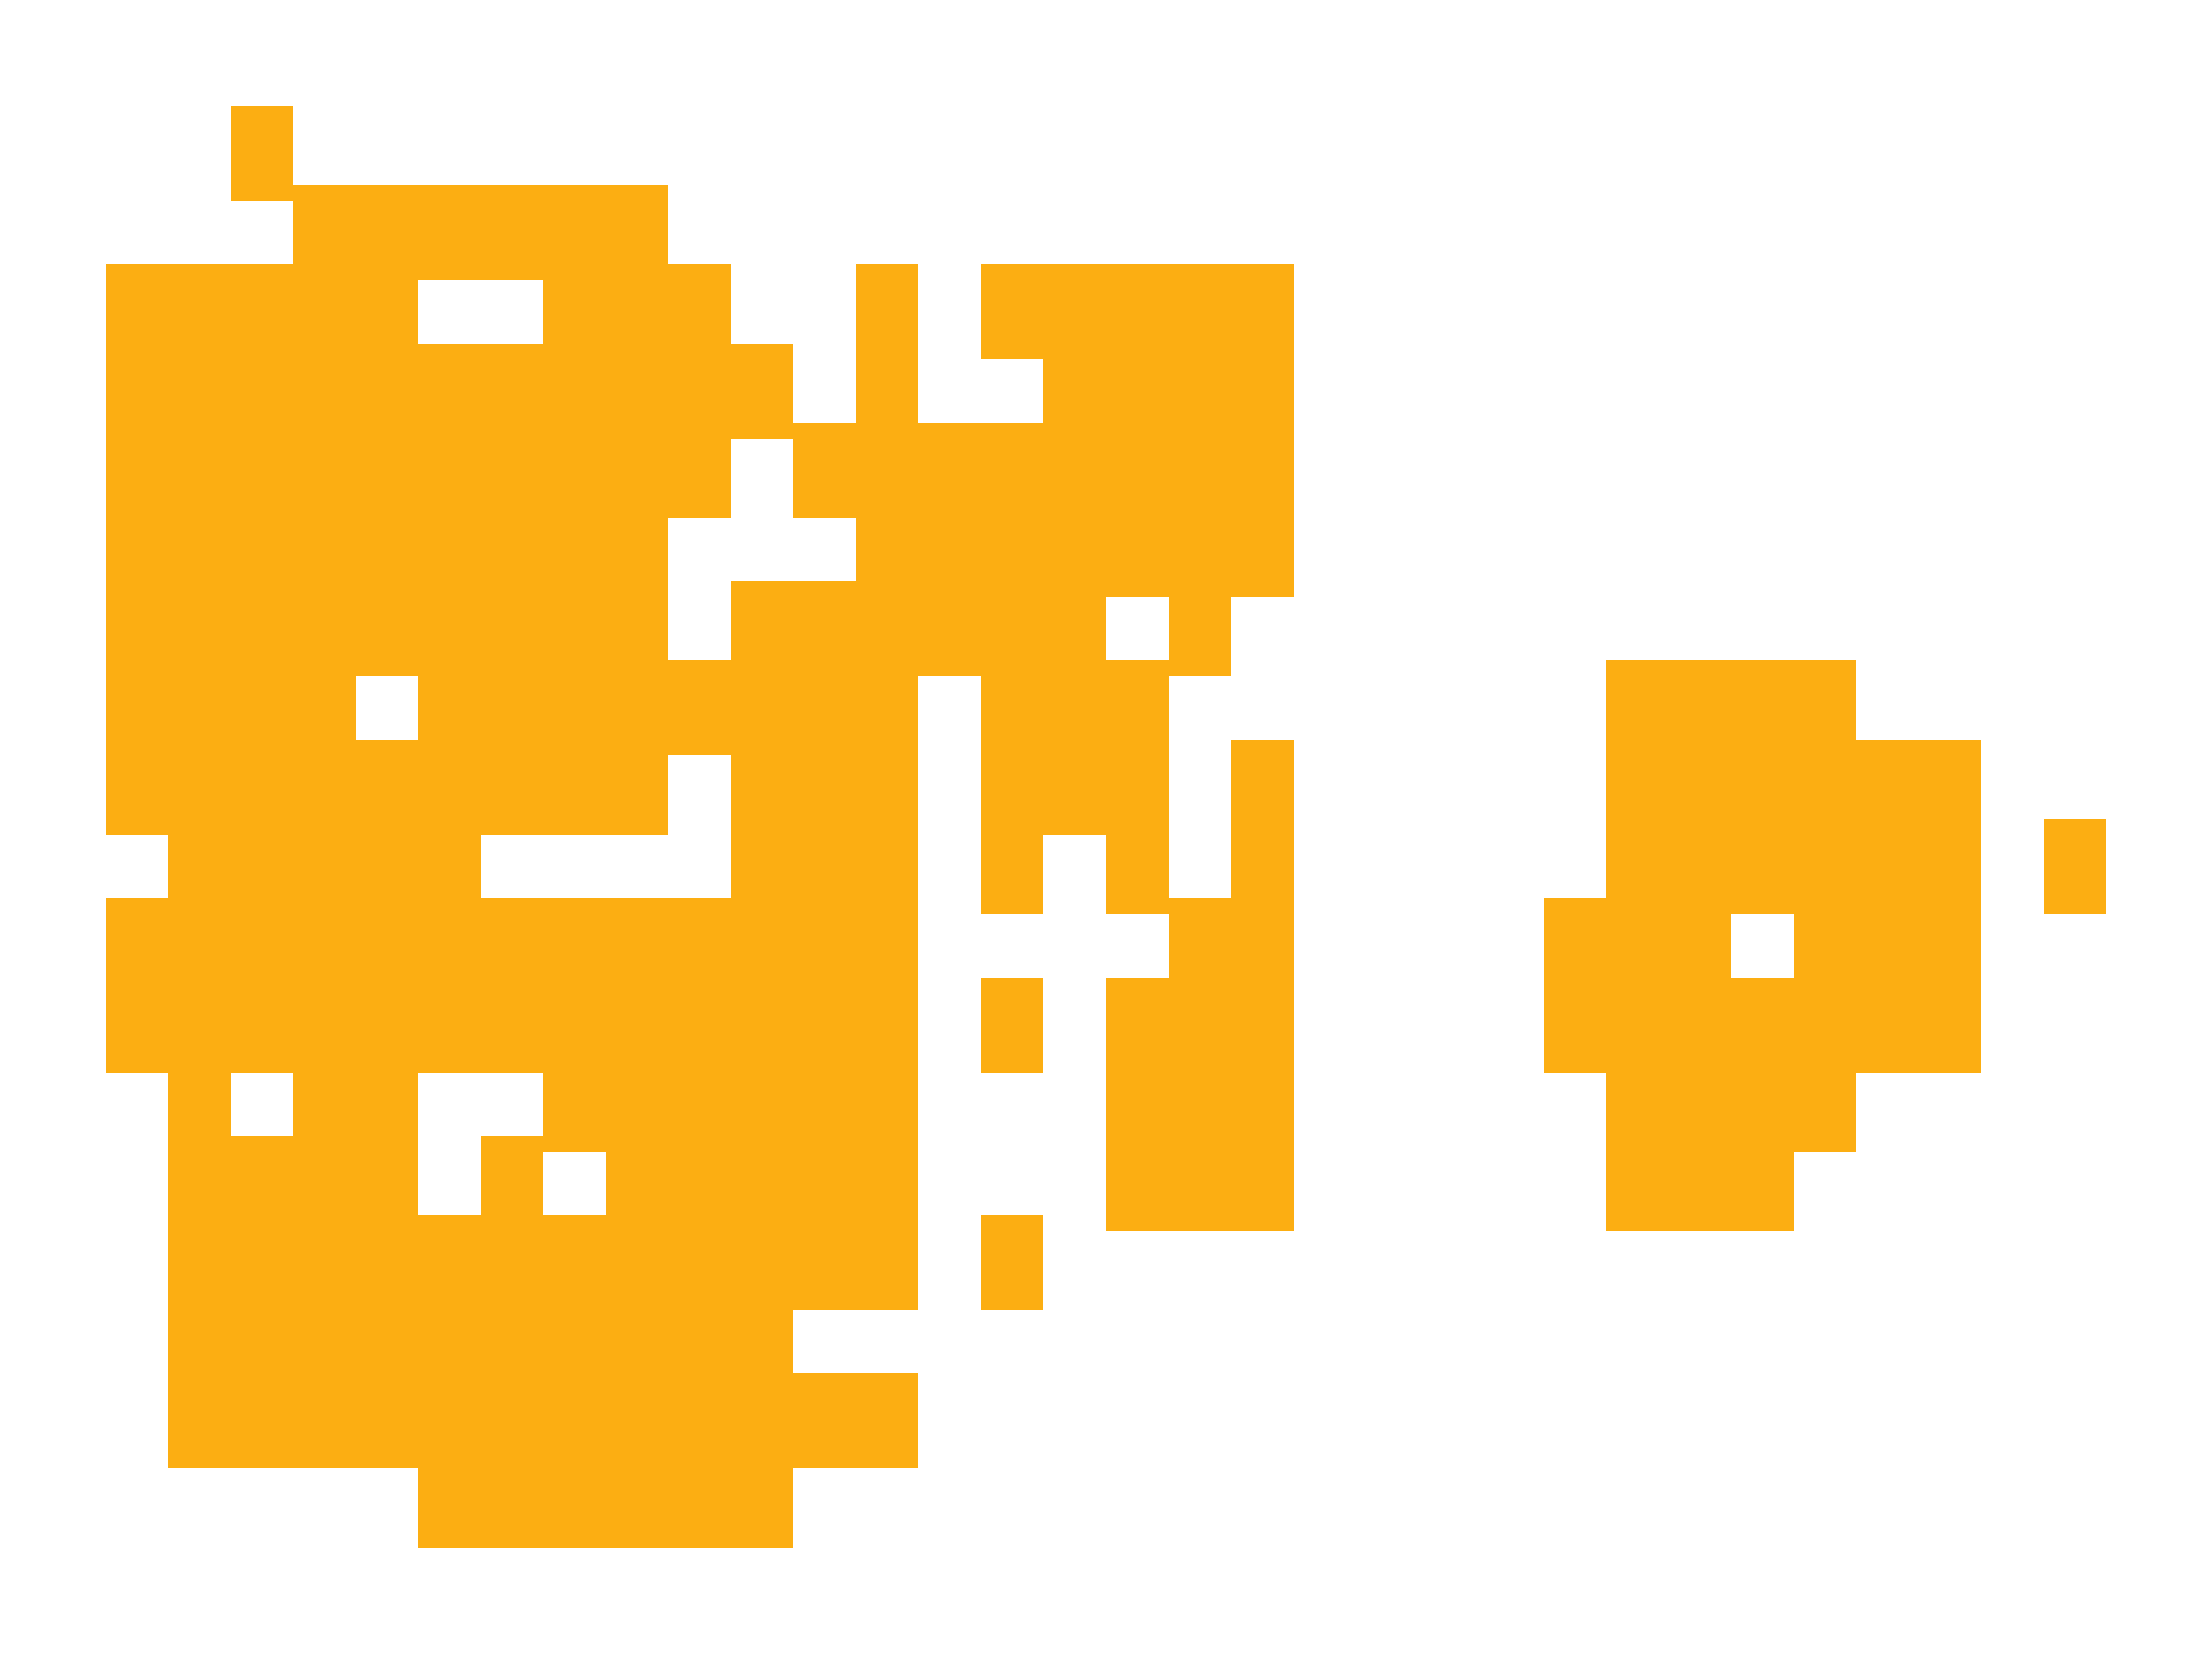

Caixas sobrepostas
Cross section for ts = 10000


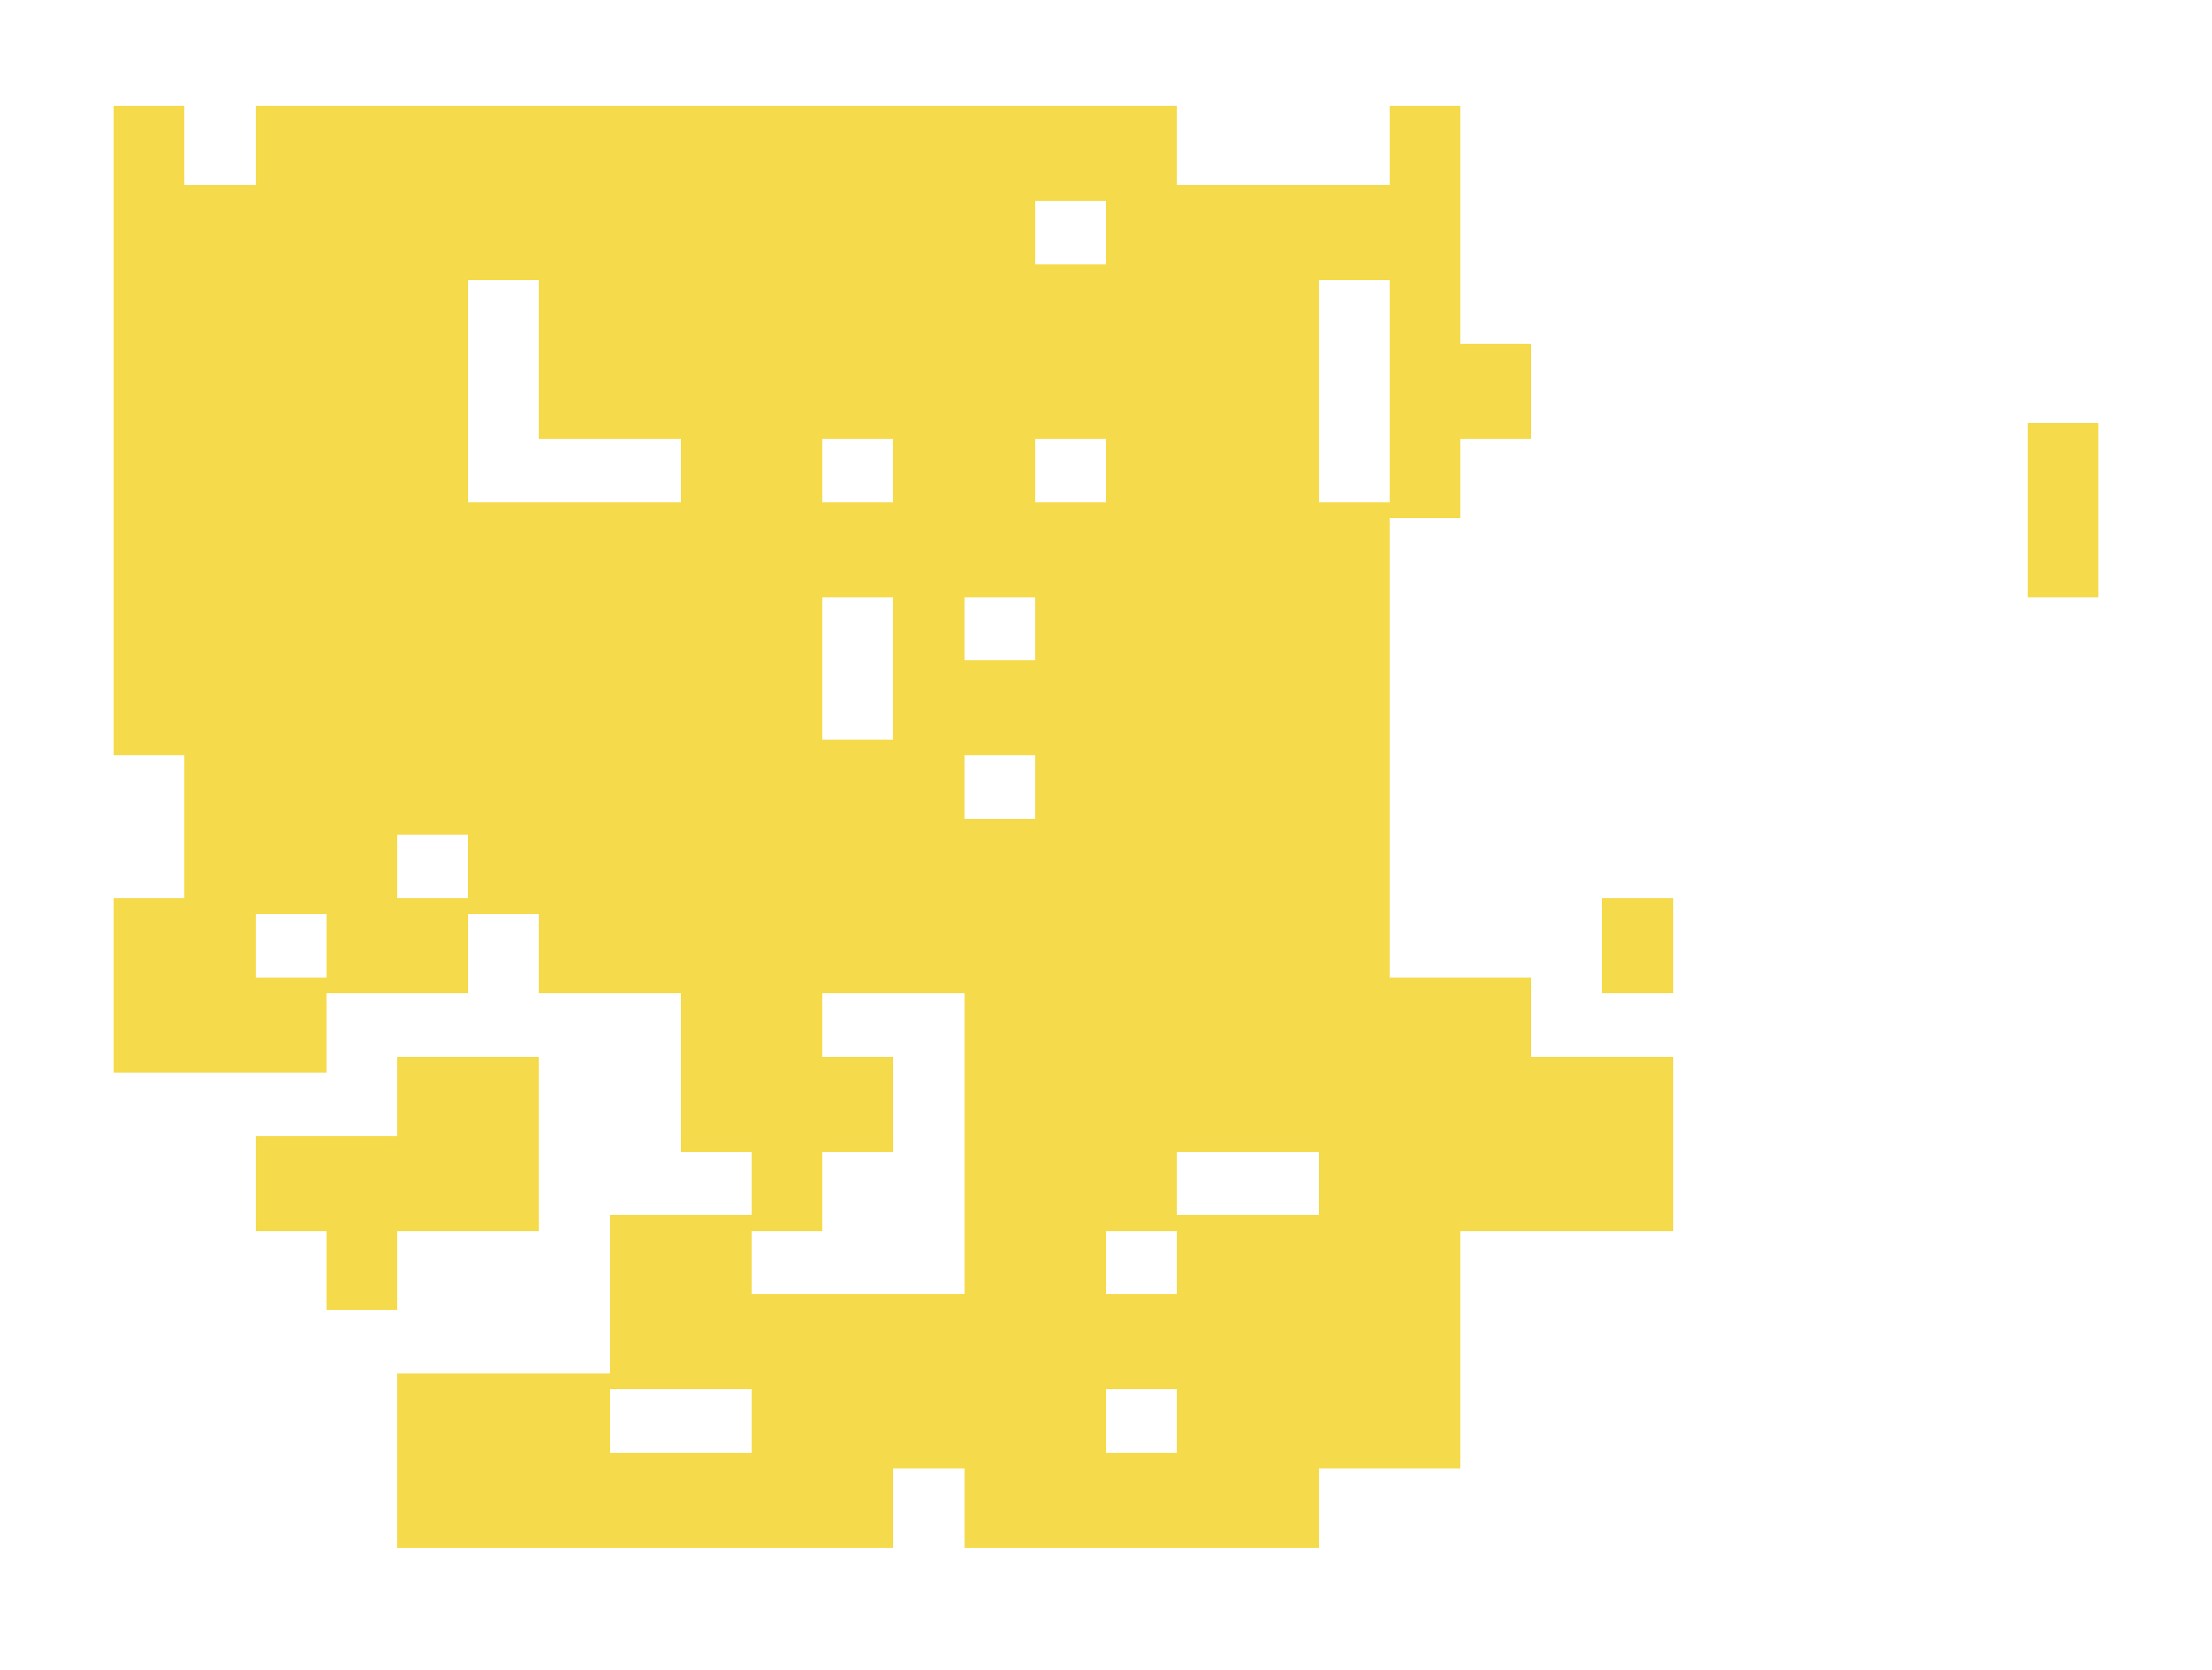

In [178]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
i=0
def caixas_sobrepostas(x, z):
        for i in range(len(x)):
            for j in range(i + 1, len(x)):
                caixa1 = Rectangle((x[i], z[i]), 1, 1)
                caixa2 = Rectangle((x[j], z[j]), 1, 1)

                if caixa1.get_path().intersects_path(caixa2.get_path()):
                    return True

        return False
for ts in sorted(DFCS.keys()):

    ys, counts = np.unique(DFCS[ts][0]['y'].tolist(), return_counts=True)
    ys = sorted(ys)
    x = DFCS[ts][0]['x'][DFCS[ts][0]['y'] == ys[0]].tolist()
    z = DFCS[ts][0]['z'][DFCS[ts][0]['y'] == ys[0]].tolist()
    # Criar a figura e o eixo com DPI de 600
    fig, ax = plt.subplots(dpi=600)
    
    sobrepostas = caixas_sobrepostas(x, z)

    # Adicionar título indicando se há sobreposição
    if sobrepostas:
        print('Caixas sobrepostas')
    else:
        print('Caixas não sobrepostas')
    # Plotar as caixas sólidas
    for xi, zi in zip(x, z):
        rect = Rectangle((xi, zi), 1, 1.2, linewidth=0, edgecolor='blue', facecolor=colors[i])
        ax.add_patch(rect)

    i+=1
    # Ajustar os limites do eixo
    ax.set_xlim(min(x) - 1, max(x) + 2)
    ax.set_ylim(min(z) - 1, max(z) + 2)

    # Remover os eixos
    ax.set_xticks([])
    ax.set_yticks([])

    # Remover borda da caixa do plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # Exibir o gráfico
    print(f'Cross section for ts = {ts}')
    plt.show()


    # Remover os eixos
    ax.set_xticks([])
    ax.set_yticks([])

    # Remover borda da caixa do plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Exibir o gráfico
    plt.show()
  




In [125]:
type(x)

list

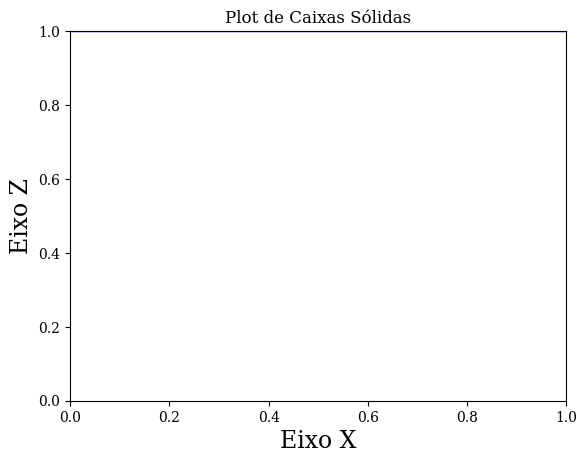

In [123]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Criar a figura e o eixo
fig, ax = plt.subplots()

# Plotar as caixas sólidas
for xi, zi in zip(x, z):
    rect = Rectangle((xi, zi), 1, 1, linewidth=1, edgecolor='blue', facecolor='blue')
    ax.add_patch(rect)

# Adicionar rótulos e título
plt.xlabel('Eixo X')
plt.ylabel('Eixo Z')
plt.title('Plot de Caixas Sólidas')

# Exibir o gráfico
plt.show()


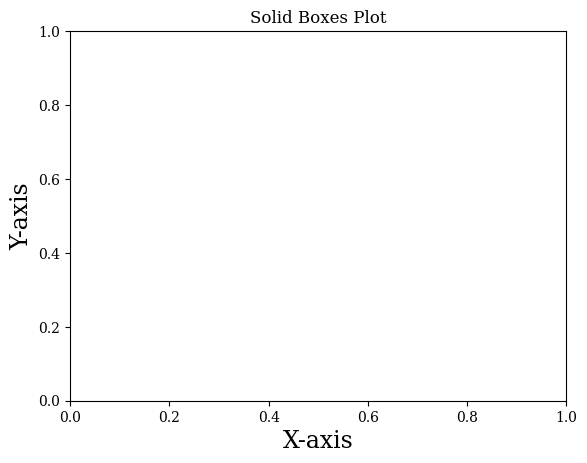

In [116]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


# Create a figure and axis
fig, ax = plt.subplots()

# Plotting the solid rectangles
for xi, yi in zip(x, y):
    rect = Rectangle((xi, yi), 1, 1, linewidth=1, edgecolor='blue', facecolor='blue')
    ax.add_patch(rect)


# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Solid Boxes Plot')

# Display the plot
plt.show()


In [160]:
import matplotlib.pyplot as plt
import numpy as np

# Set the colormap
cmap = plt.get_cmap('inferno')

# Create a custom color cycle with the last color being darker
colors = cmap(np.linspace(0, 1, 11))
last_color = [1.0, 0.6, 0.2]  # Choose a specific RGB color for the last color (variation of orange)
colors = np.vstack([colors, last_color])  # Add the variation of orange as the last color
# Set the custom color cycle in the rcParams
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

# Now you can use plt.plot or other plotting functions
# For example:
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y, c = colors[-1])
plt.show()


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 4 and the array at index 1 has size 3

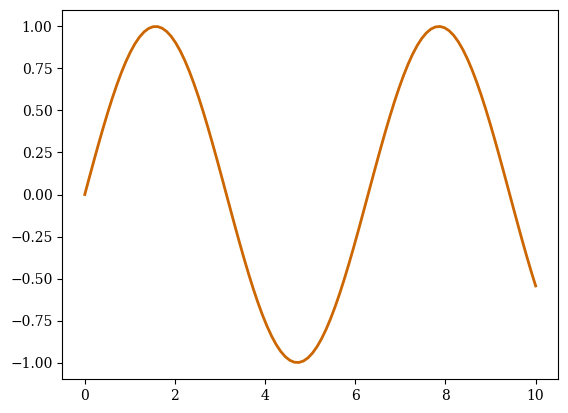

In [177]:
import matplotlib.pyplot as plt
import numpy as np

# Set the colormap
cmap = plt.get_cmap('inferno')

# Create a custom color cycle with the last color being a variation of orange
colors = cmap(np.linspace(0, 1, 12))  # Use 10 colors from the colormap
last_color = [0.8, 0.4, 0.0, 1.0] # Choose a specific RGBA color for the last color (variation of orange)
colors = np.vstack([colors, last_color])  # Add the variation of orange as the last color

# Set the custom color cycle in the rcParams
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

# Now you can use plt.plot or other plotting functions
# For example:
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y, c =colors[-1])
plt.show()
